In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
from diffusers import UNet3DConditionModel
from diffusion import DiffusionModel3D

# Create a 3D model
model = UNet3DConditionModel(
    sample_size=32,  # the target resolution (assuming 32x32x32 voxels)
    in_channels=1,  # number of input channels, 1 for voxel data
    out_channels=1,  # number of output channels
    layers_per_block=2,  # how many ResNet layers to use per UNet block
    block_out_channels=(64, 128, 256, 512),  # channel numbers for each block
    down_block_types=(
        "CrossAttnDownBlock3D",  # a downsampling block with cross-attention
        "CrossAttnDownBlock3D",
        "CrossAttnDownBlock3D",
        "DownBlock3D",  # a regular downsampling block without attention
    ),
    up_block_types=(
        "UpBlock3D",  # a regular upsampling block without attention
        "CrossAttnUpBlock3D",  # an upsampling block with cross-attention
        "CrossAttnUpBlock3D",
        "CrossAttnUpBlock3D",
    ),
    cross_attention_dim=512,  # dimension of the cross attention features
)
model.to(device)

diffusion_model = DiffusionModel3D(model, num_timesteps=1000)
diffusion_model.to(device)

# Print model summary
print(diffusion_model)
print(f"Total parameters: {sum(p.numel() for p in diffusion_model.parameters())}")

DiffusionModel3D(
  (model): UNet3DConditionModel(
    (conv_in): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (time_proj): Timesteps()
    (time_embedding): TimestepEmbedding(
      (linear_1): Linear(in_features=64, out_features=256, bias=True)
      (act): SiLU()
      (linear_2): Linear(in_features=256, out_features=256, bias=True)
    )
    (transformer_in): TransformerTemporalModel(
      (norm): GroupNorm(32, 64, eps=1e-06, affine=True)
      (proj_in): Linear(in_features=64, out_features=512, bias=True)
      (transformer_blocks): ModuleList(
        (0): BasicTransformerBlock(
          (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (attn1): Attention(
            (to_q): Linear(in_features=512, out_features=512, bias=False)
            (to_k): Linear(in_features=512, out_features=512, bias=False)
            (to_v): Linear(in_features=512, out_features=512, bias=False)
            (to_out): ModuleList(
              (0): Linea

/scratch/students/2024-fall-sp-pabdel/3D-BlockGen/diffusion.py:12: FutureWarning: Accessing config attribute `cross_attention_dim` directly via 'UNet3DConditionModel' object attribute is deprecated. Please access 'cross_attention_dim' over 'UNet3DConditionModel's config object instead, e.g. 'unet.config.cross_attention_dim'.
  self.dummy_encoder = nn.Parameter(torch.randn(1, 1, model.cross_attention_dim))


In [4]:
# Import your data loader (assumed to be defined in a separate file)
from data_loader import create_dataloader

# Create training and testing dataloaders
batch_size = 3  # Adjust as necessary for memory
data_dir = "./objaverse_processed/processed_models"  # Replace with actual data directory
train_dataloader, test_dataloader = create_dataloader(data_dir, batch_size=batch_size)

print(f"Train dataset size: {len(train_dataloader.dataset)}")
print(f"Test dataset size: {len(test_dataloader.dataset)}")

Loading data from ./objaverse_processed/processed_models...
Found 1000 files in ./objaverse_processed/processed_models
Train dataset size: 900
Test dataset size: 100


In [ ]:
from training import train_diffusion_model

losses, test_losses = train_diffusion_model(diffusion_model, train_dataloader, test_dataloader, epochs=30, device=device)

Epoch 1/30 - Training:   6%|█████▉                                                                                                   | 17/300 [00:21<05:36,  1.19s/it]

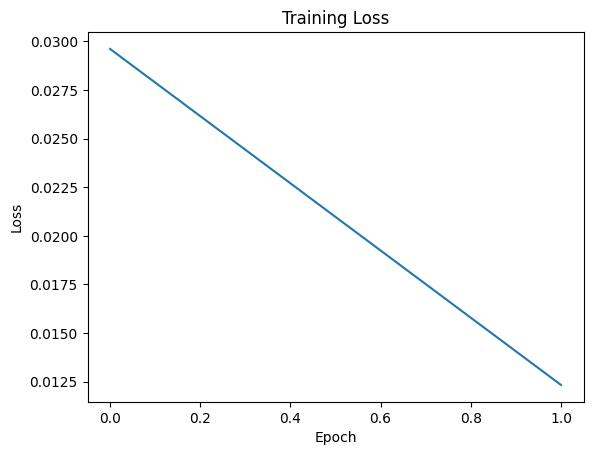

In [10]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


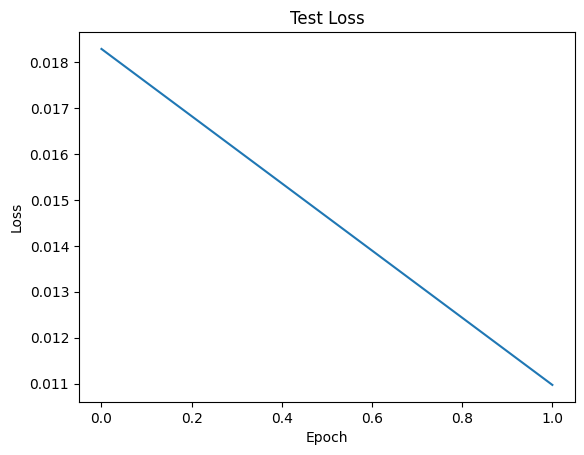

In [11]:
# Plot the test loss
plt.plot(test_losses)
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Sampling Steps:   0%|                                                                                                                         | 0/200 [00:00<?, ?it/s]

timestep:999
(2, 1, 32, 32, 32)


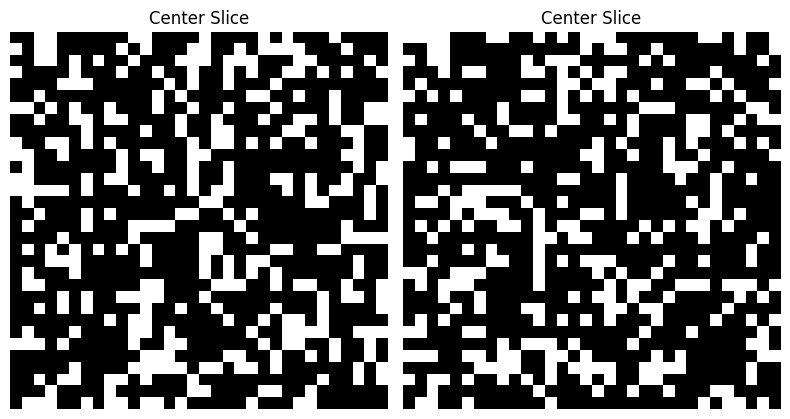

(2, 1, 32, 32, 32)


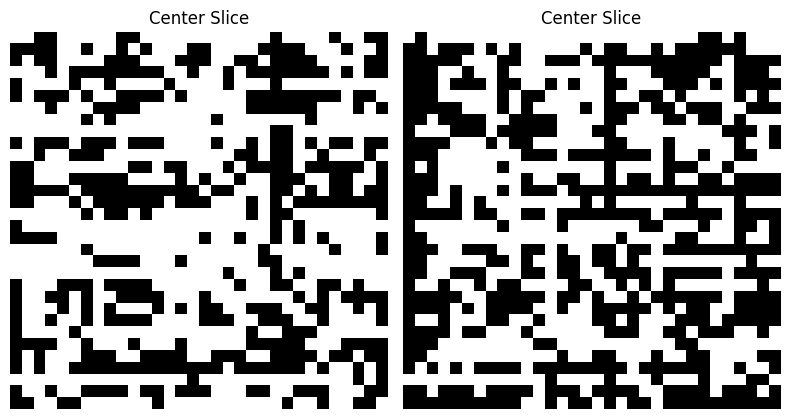

Sampling Steps:   0%|▌                                                                                                                | 1/200 [00:01<03:26,  1.04s/it]

timestep:994
(2, 1, 32, 32, 32)


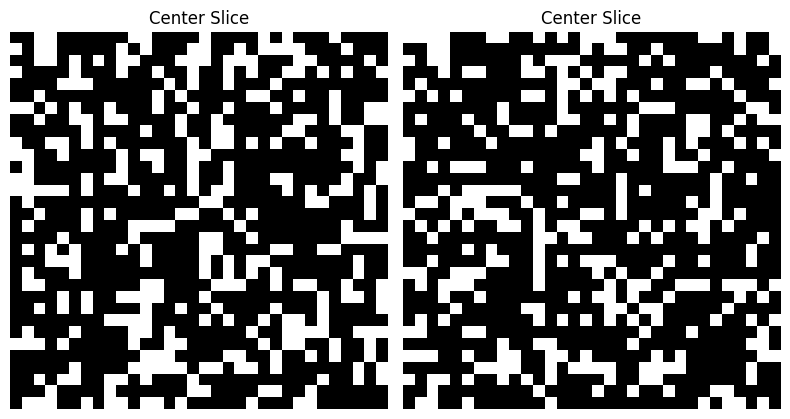

(2, 1, 32, 32, 32)


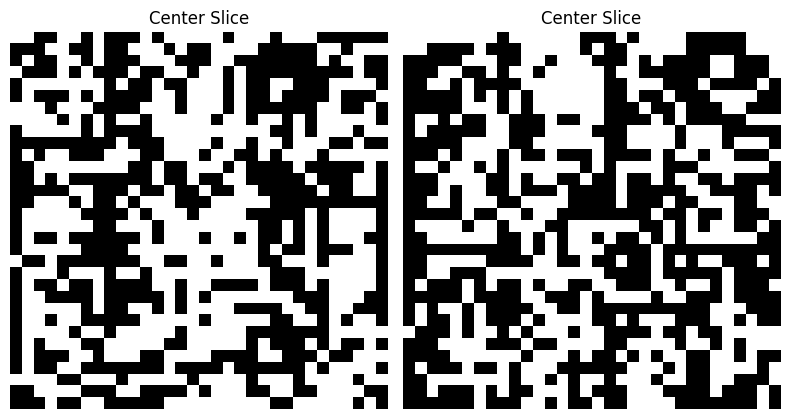

Sampling Steps:   1%|█▏                                                                                                               | 2/200 [00:01<02:33,  1.29it/s]

timestep:989
(2, 1, 32, 32, 32)


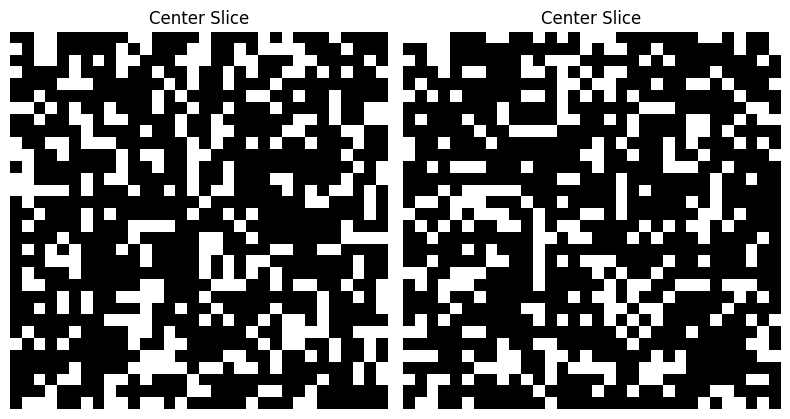

(2, 1, 32, 32, 32)


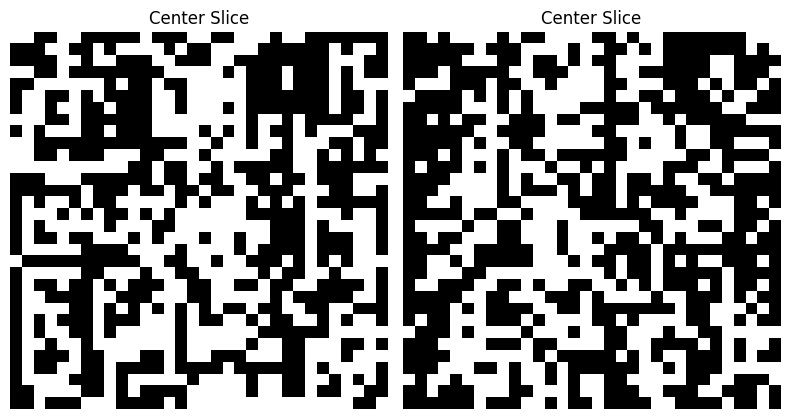

Sampling Steps:   2%|█▋                                                                                                               | 3/200 [00:02<02:15,  1.45it/s]

timestep:984
(2, 1, 32, 32, 32)


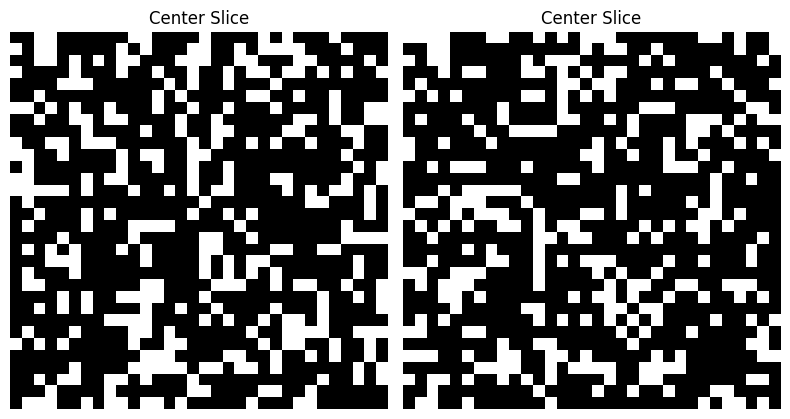

(2, 1, 32, 32, 32)


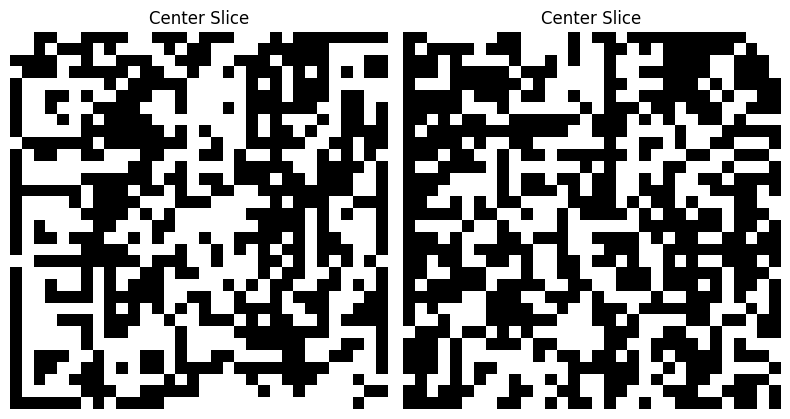

Sampling Steps:   2%|██▎                                                                                                              | 4/200 [00:02<02:06,  1.55it/s]

timestep:979
(2, 1, 32, 32, 32)


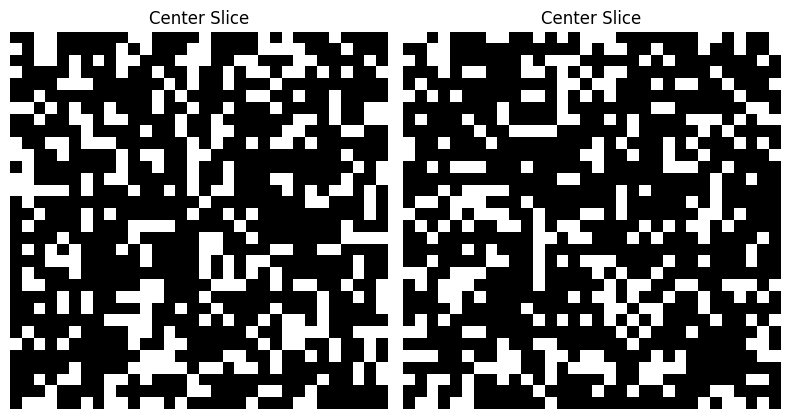

(2, 1, 32, 32, 32)


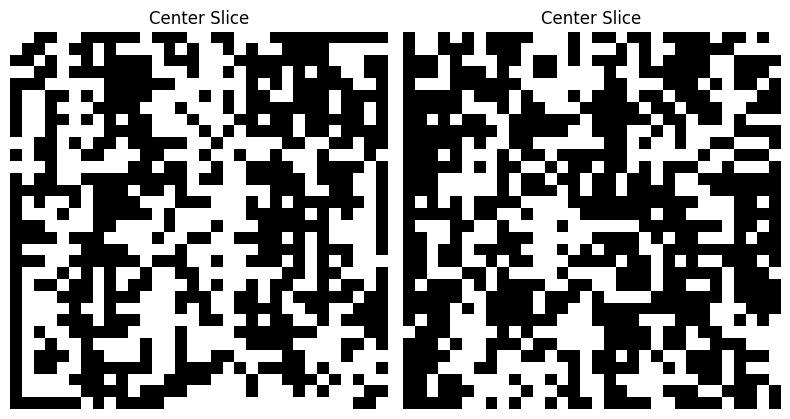

Sampling Steps:   2%|██▊                                                                                                              | 5/200 [00:03<02:02,  1.60it/s]

timestep:974
(2, 1, 32, 32, 32)


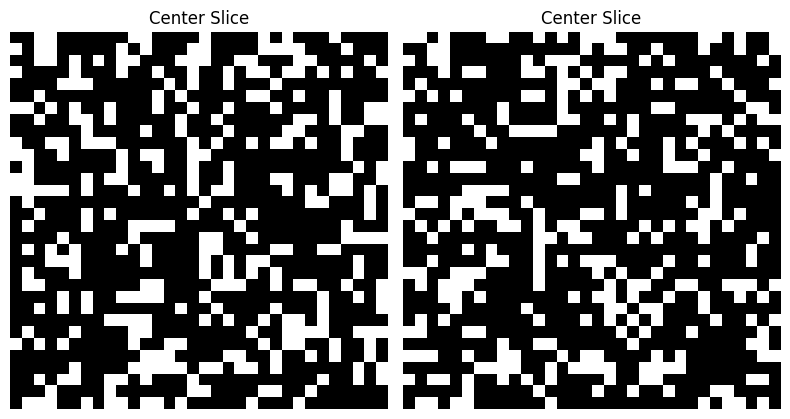

(2, 1, 32, 32, 32)


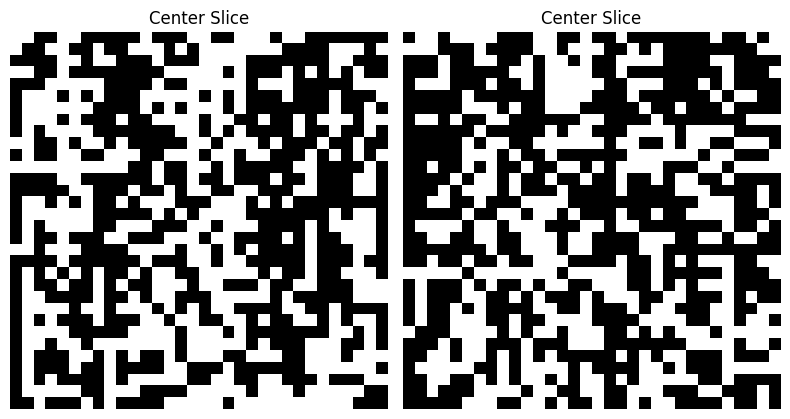

Sampling Steps:   3%|███▍                                                                                                             | 6/200 [00:03<01:58,  1.63it/s]

timestep:969
(2, 1, 32, 32, 32)


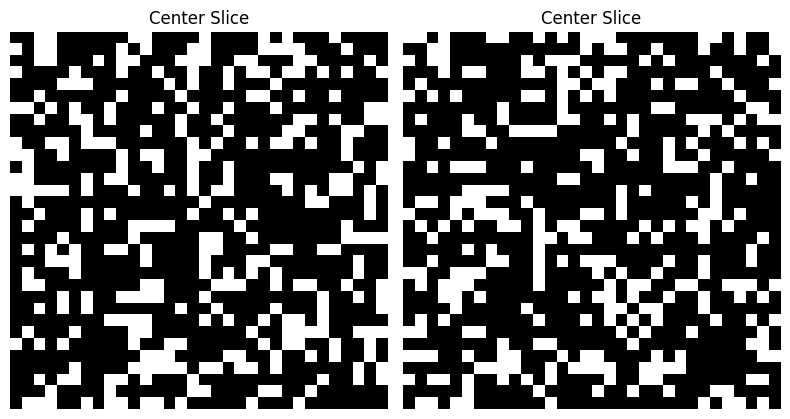

(2, 1, 32, 32, 32)


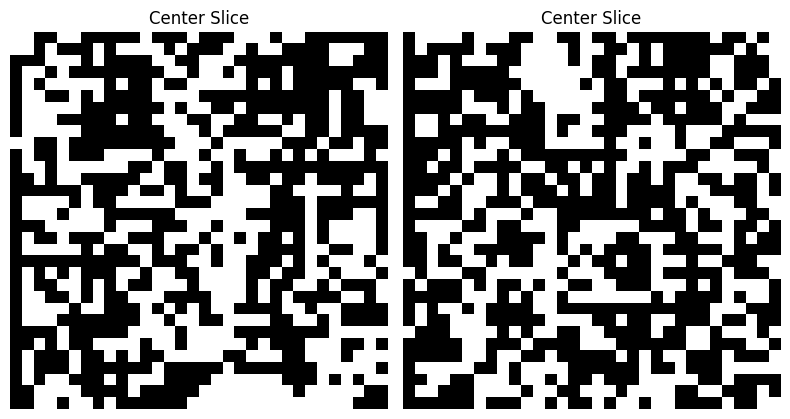

Sampling Steps:   4%|███▉                                                                                                             | 7/200 [00:04<01:56,  1.66it/s]

timestep:964
(2, 1, 32, 32, 32)


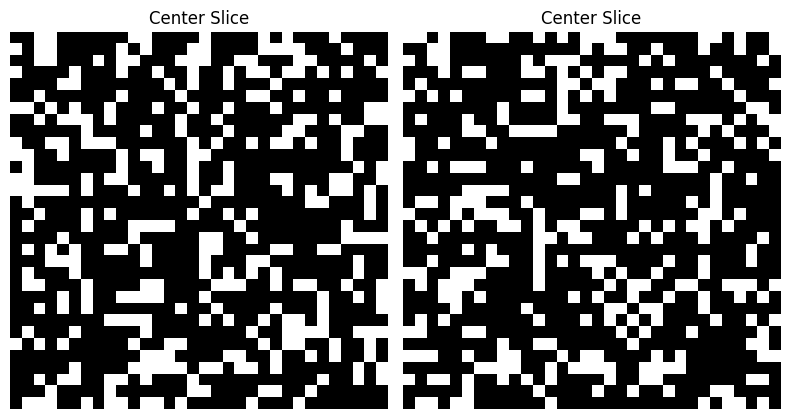

(2, 1, 32, 32, 32)


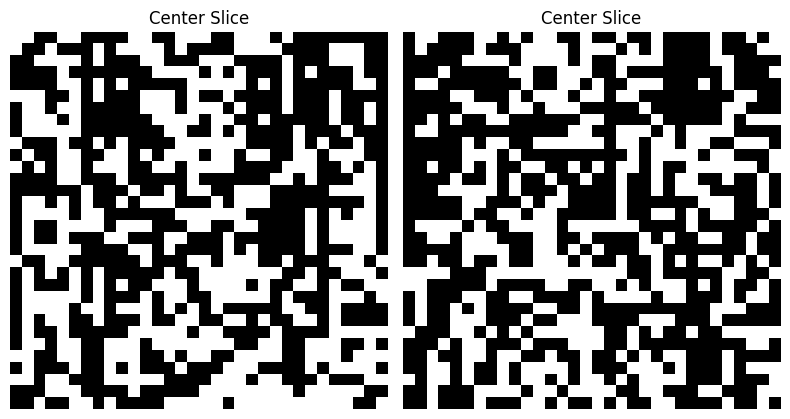

Sampling Steps:   4%|████▌                                                                                                            | 8/200 [00:05<01:54,  1.67it/s]

timestep:959
(2, 1, 32, 32, 32)


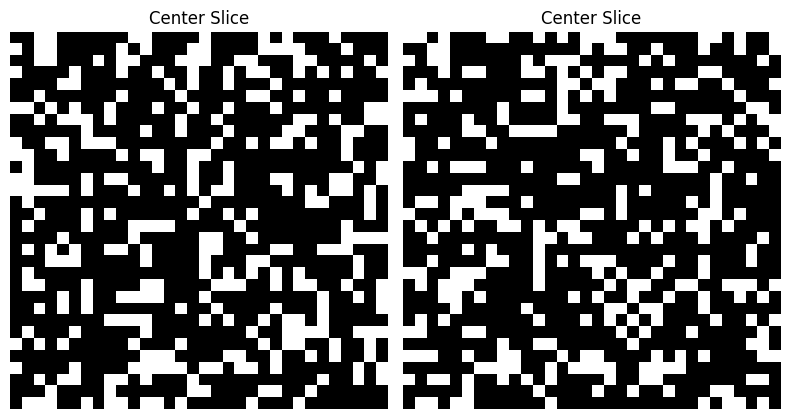

(2, 1, 32, 32, 32)


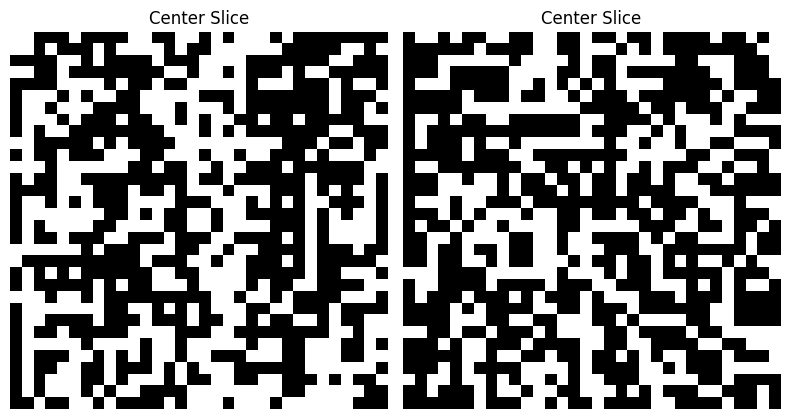

Sampling Steps:   4%|█████                                                                                                            | 9/200 [00:05<01:53,  1.69it/s]

timestep:954
(2, 1, 32, 32, 32)


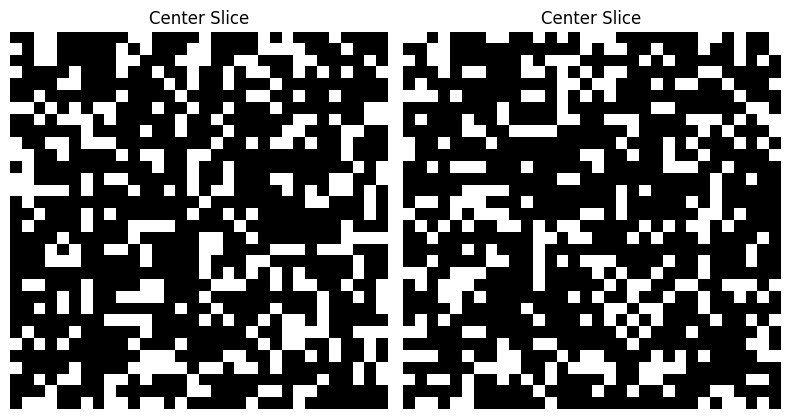

(2, 1, 32, 32, 32)


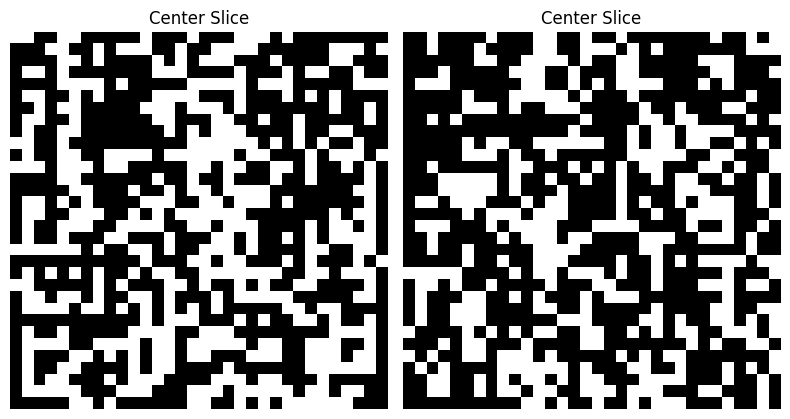

Sampling Steps:   5%|█████▌                                                                                                          | 10/200 [00:06<01:52,  1.69it/s]

timestep:949
(2, 1, 32, 32, 32)


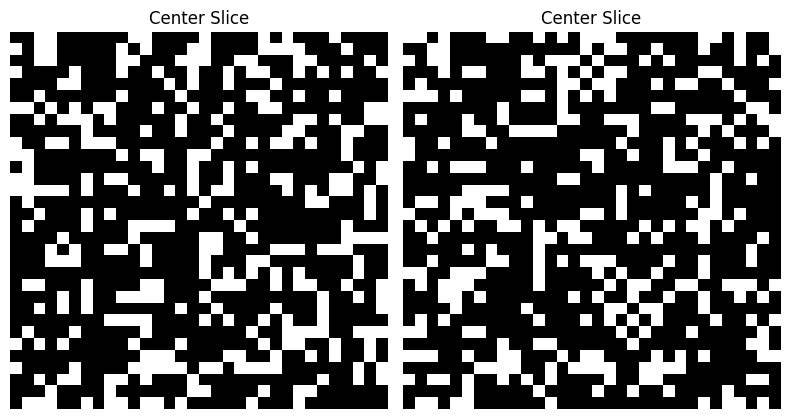

(2, 1, 32, 32, 32)


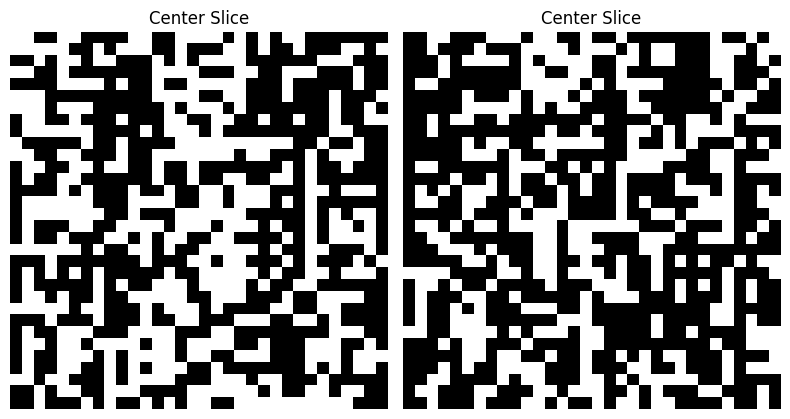

Sampling Steps:   6%|██████▏                                                                                                         | 11/200 [00:06<01:51,  1.70it/s]

timestep:944
(2, 1, 32, 32, 32)


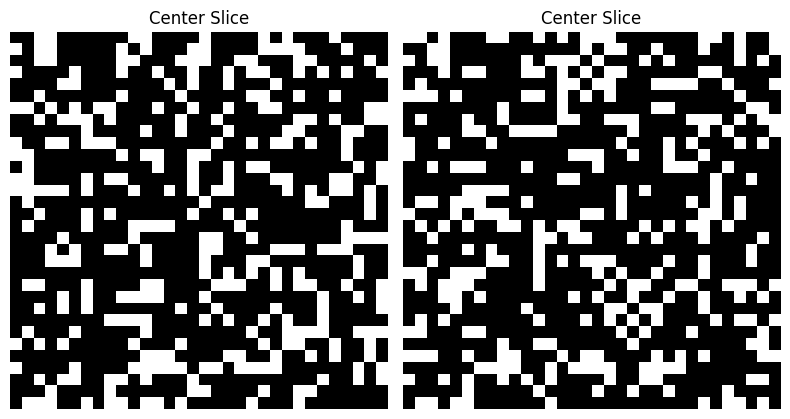

(2, 1, 32, 32, 32)


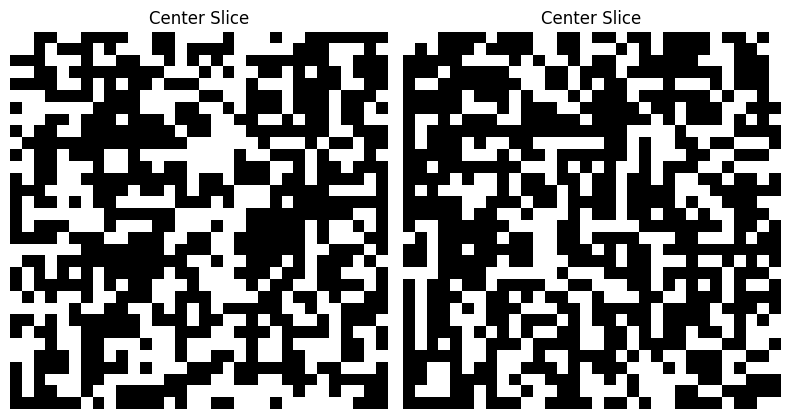

Sampling Steps:   6%|██████▋                                                                                                         | 12/200 [00:07<01:50,  1.70it/s]

timestep:939
(2, 1, 32, 32, 32)


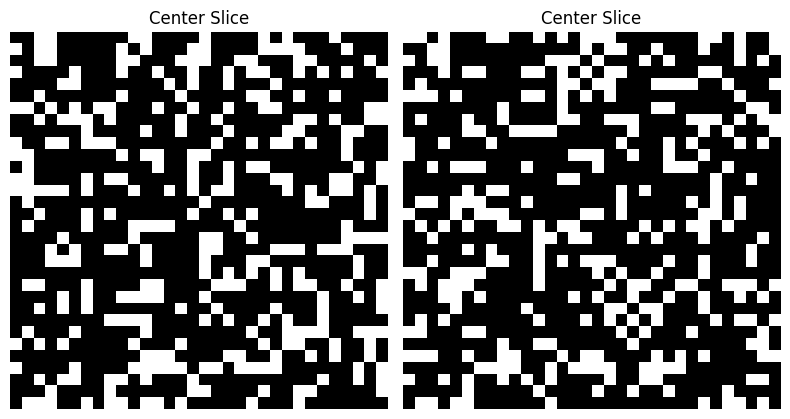

(2, 1, 32, 32, 32)


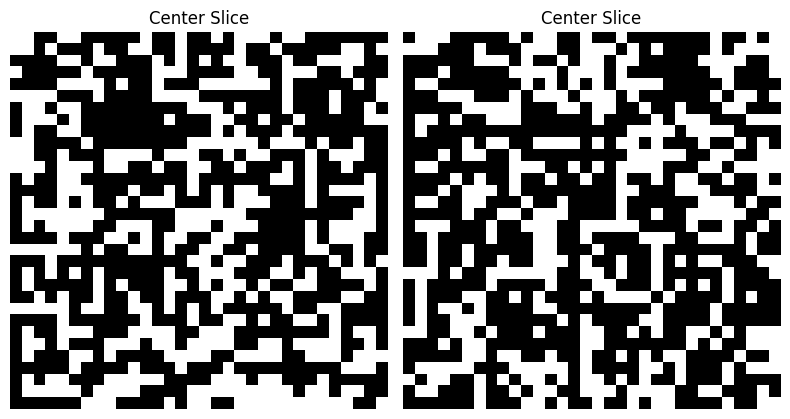

Sampling Steps:   6%|███████▎                                                                                                        | 13/200 [00:08<01:49,  1.70it/s]

timestep:934
(2, 1, 32, 32, 32)


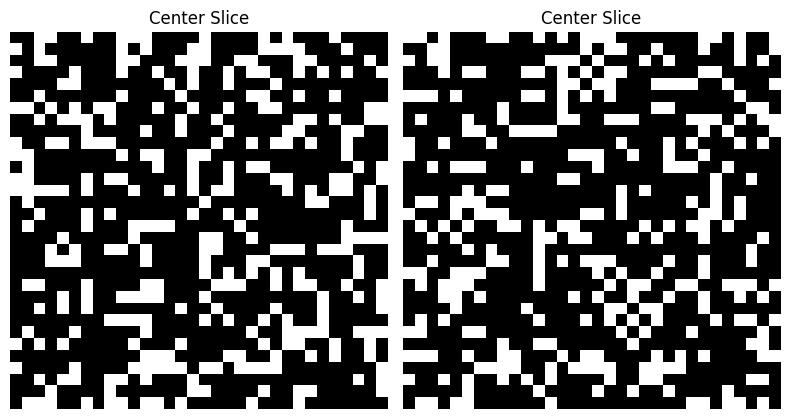

(2, 1, 32, 32, 32)


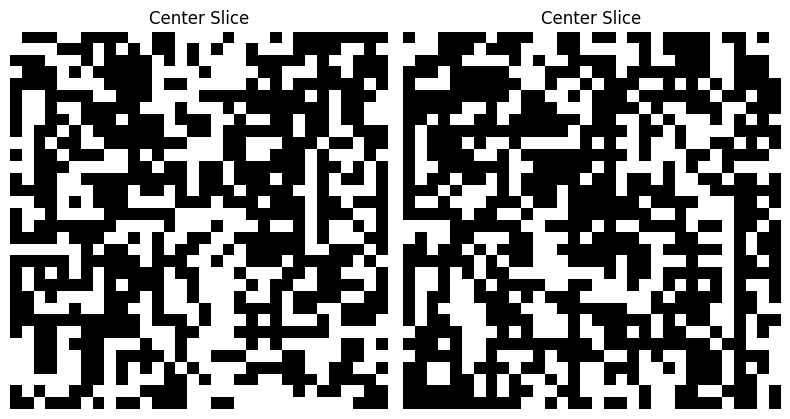

Sampling Steps:   7%|███████▊                                                                                                        | 14/200 [00:08<01:49,  1.70it/s]

timestep:929
(2, 1, 32, 32, 32)


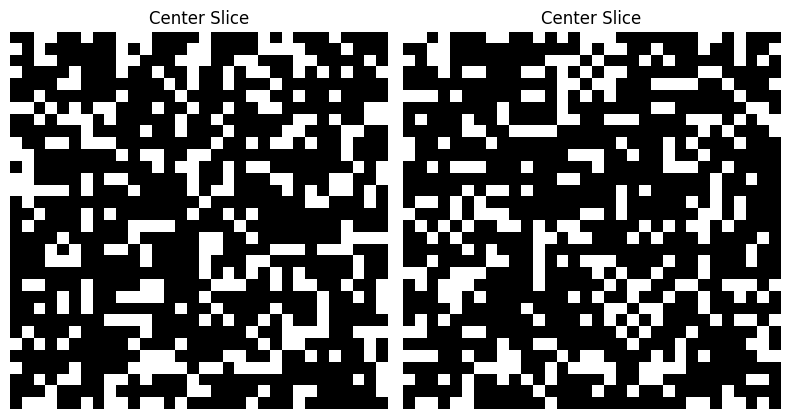

(2, 1, 32, 32, 32)


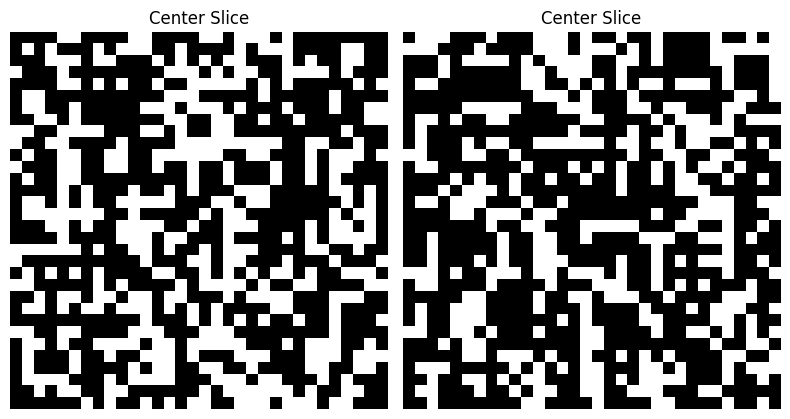

Sampling Steps:   8%|████████▍                                                                                                       | 15/200 [00:09<01:48,  1.70it/s]

timestep:924
(2, 1, 32, 32, 32)


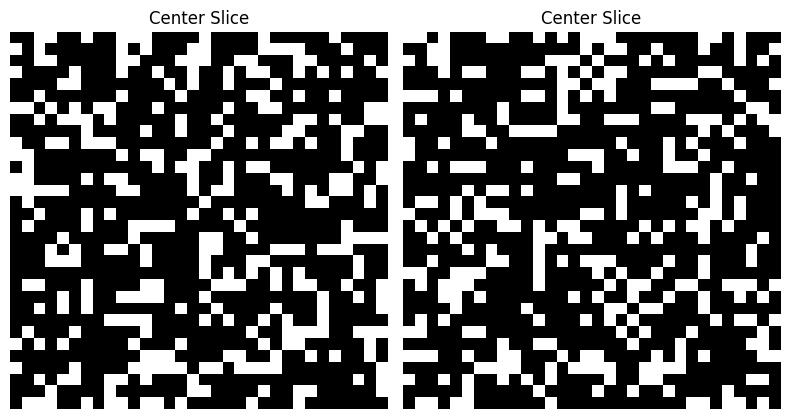

(2, 1, 32, 32, 32)


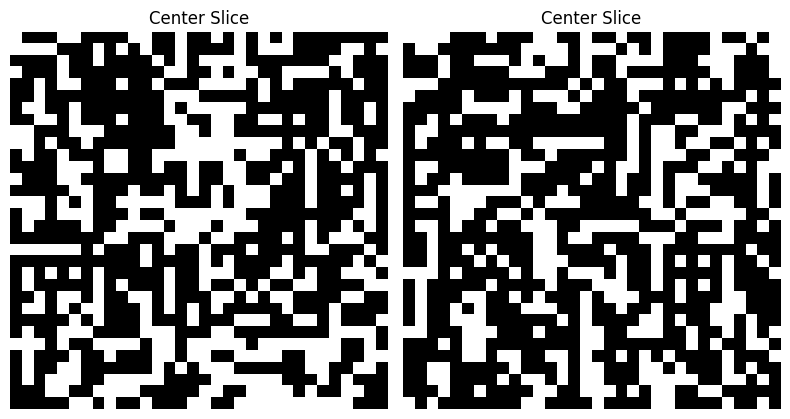

Sampling Steps:   8%|████████▉                                                                                                       | 16/200 [00:09<01:48,  1.70it/s]

timestep:919
(2, 1, 32, 32, 32)


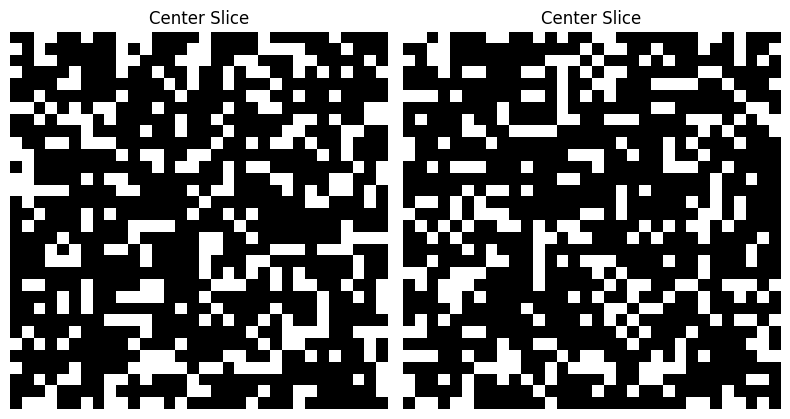

(2, 1, 32, 32, 32)


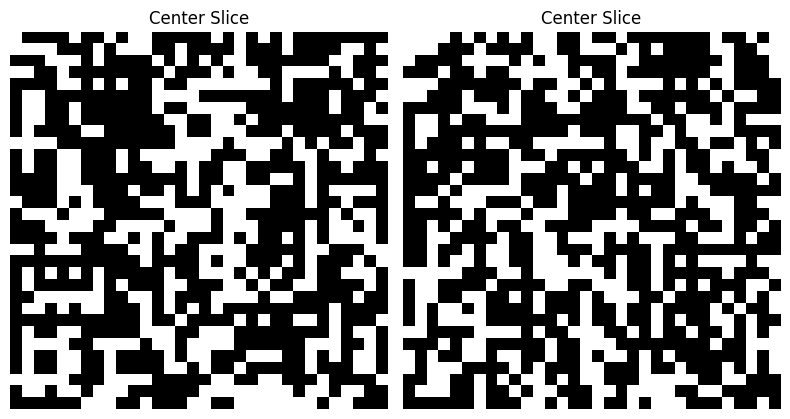

Sampling Steps:   8%|█████████▌                                                                                                      | 17/200 [00:10<01:47,  1.70it/s]

timestep:914
(2, 1, 32, 32, 32)


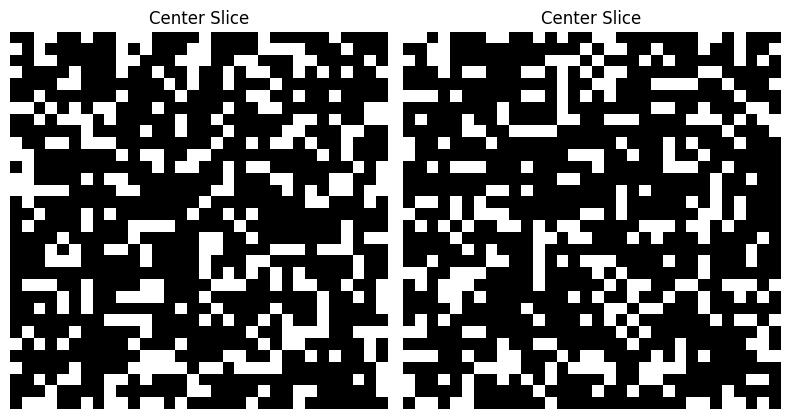

(2, 1, 32, 32, 32)


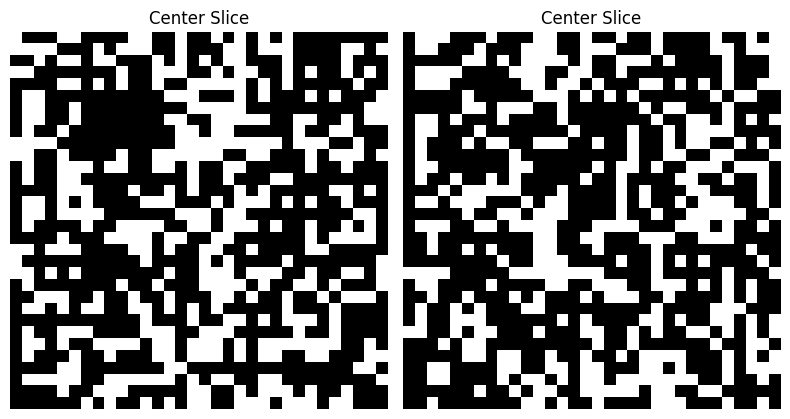

Sampling Steps:   9%|██████████                                                                                                      | 18/200 [00:11<01:46,  1.70it/s]

timestep:909
(2, 1, 32, 32, 32)


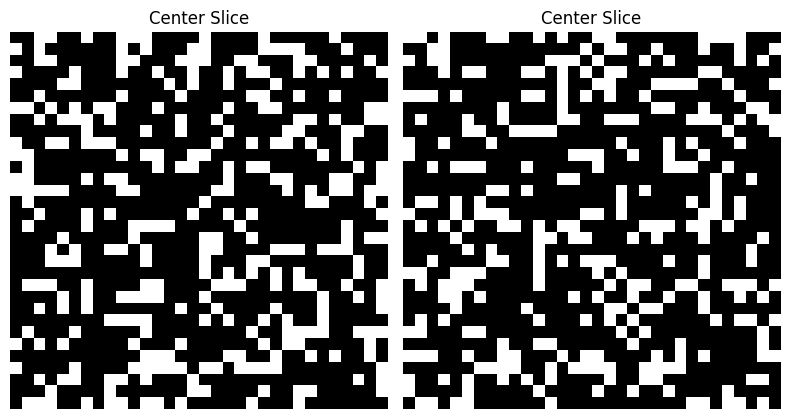

(2, 1, 32, 32, 32)


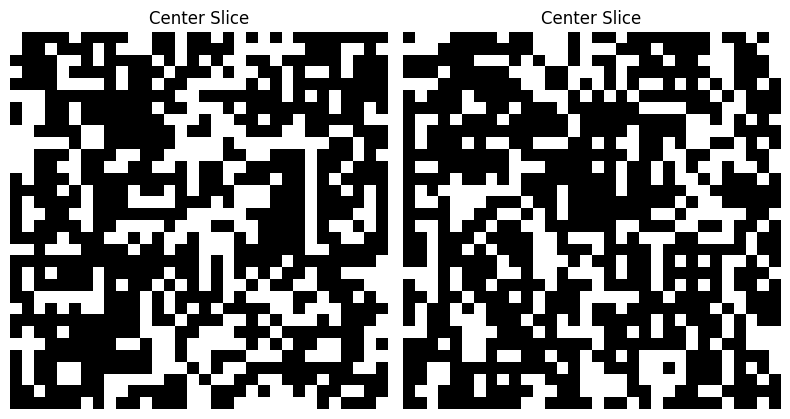

Sampling Steps:  10%|██████████▋                                                                                                     | 19/200 [00:11<01:46,  1.71it/s]

timestep:904
(2, 1, 32, 32, 32)


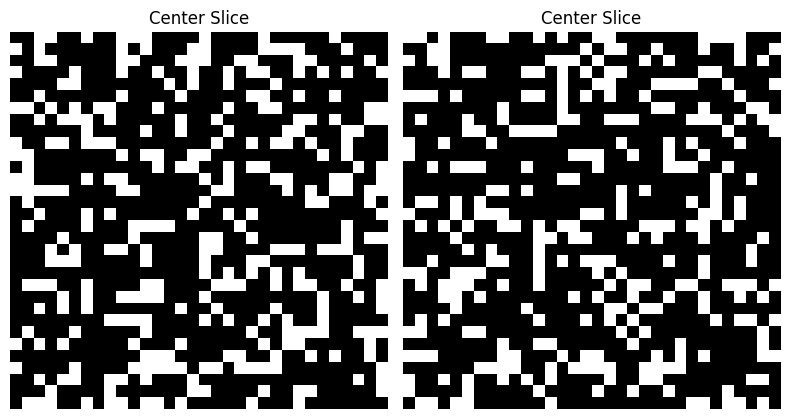

(2, 1, 32, 32, 32)


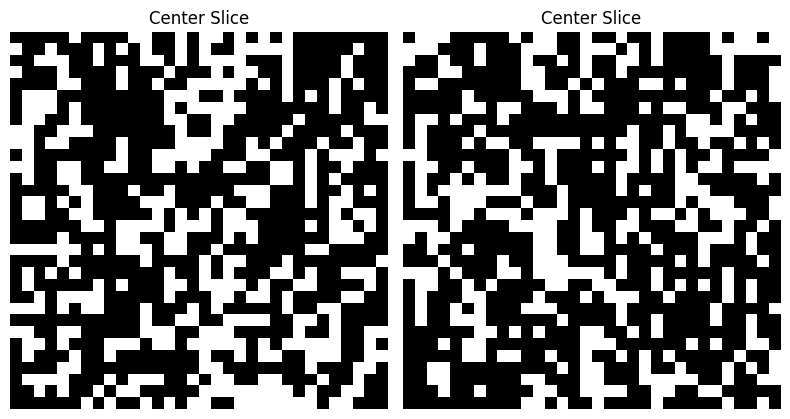

Sampling Steps:  10%|███████████▏                                                                                                    | 20/200 [00:12<01:45,  1.71it/s]

timestep:899
(2, 1, 32, 32, 32)


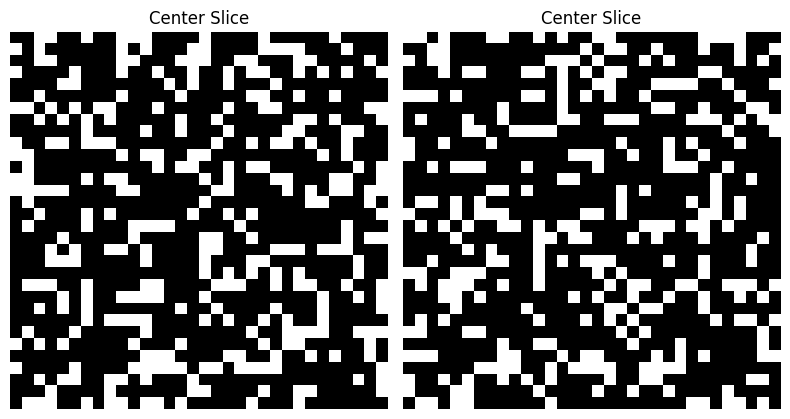

(2, 1, 32, 32, 32)


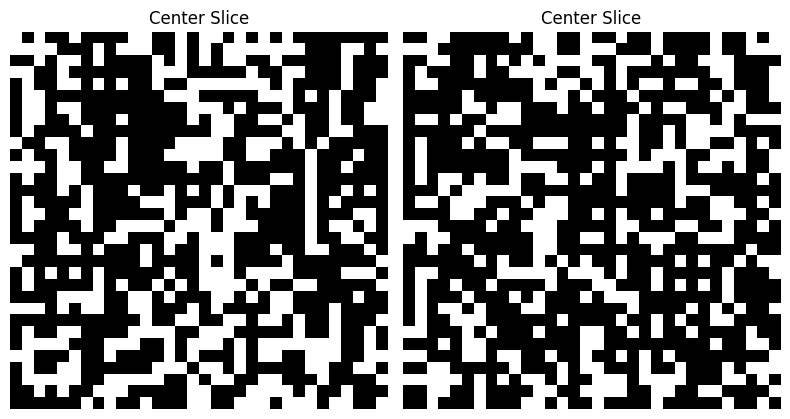

Sampling Steps:  10%|███████████▊                                                                                                    | 21/200 [00:12<01:44,  1.71it/s]

timestep:894
(2, 1, 32, 32, 32)


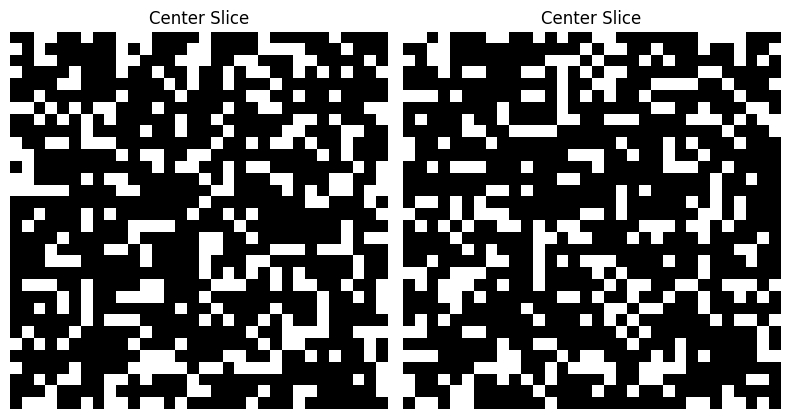

(2, 1, 32, 32, 32)


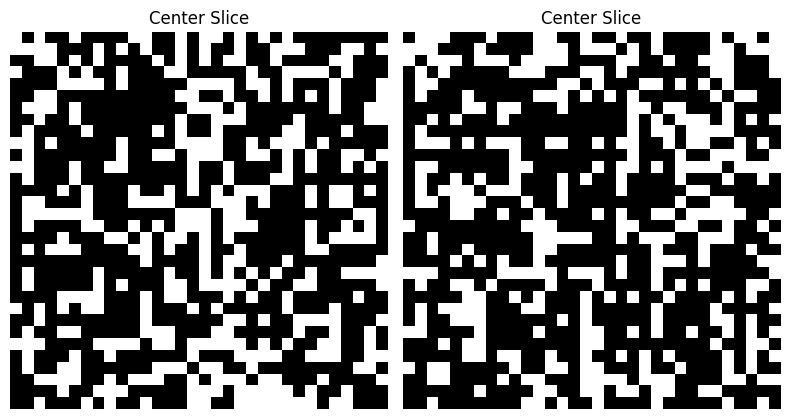

Sampling Steps:  11%|████████████▎                                                                                                   | 22/200 [00:13<01:43,  1.71it/s]

timestep:889
(2, 1, 32, 32, 32)


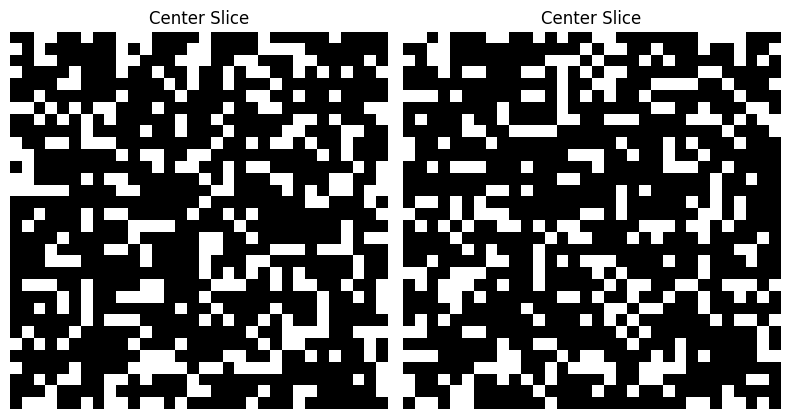

(2, 1, 32, 32, 32)


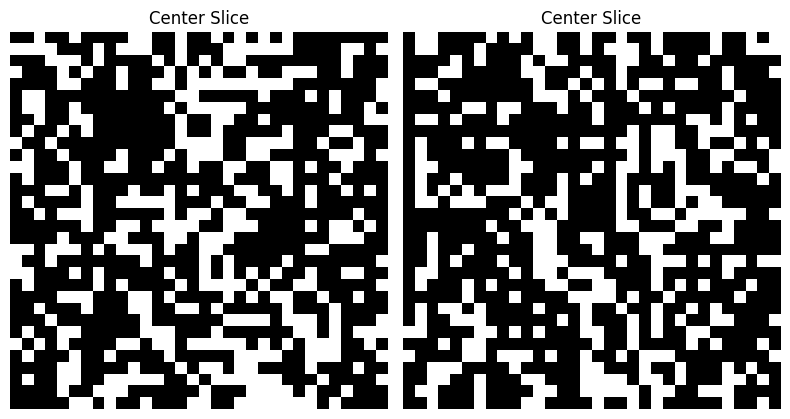

Sampling Steps:  12%|████████████▉                                                                                                   | 23/200 [00:13<01:43,  1.71it/s]

timestep:884
(2, 1, 32, 32, 32)


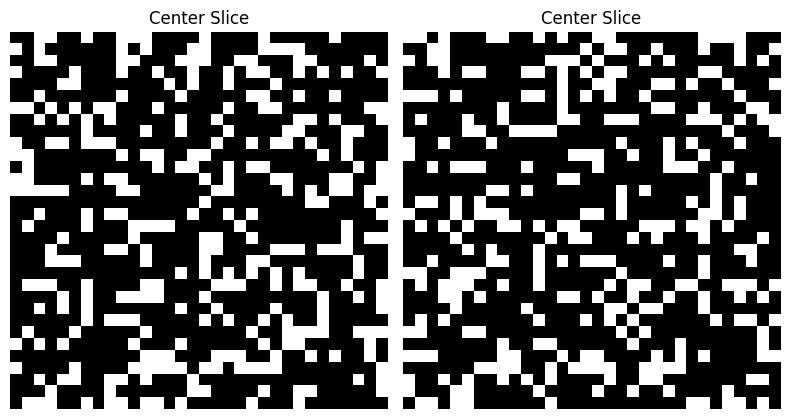

(2, 1, 32, 32, 32)


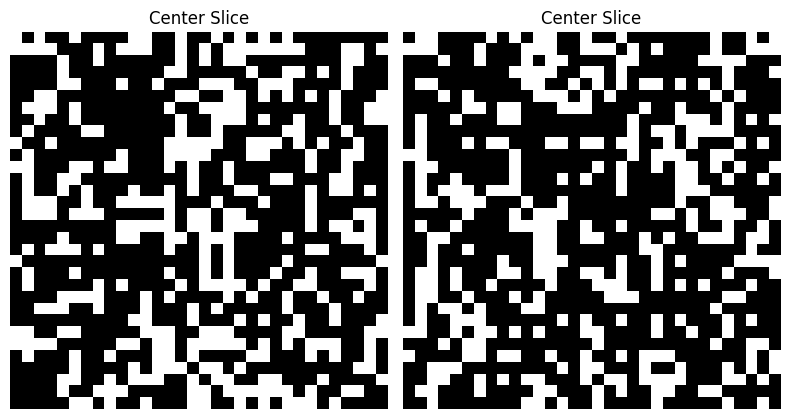

Sampling Steps:  12%|█████████████▍                                                                                                  | 24/200 [00:14<01:42,  1.71it/s]

timestep:879
(2, 1, 32, 32, 32)


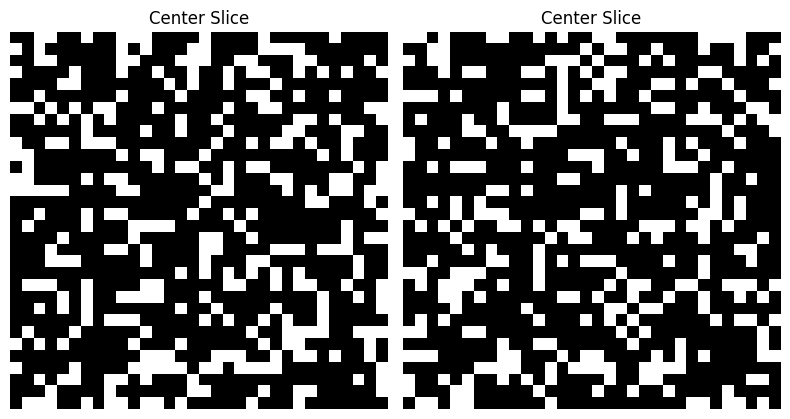

(2, 1, 32, 32, 32)


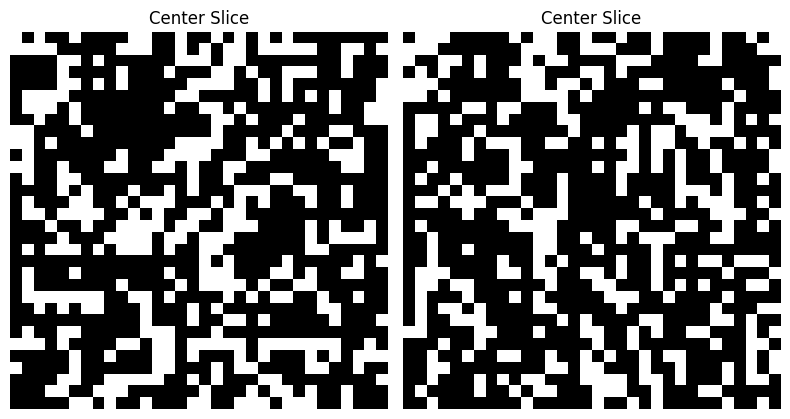

Sampling Steps:  12%|██████████████                                                                                                  | 25/200 [00:15<01:42,  1.71it/s]

timestep:874
(2, 1, 32, 32, 32)


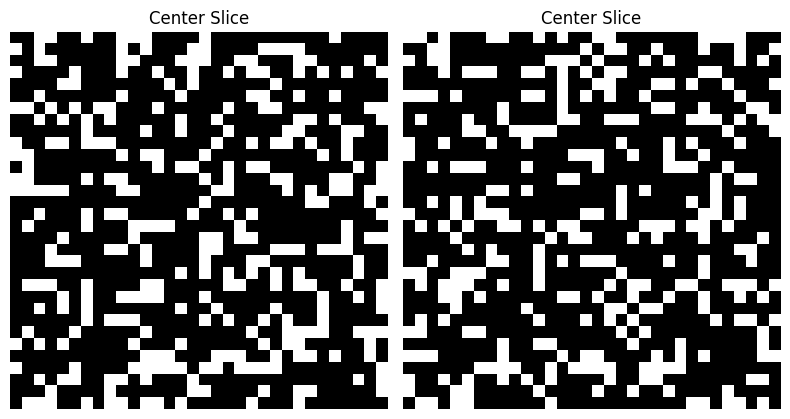

(2, 1, 32, 32, 32)


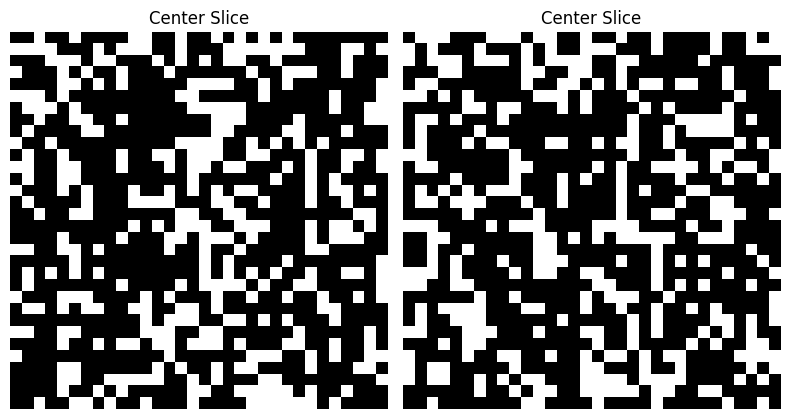

Sampling Steps:  13%|██████████████▌                                                                                                 | 26/200 [00:15<01:41,  1.71it/s]

timestep:869
(2, 1, 32, 32, 32)


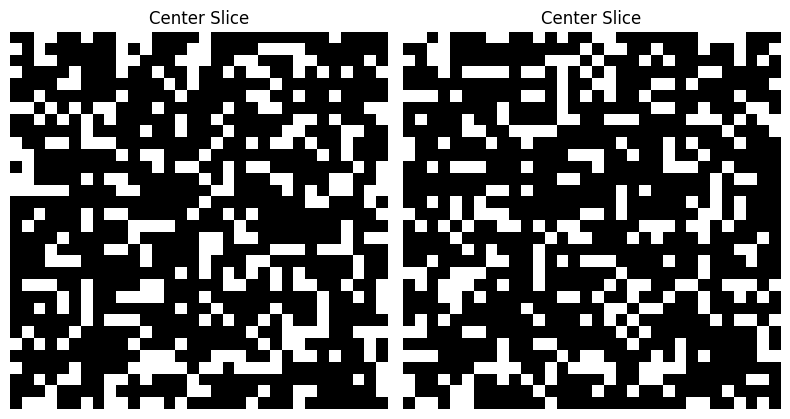

(2, 1, 32, 32, 32)


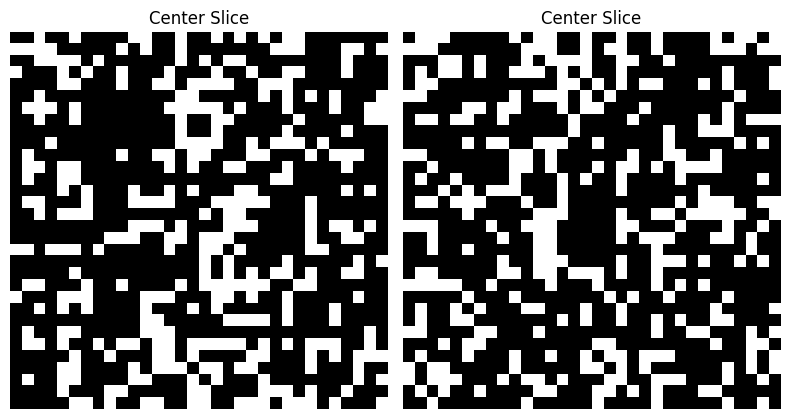

Sampling Steps:  14%|███████████████                                                                                                 | 27/200 [00:16<01:41,  1.71it/s]

timestep:864
(2, 1, 32, 32, 32)


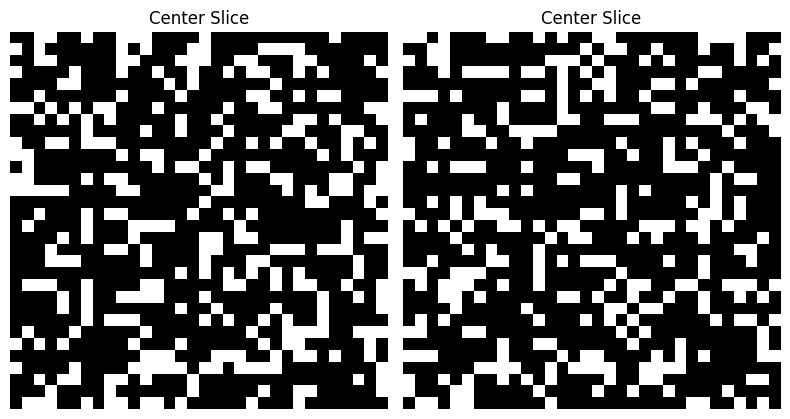

(2, 1, 32, 32, 32)


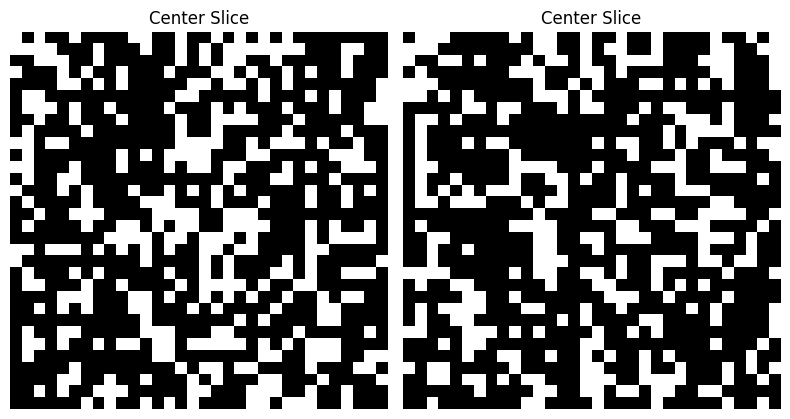

Sampling Steps:  14%|███████████████▋                                                                                                | 28/200 [00:17<02:06,  1.36it/s]

timestep:859
(2, 1, 32, 32, 32)


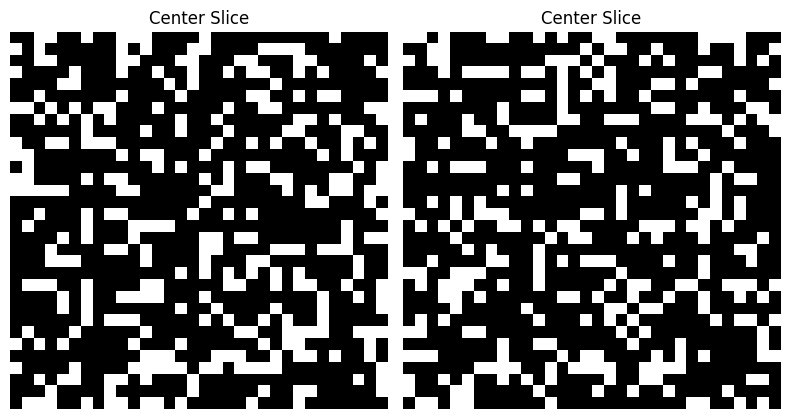

(2, 1, 32, 32, 32)


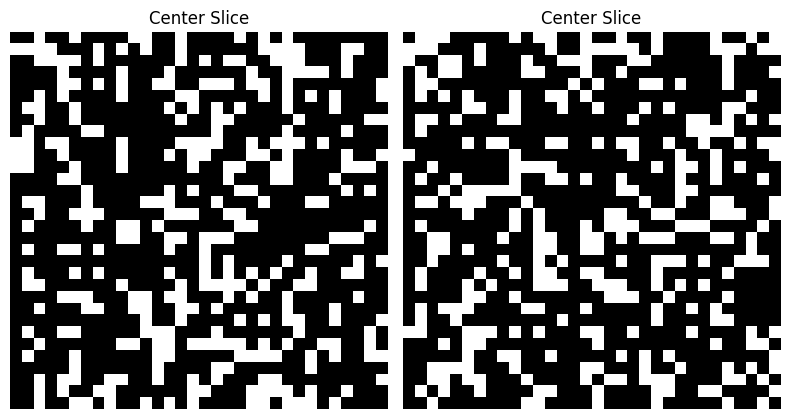

Sampling Steps:  14%|████████████████▏                                                                                               | 29/200 [00:17<01:57,  1.45it/s]

timestep:854
(2, 1, 32, 32, 32)


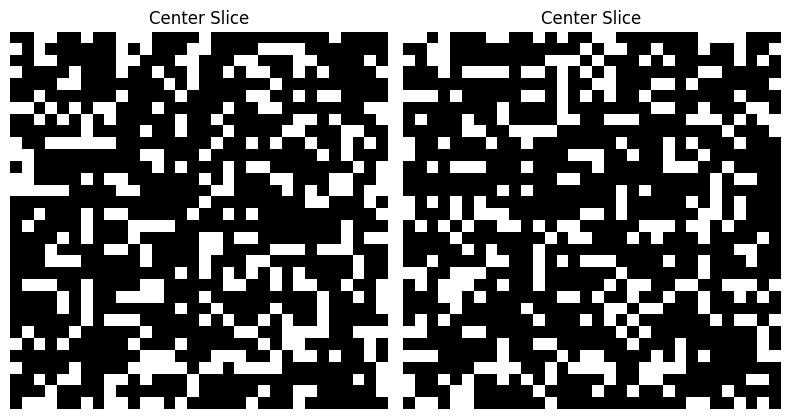

(2, 1, 32, 32, 32)


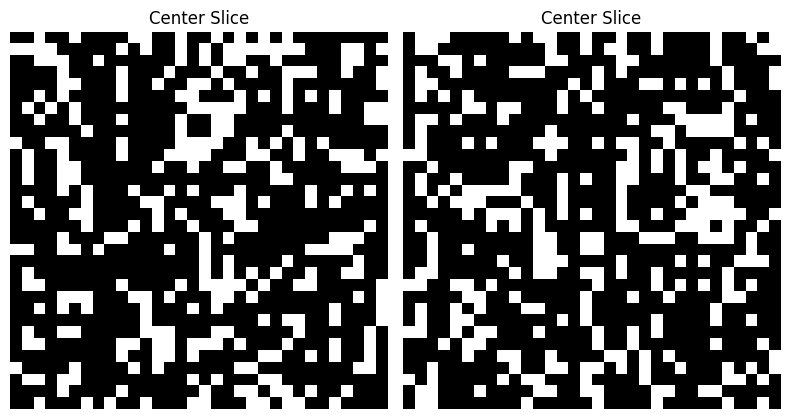

Sampling Steps:  15%|████████████████▊                                                                                               | 30/200 [00:18<01:51,  1.52it/s]

timestep:849
(2, 1, 32, 32, 32)


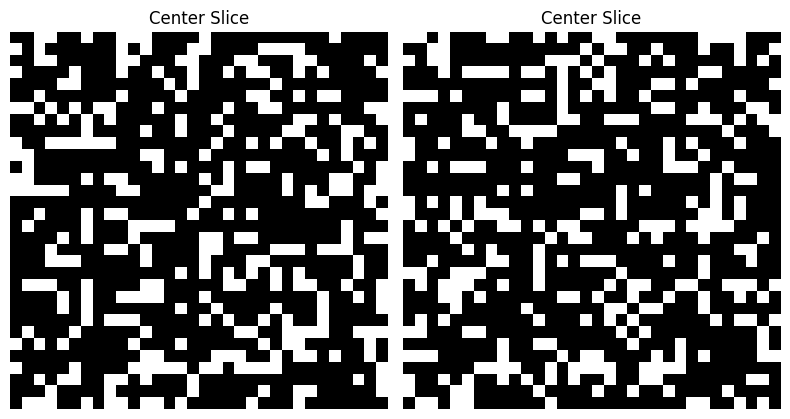

(2, 1, 32, 32, 32)


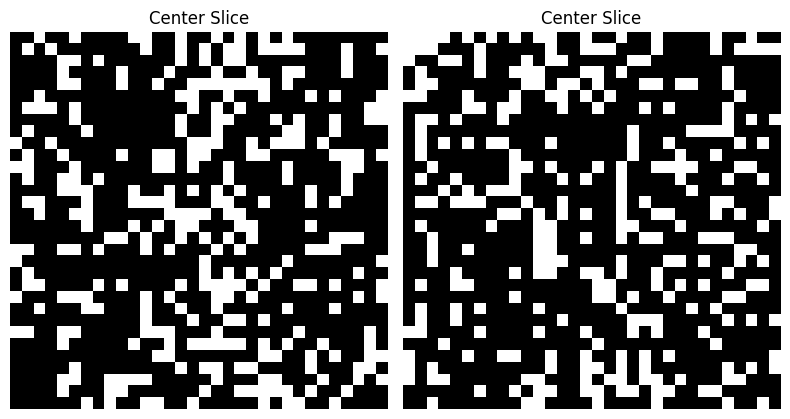

Sampling Steps:  16%|█████████████████▎                                                                                              | 31/200 [00:19<01:47,  1.57it/s]

timestep:844
(2, 1, 32, 32, 32)


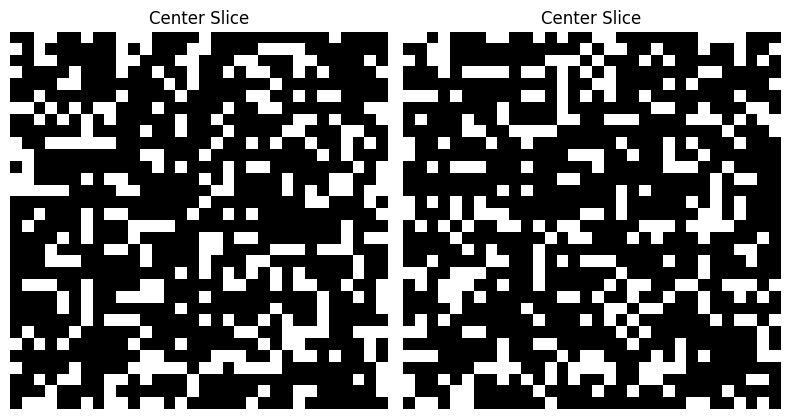

(2, 1, 32, 32, 32)


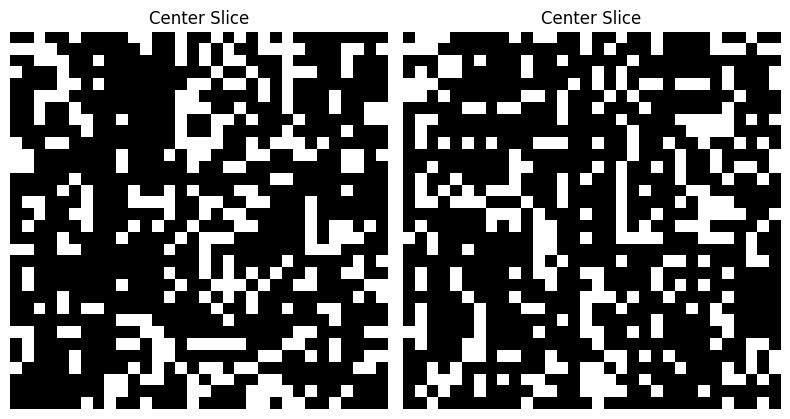

Sampling Steps:  16%|█████████████████▉                                                                                              | 32/200 [00:19<01:44,  1.61it/s]

timestep:839
(2, 1, 32, 32, 32)


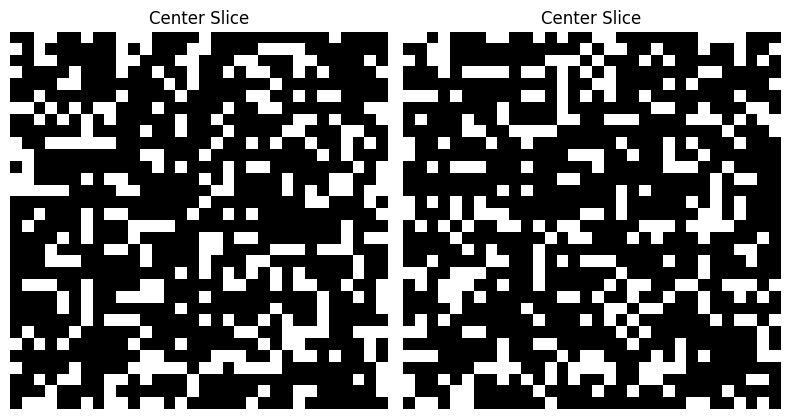

(2, 1, 32, 32, 32)


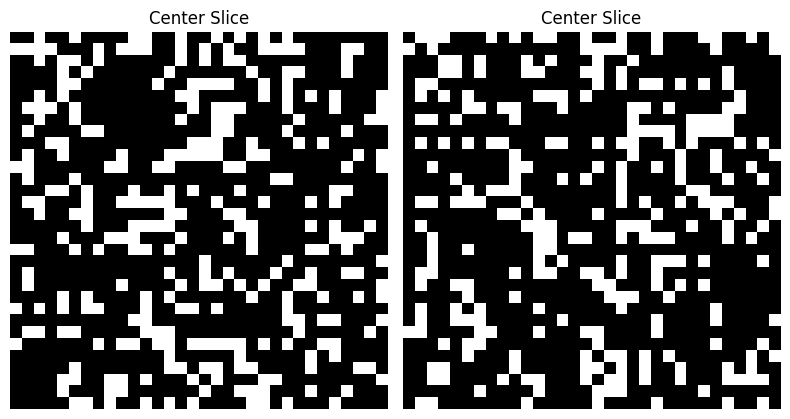

Sampling Steps:  16%|██████████████████▍                                                                                             | 33/200 [00:20<01:41,  1.64it/s]

timestep:834
(2, 1, 32, 32, 32)


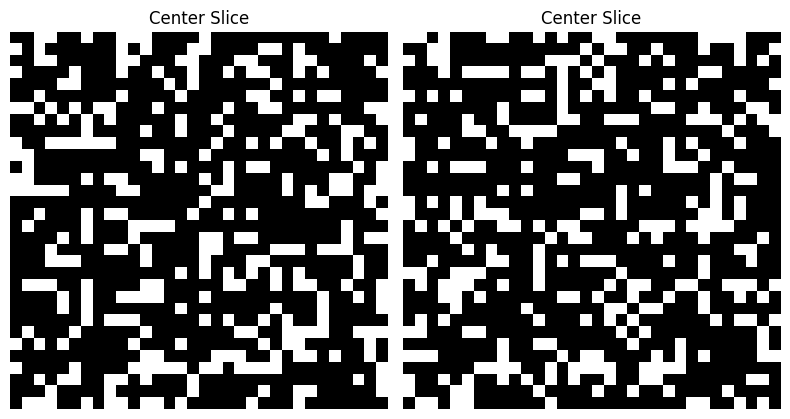

(2, 1, 32, 32, 32)


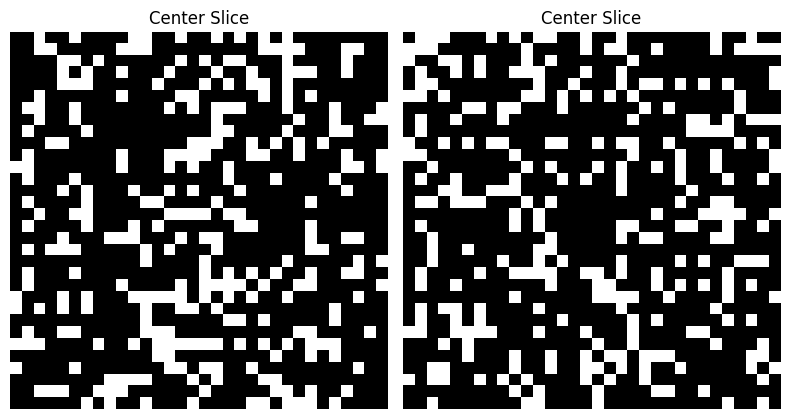

Sampling Steps:  17%|███████████████████                                                                                             | 34/200 [00:20<01:39,  1.66it/s]

timestep:829
(2, 1, 32, 32, 32)


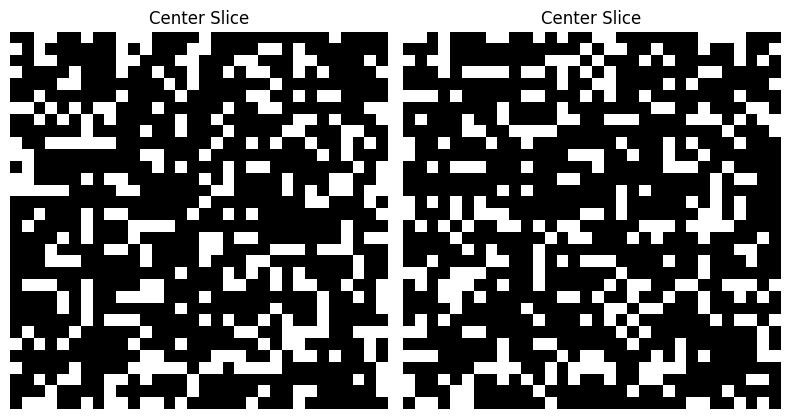

(2, 1, 32, 32, 32)


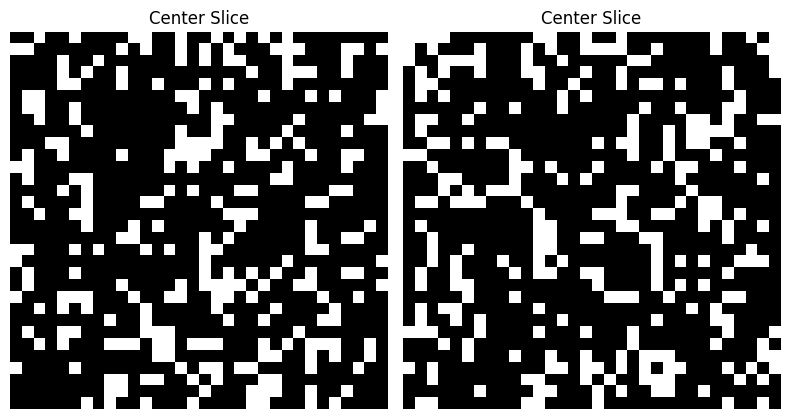

Sampling Steps:  18%|███████████████████▌                                                                                            | 35/200 [00:21<01:38,  1.67it/s]

timestep:824
(2, 1, 32, 32, 32)


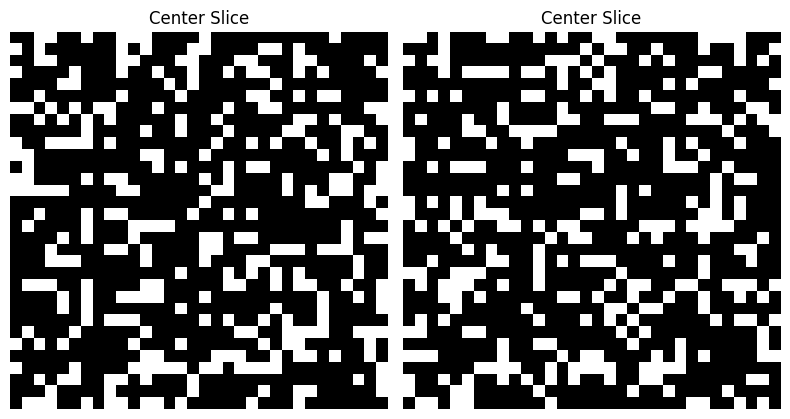

(2, 1, 32, 32, 32)


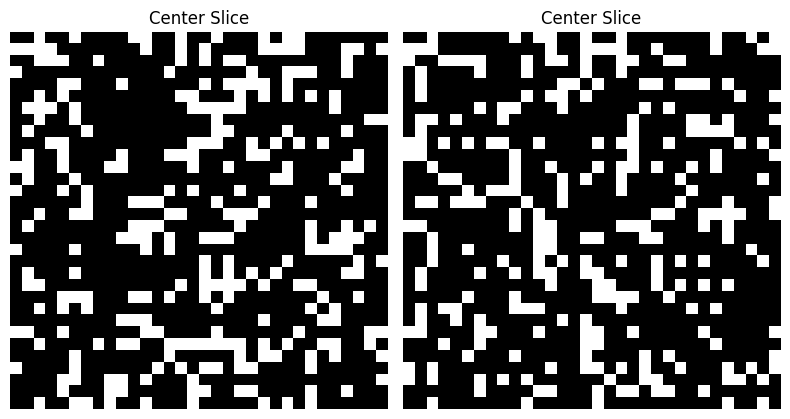

Sampling Steps:  18%|████████████████████▏                                                                                           | 36/200 [00:22<01:37,  1.68it/s]

timestep:819
(2, 1, 32, 32, 32)


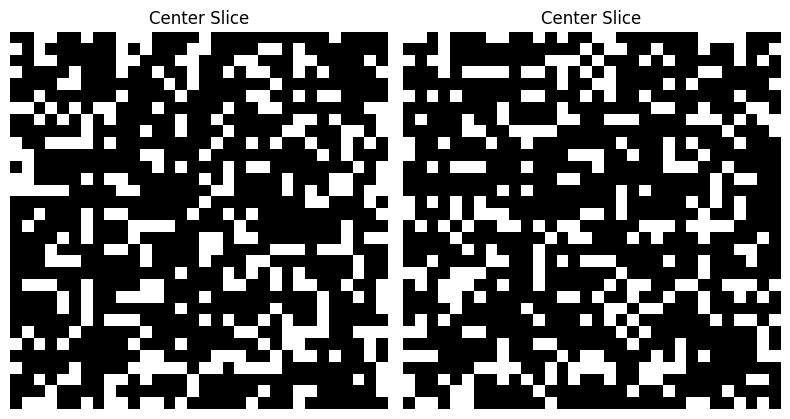

(2, 1, 32, 32, 32)


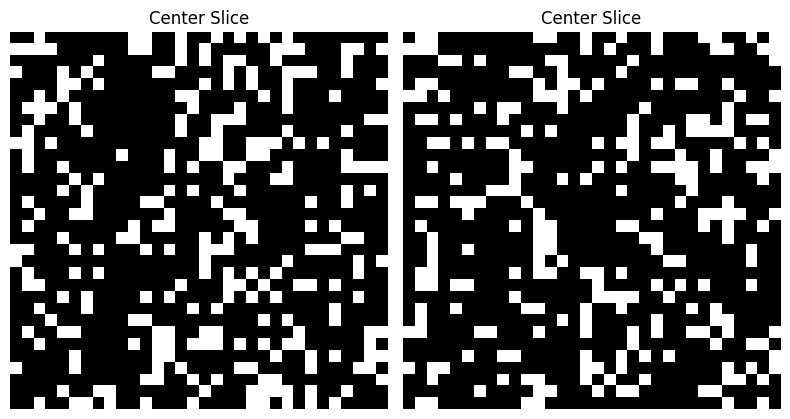

Sampling Steps:  18%|████████████████████▋                                                                                           | 37/200 [00:22<01:36,  1.69it/s]

timestep:814
(2, 1, 32, 32, 32)


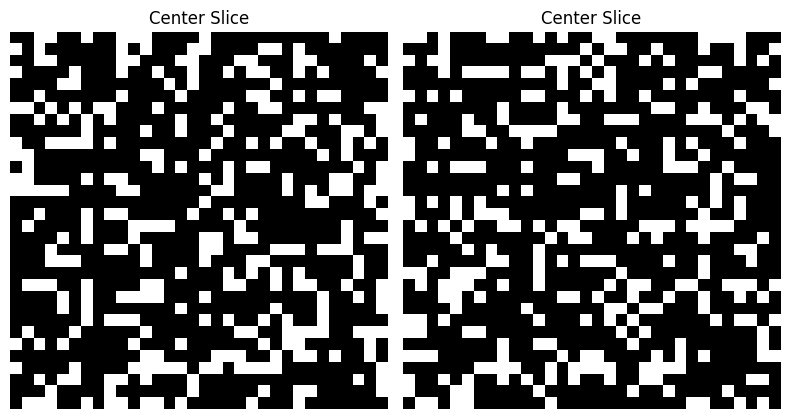

(2, 1, 32, 32, 32)


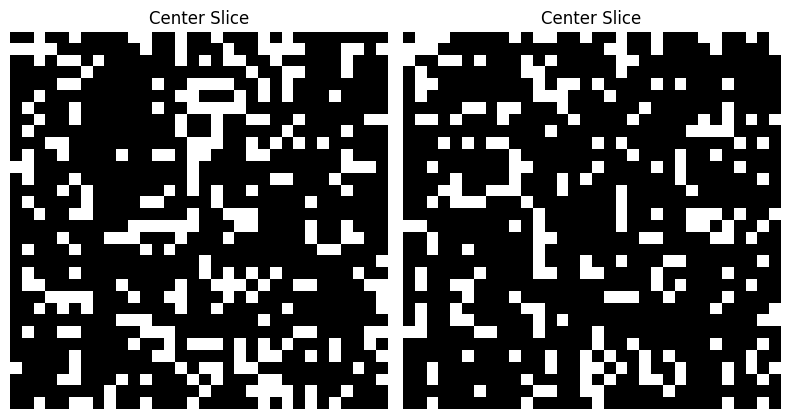

Sampling Steps:  19%|█████████████████████▎                                                                                          | 38/200 [00:23<01:36,  1.68it/s]

timestep:809
(2, 1, 32, 32, 32)


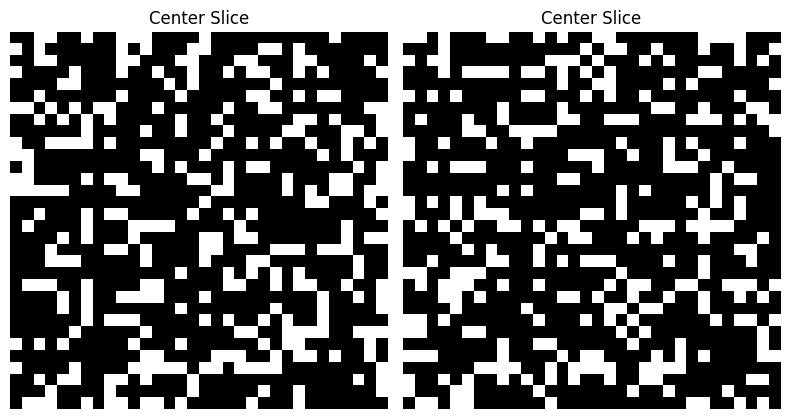

(2, 1, 32, 32, 32)


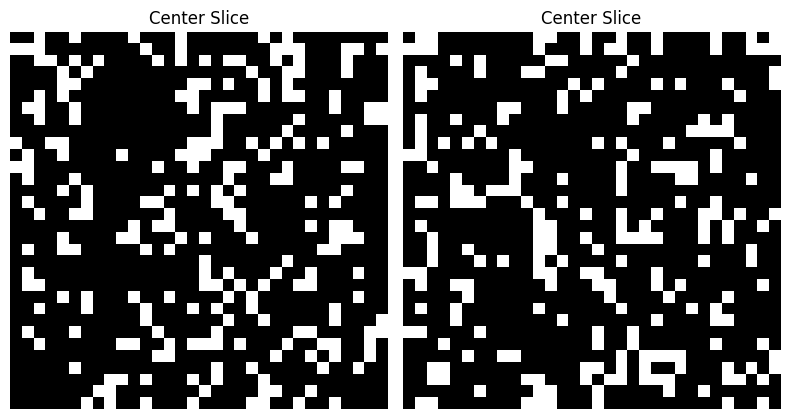

Sampling Steps:  20%|█████████████████████▊                                                                                          | 39/200 [00:23<01:35,  1.68it/s]

timestep:804
(2, 1, 32, 32, 32)


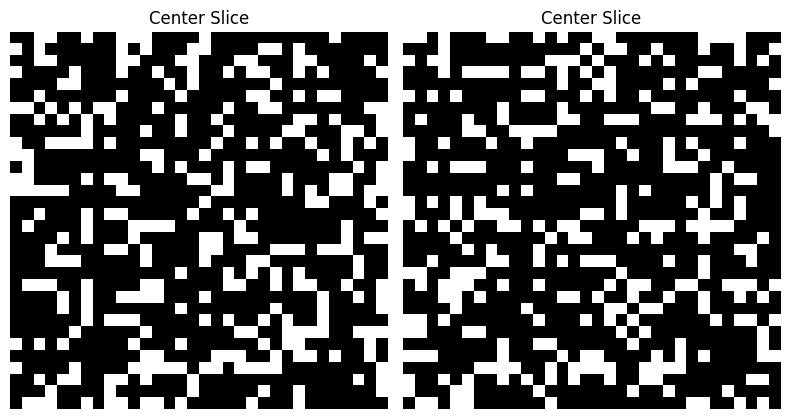

(2, 1, 32, 32, 32)


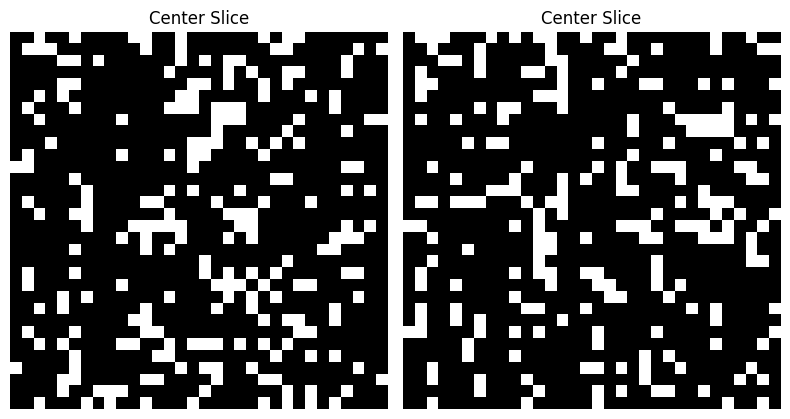

Sampling Steps:  20%|██████████████████████▍                                                                                         | 40/200 [00:24<01:35,  1.67it/s]

timestep:799
(2, 1, 32, 32, 32)


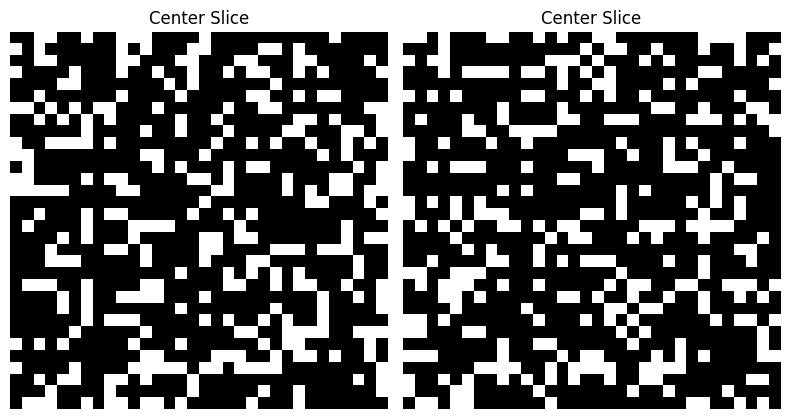

(2, 1, 32, 32, 32)


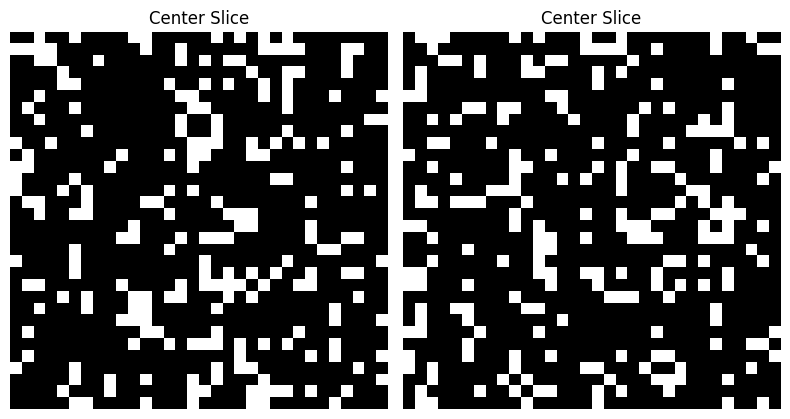

Sampling Steps:  20%|██████████████████████▉                                                                                         | 41/200 [00:25<01:34,  1.68it/s]

timestep:794
(2, 1, 32, 32, 32)


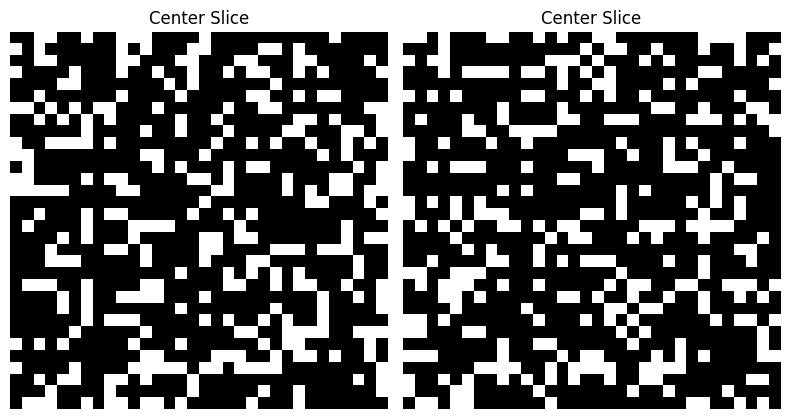

(2, 1, 32, 32, 32)


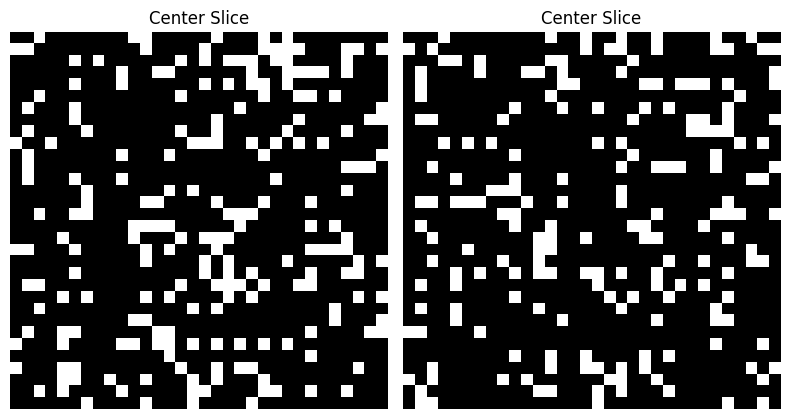

Sampling Steps:  21%|███████████████████████▌                                                                                        | 42/200 [00:25<01:33,  1.69it/s]

timestep:789
(2, 1, 32, 32, 32)


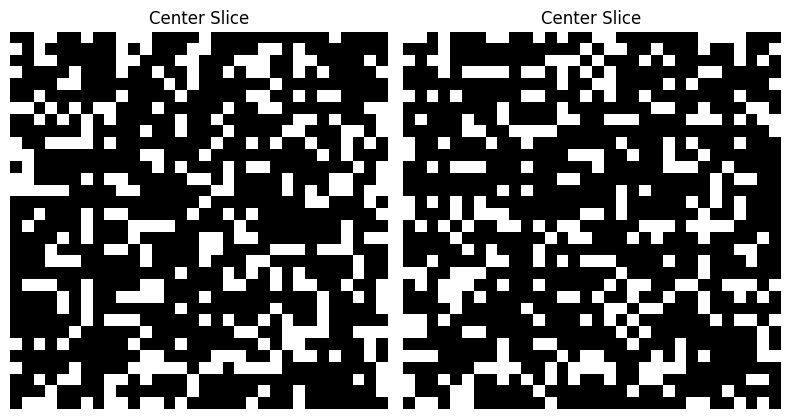

(2, 1, 32, 32, 32)


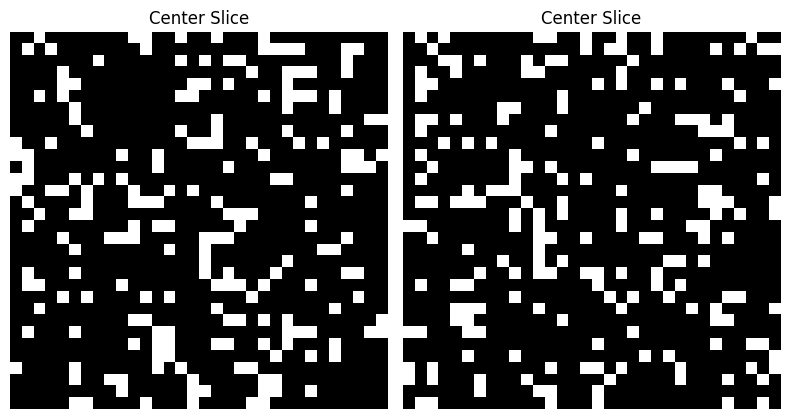

Sampling Steps:  22%|████████████████████████                                                                                        | 43/200 [00:26<01:32,  1.69it/s]

timestep:784
(2, 1, 32, 32, 32)


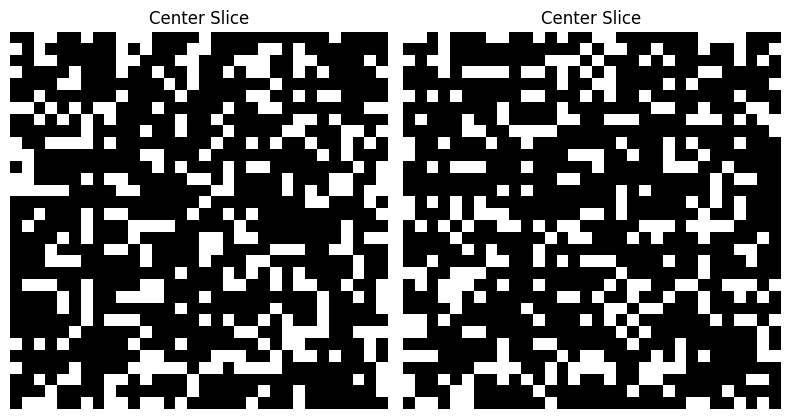

(2, 1, 32, 32, 32)


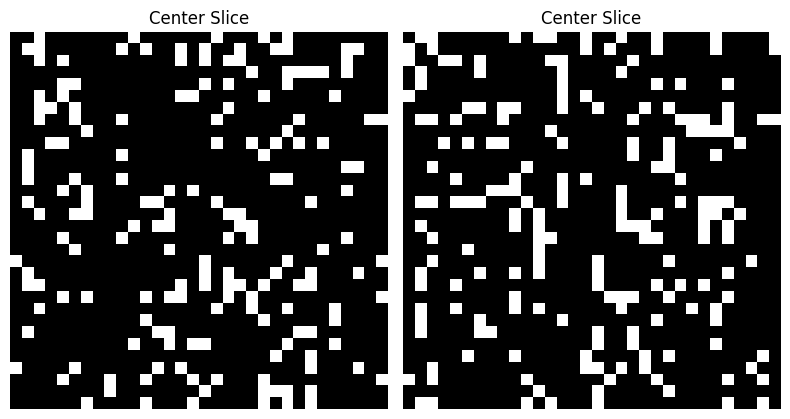

Sampling Steps:  22%|████████████████████████▋                                                                                       | 44/200 [00:26<01:32,  1.69it/s]

timestep:779
(2, 1, 32, 32, 32)


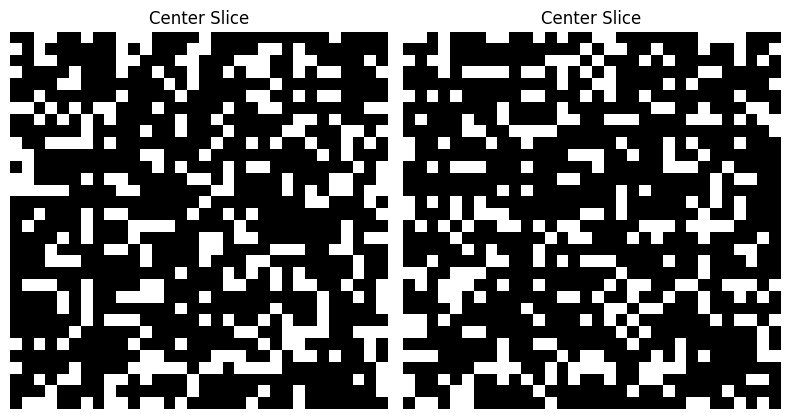

(2, 1, 32, 32, 32)


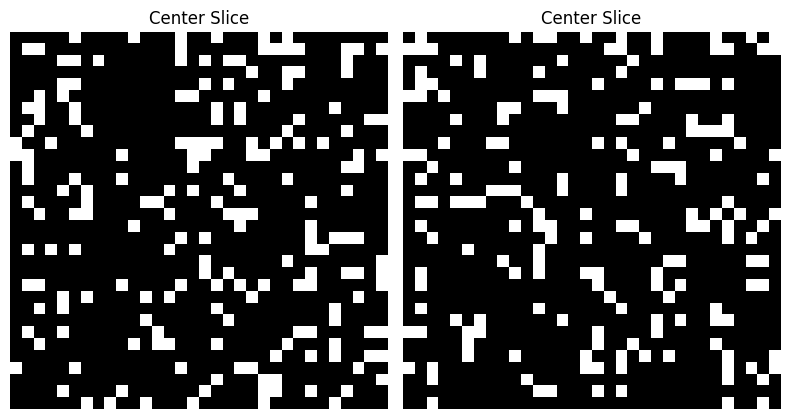

Sampling Steps:  22%|█████████████████████████▏                                                                                      | 45/200 [00:27<01:31,  1.70it/s]

timestep:774
(2, 1, 32, 32, 32)


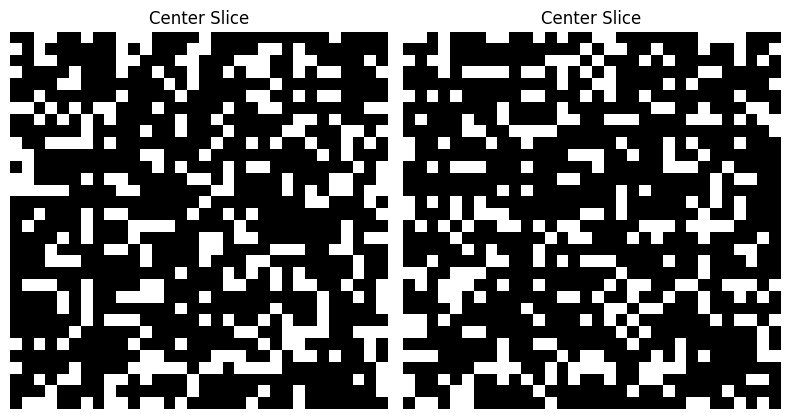

(2, 1, 32, 32, 32)


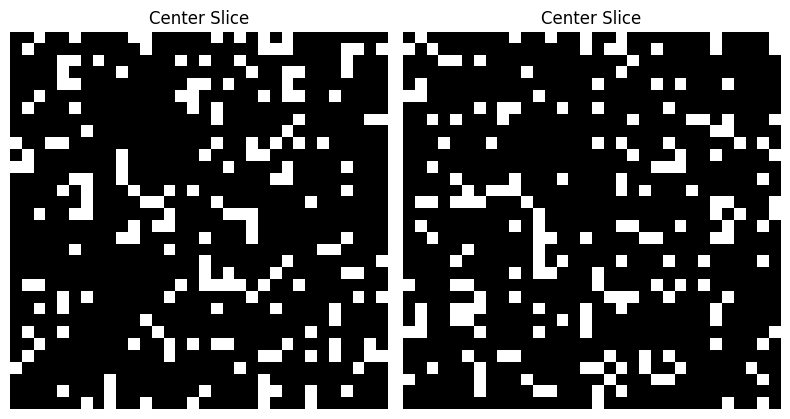

Sampling Steps:  23%|█████████████████████████▊                                                                                      | 46/200 [00:27<01:30,  1.70it/s]

timestep:769
(2, 1, 32, 32, 32)


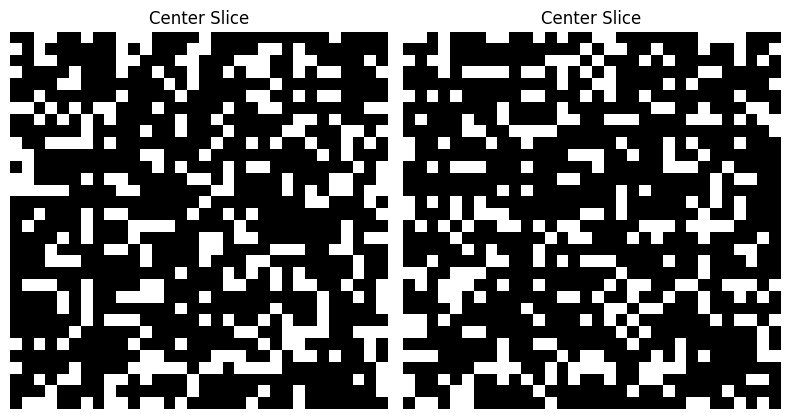

(2, 1, 32, 32, 32)


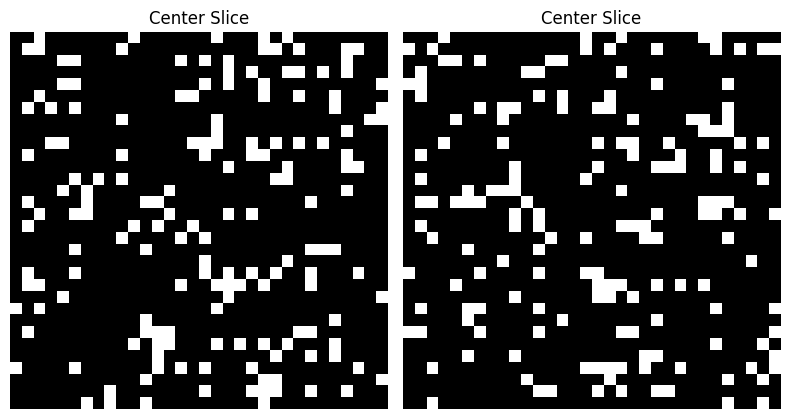

Sampling Steps:  24%|██████████████████████████▎                                                                                     | 47/200 [00:28<01:29,  1.71it/s]

timestep:764
(2, 1, 32, 32, 32)


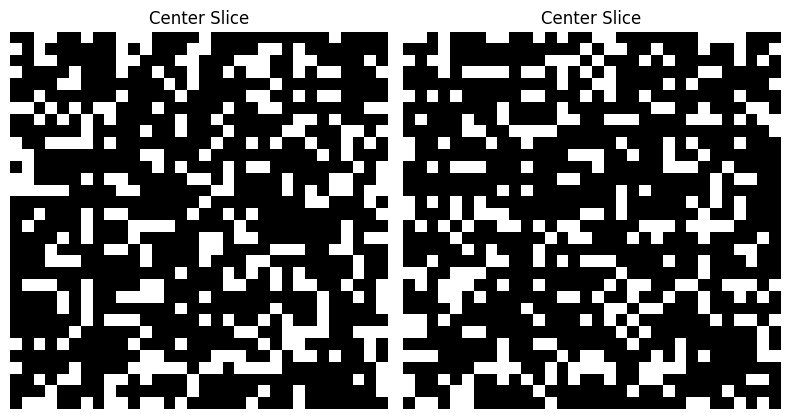

(2, 1, 32, 32, 32)


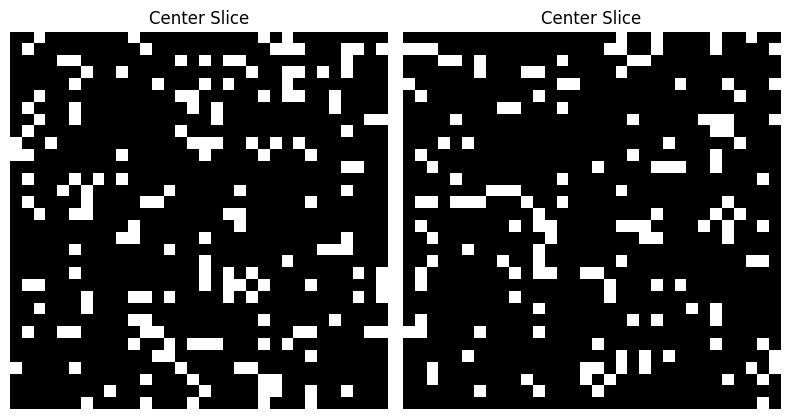

Sampling Steps:  24%|██████████████████████████▉                                                                                     | 48/200 [00:29<01:28,  1.71it/s]

timestep:759
(2, 1, 32, 32, 32)


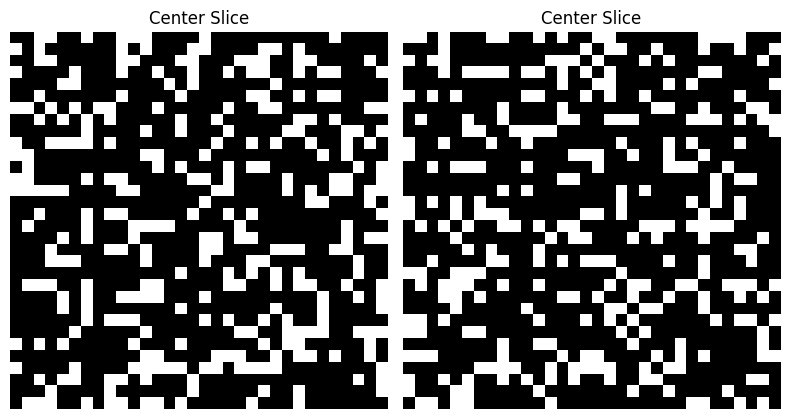

(2, 1, 32, 32, 32)


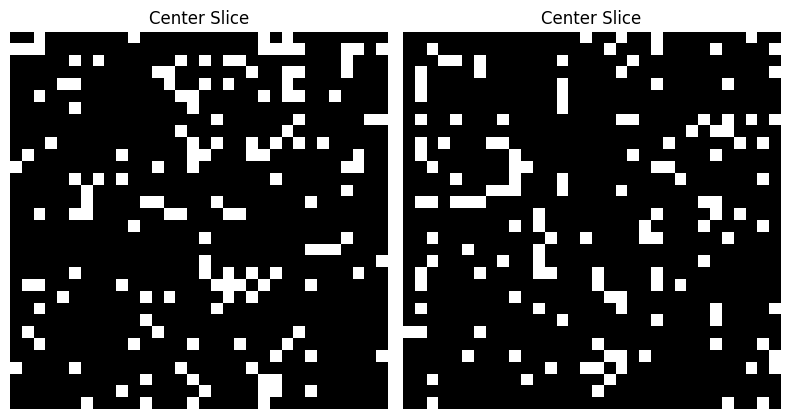

Sampling Steps:  24%|███████████████████████████▍                                                                                    | 49/200 [00:29<01:28,  1.71it/s]

timestep:754
(2, 1, 32, 32, 32)


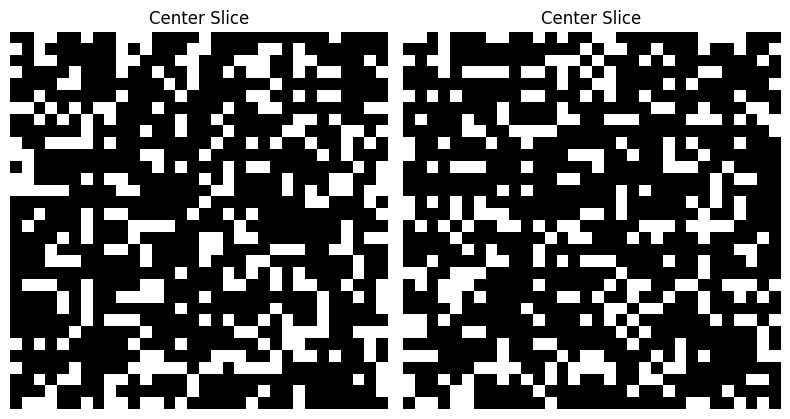

(2, 1, 32, 32, 32)


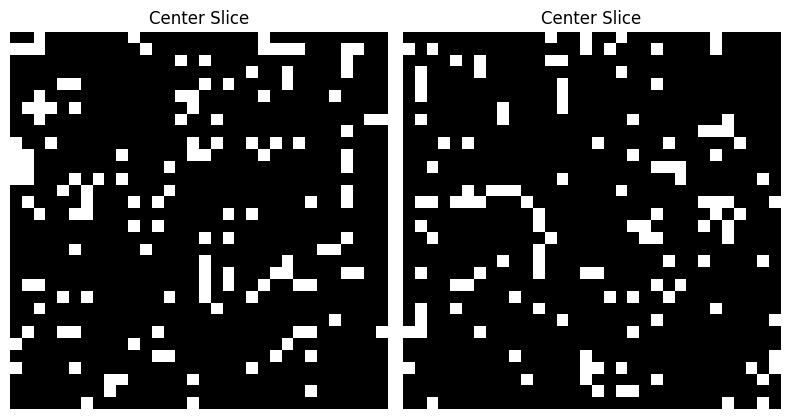

Sampling Steps:  25%|████████████████████████████                                                                                    | 50/200 [00:30<01:27,  1.71it/s]

timestep:749
(2, 1, 32, 32, 32)


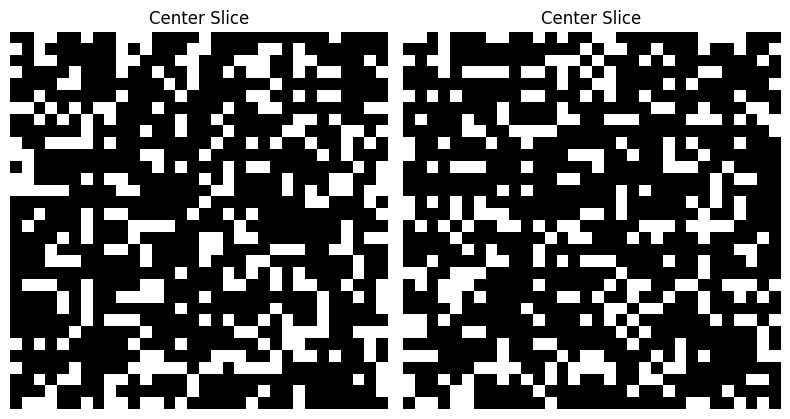

(2, 1, 32, 32, 32)


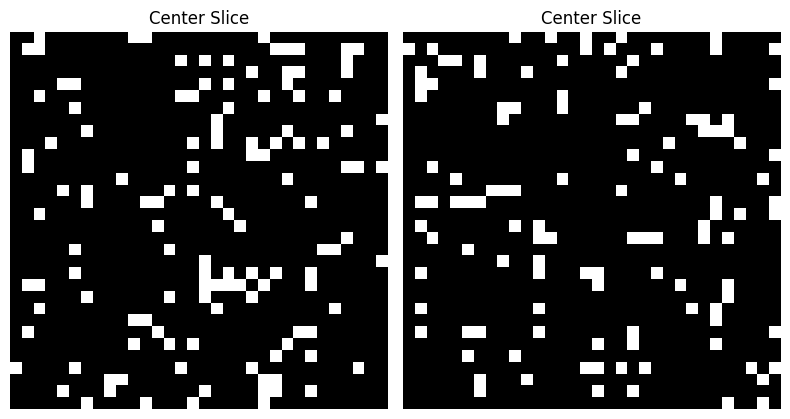

Sampling Steps:  26%|████████████████████████████▌                                                                                   | 51/200 [00:30<01:26,  1.71it/s]

timestep:744
(2, 1, 32, 32, 32)


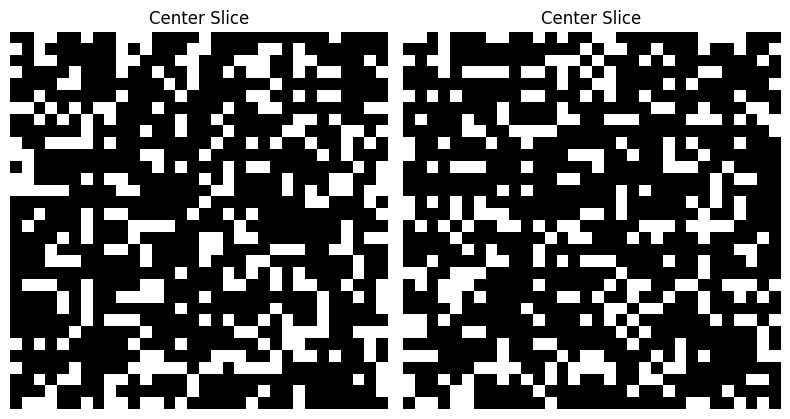

(2, 1, 32, 32, 32)


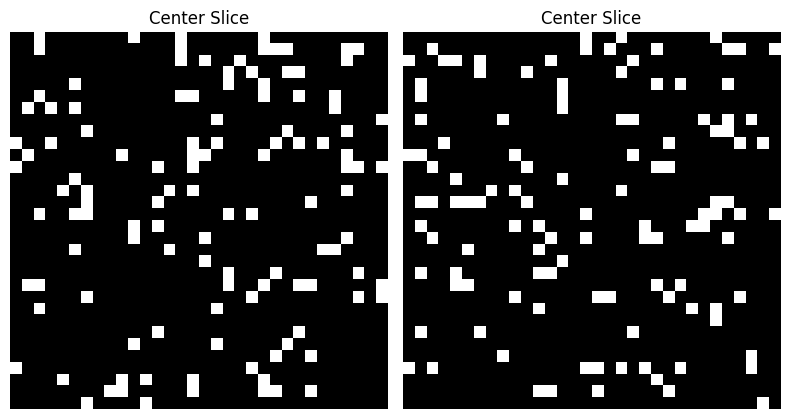

Sampling Steps:  26%|█████████████████████████████                                                                                   | 52/200 [00:31<01:26,  1.72it/s]

timestep:739
(2, 1, 32, 32, 32)


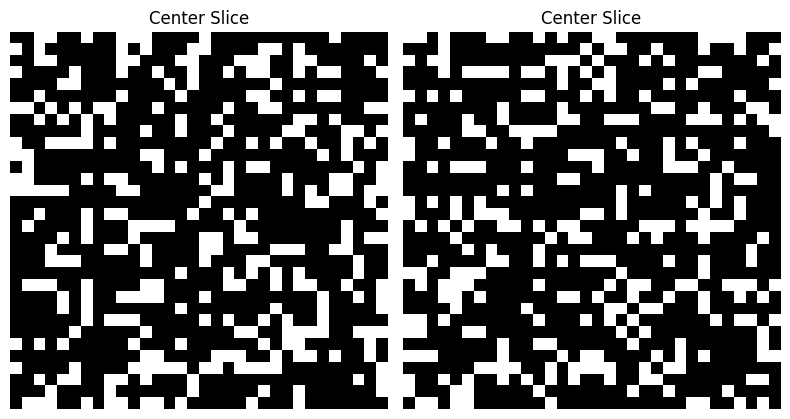

(2, 1, 32, 32, 32)


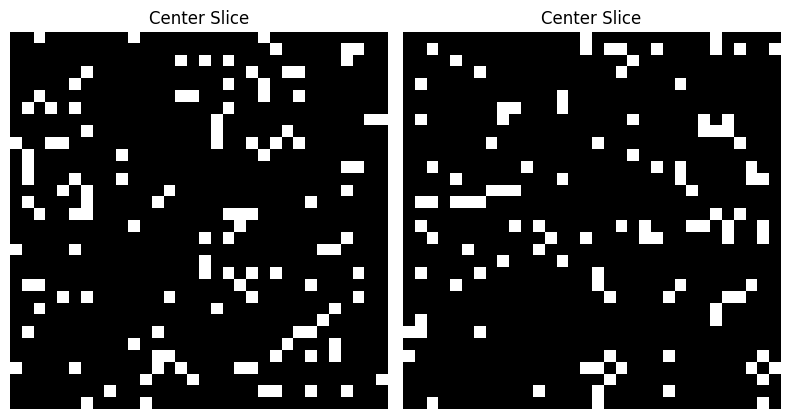

Sampling Steps:  26%|█████████████████████████████▋                                                                                  | 53/200 [00:32<01:46,  1.39it/s]

timestep:734
(2, 1, 32, 32, 32)


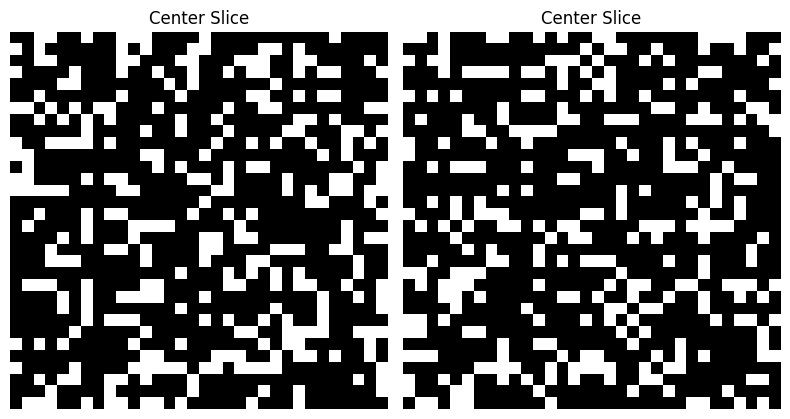

(2, 1, 32, 32, 32)


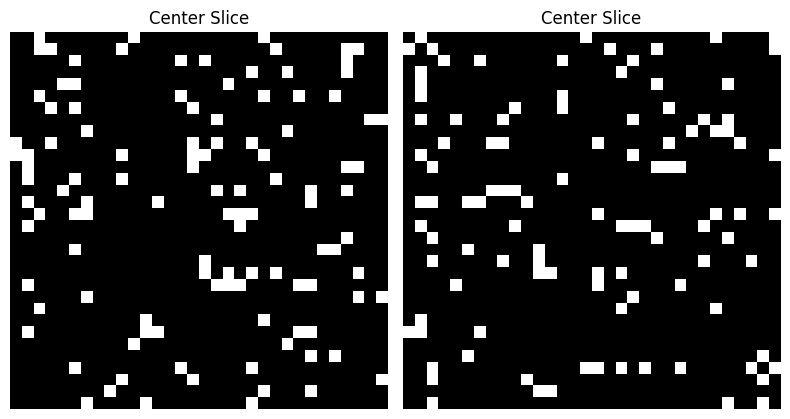

Sampling Steps:  27%|██████████████████████████████▏                                                                                 | 54/200 [00:33<01:39,  1.47it/s]

timestep:729
(2, 1, 32, 32, 32)


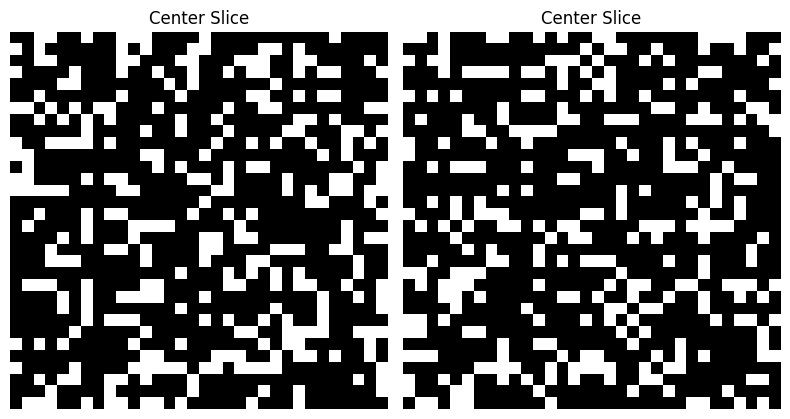

(2, 1, 32, 32, 32)


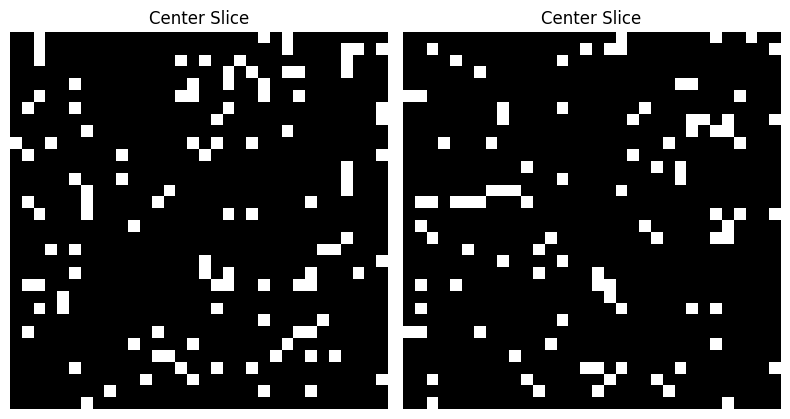

Sampling Steps:  28%|██████████████████████████████▊                                                                                 | 55/200 [00:33<01:34,  1.53it/s]

timestep:724
(2, 1, 32, 32, 32)


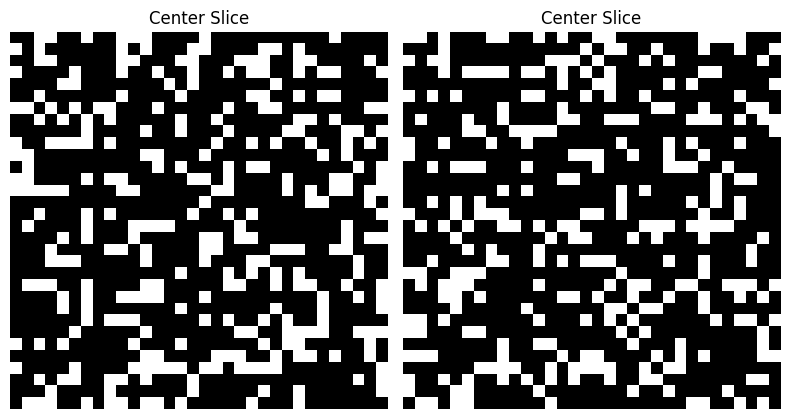

(2, 1, 32, 32, 32)


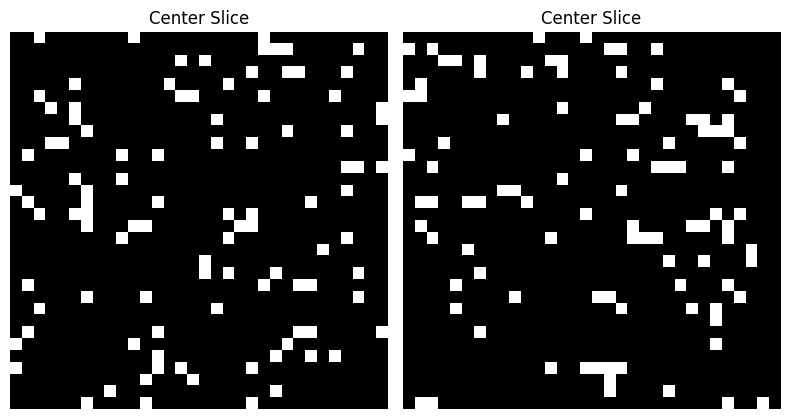

Sampling Steps:  28%|███████████████████████████████▎                                                                                | 56/200 [00:34<01:31,  1.58it/s]

timestep:719
(2, 1, 32, 32, 32)


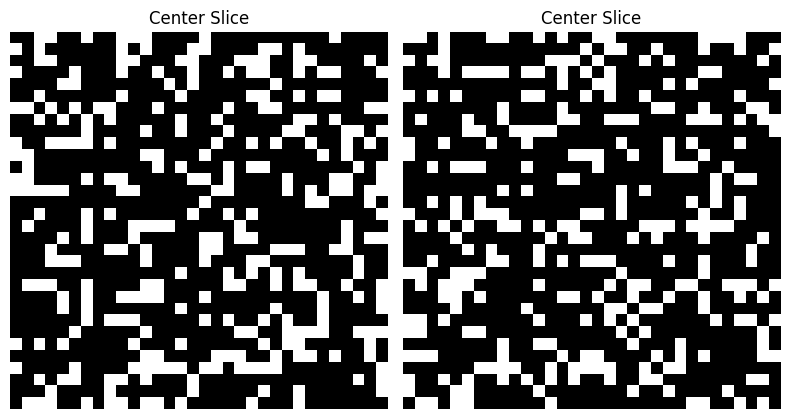

(2, 1, 32, 32, 32)


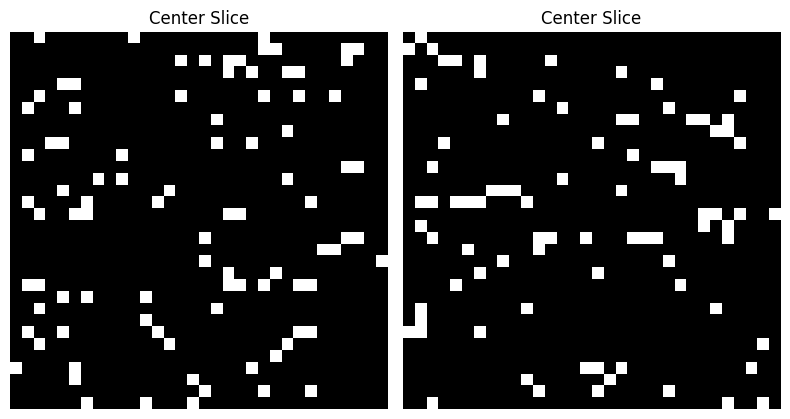

Sampling Steps:  28%|███████████████████████████████▉                                                                                | 57/200 [00:34<01:28,  1.61it/s]

timestep:714
(2, 1, 32, 32, 32)


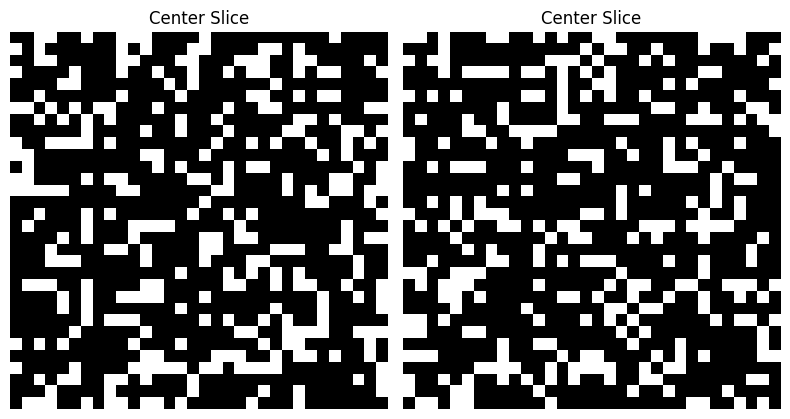

(2, 1, 32, 32, 32)


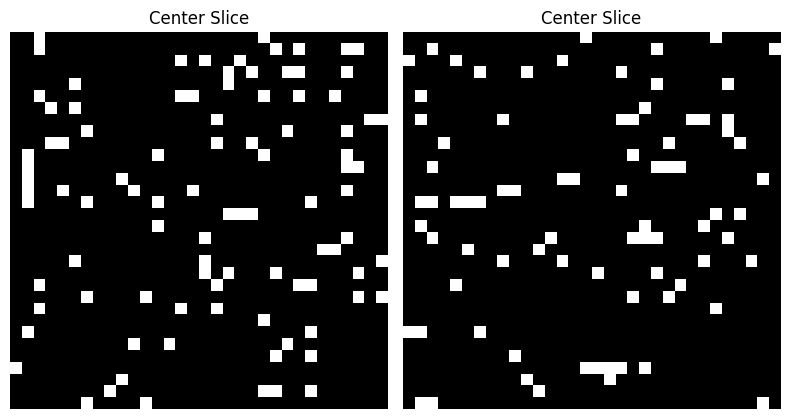

Sampling Steps:  29%|████████████████████████████████▍                                                                               | 58/200 [00:35<01:26,  1.64it/s]

timestep:709
(2, 1, 32, 32, 32)


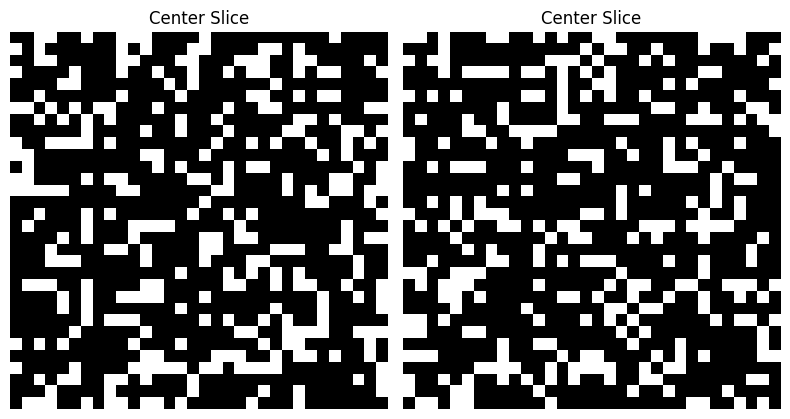

(2, 1, 32, 32, 32)


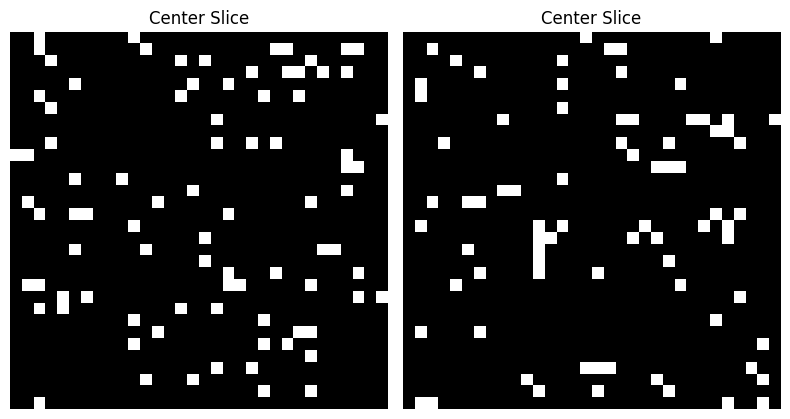

Sampling Steps:  30%|█████████████████████████████████                                                                               | 59/200 [00:36<01:24,  1.66it/s]

timestep:704
(2, 1, 32, 32, 32)


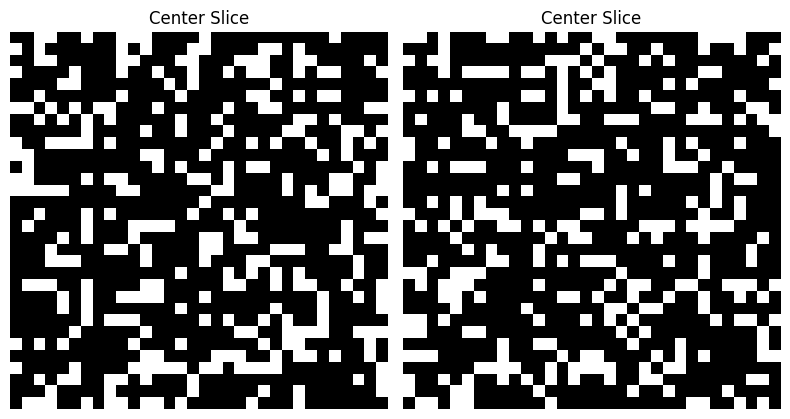

(2, 1, 32, 32, 32)


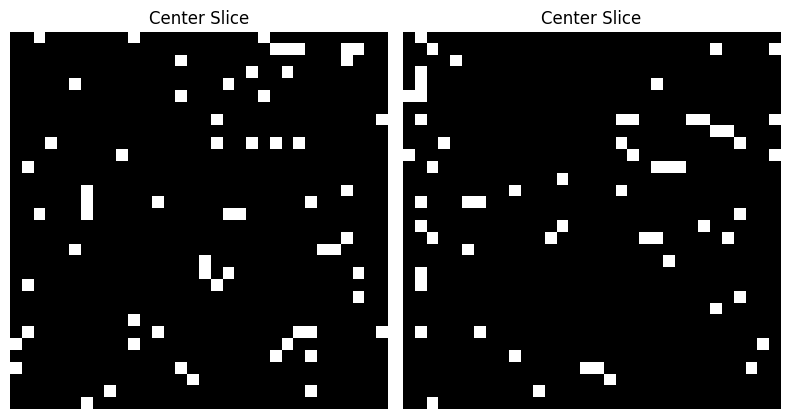

Sampling Steps:  30%|█████████████████████████████████▌                                                                              | 60/200 [00:36<01:23,  1.67it/s]

timestep:699
(2, 1, 32, 32, 32)


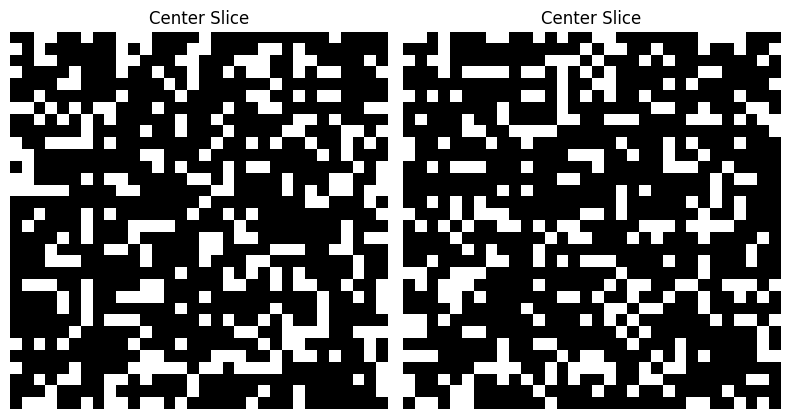

(2, 1, 32, 32, 32)


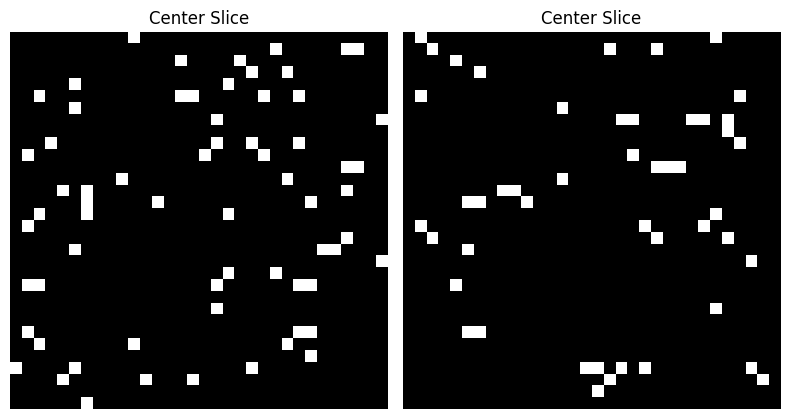

Sampling Steps:  30%|██████████████████████████████████▏                                                                             | 61/200 [00:37<01:22,  1.67it/s]

timestep:694
(2, 1, 32, 32, 32)


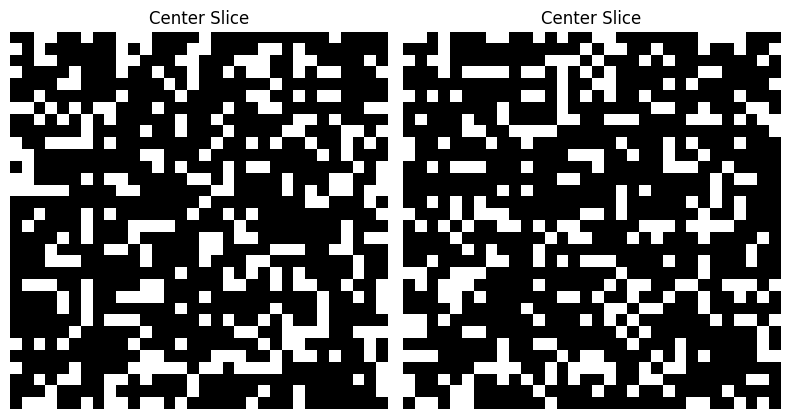

(2, 1, 32, 32, 32)


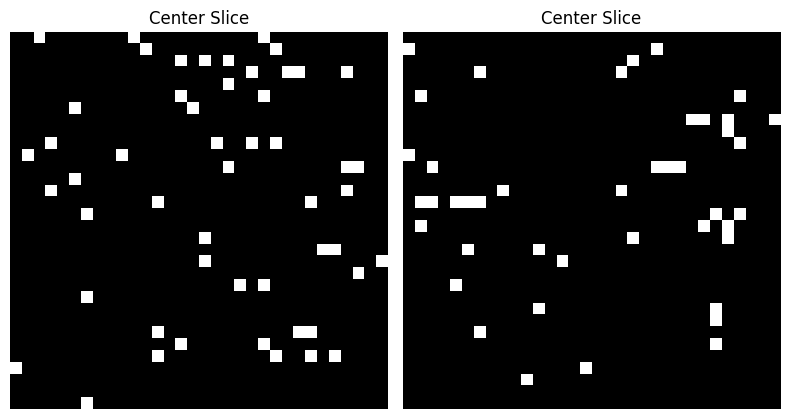

Sampling Steps:  31%|██████████████████████████████████▋                                                                             | 62/200 [00:37<01:21,  1.69it/s]

timestep:689
(2, 1, 32, 32, 32)


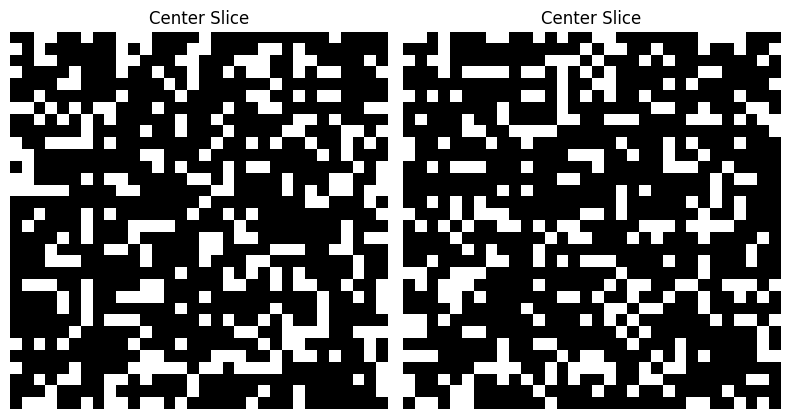

(2, 1, 32, 32, 32)


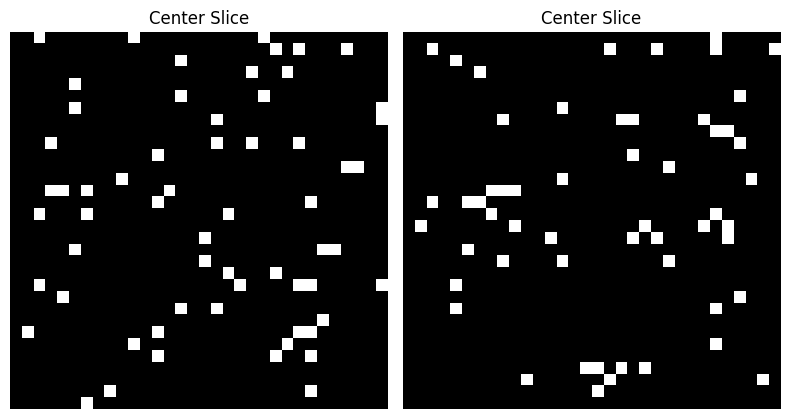

Sampling Steps:  32%|███████████████████████████████████▎                                                                            | 63/200 [00:38<01:20,  1.70it/s]

timestep:684
(2, 1, 32, 32, 32)


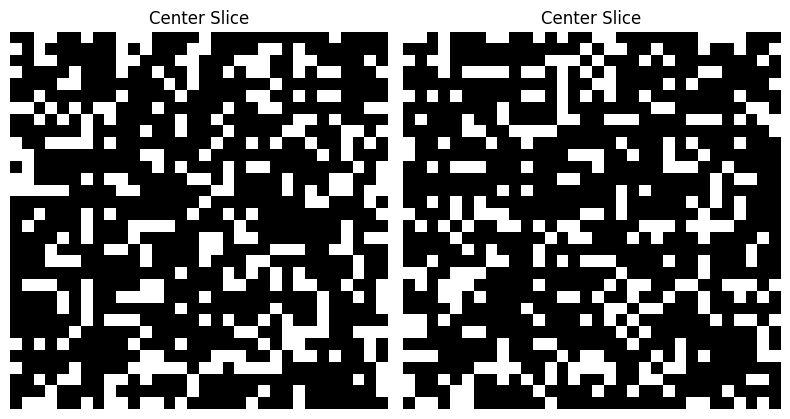

(2, 1, 32, 32, 32)


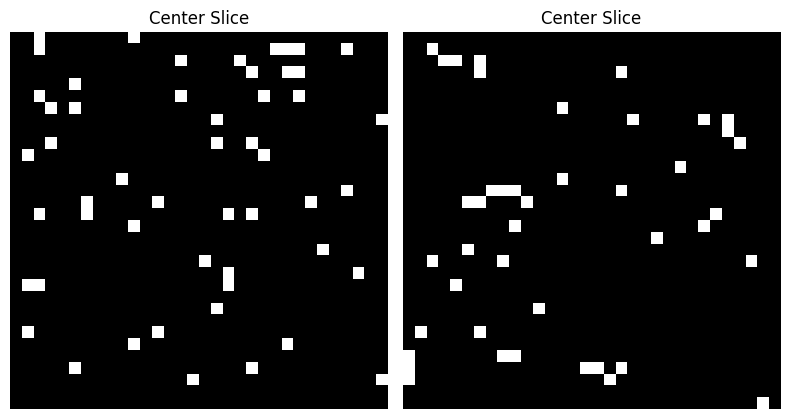

Sampling Steps:  32%|███████████████████████████████████▊                                                                            | 64/200 [00:38<01:20,  1.69it/s]

timestep:679
(2, 1, 32, 32, 32)


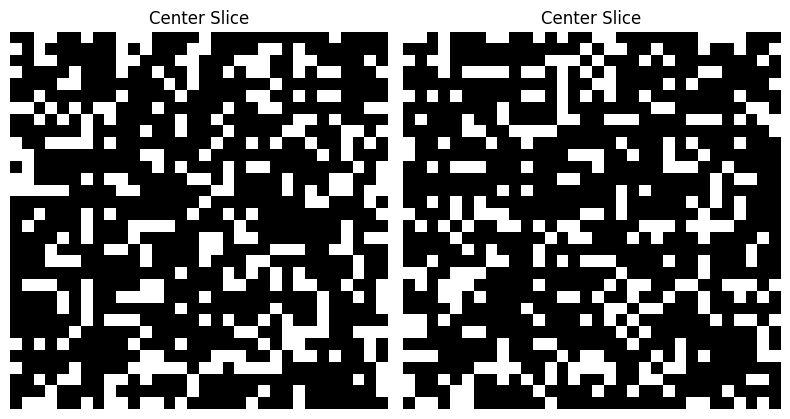

(2, 1, 32, 32, 32)


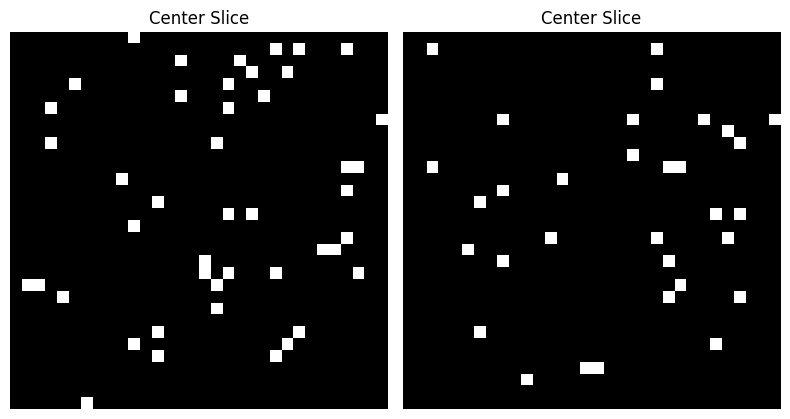

Sampling Steps:  32%|████████████████████████████████████▍                                                                           | 65/200 [00:39<01:19,  1.70it/s]

timestep:674
(2, 1, 32, 32, 32)


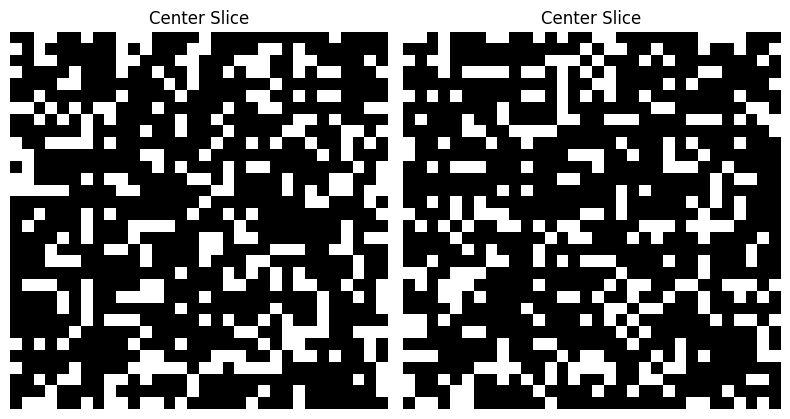

(2, 1, 32, 32, 32)


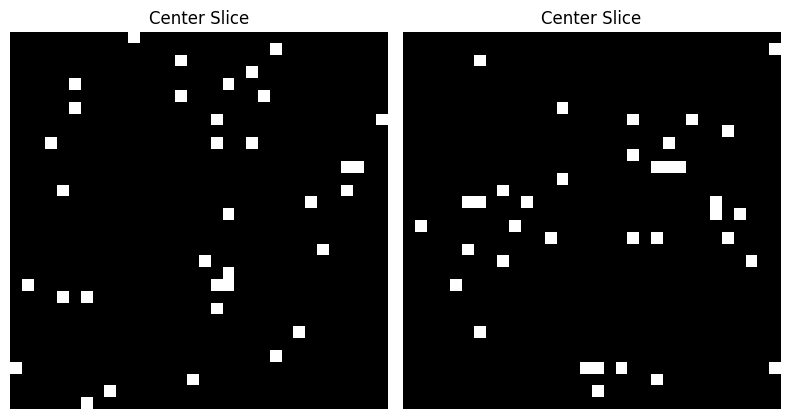

Sampling Steps:  33%|████████████████████████████████████▉                                                                           | 66/200 [00:40<01:18,  1.71it/s]

timestep:669
(2, 1, 32, 32, 32)


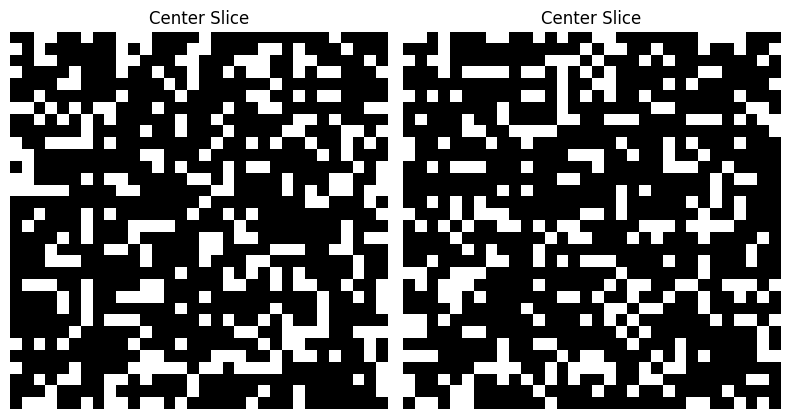

(2, 1, 32, 32, 32)


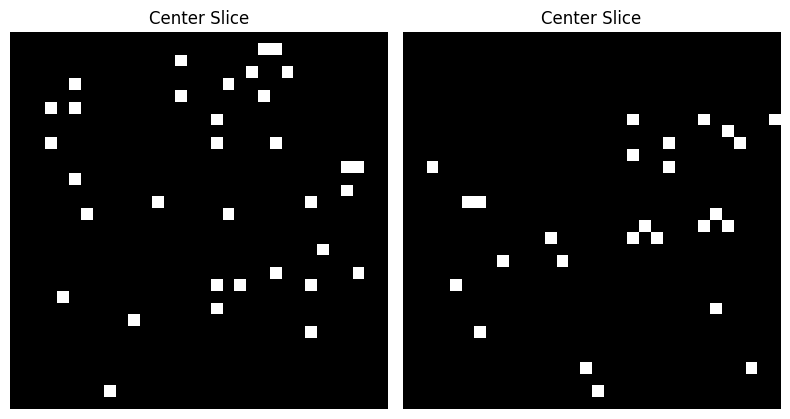

Sampling Steps:  34%|█████████████████████████████████████▌                                                                          | 67/200 [00:40<01:17,  1.71it/s]

timestep:664
(2, 1, 32, 32, 32)


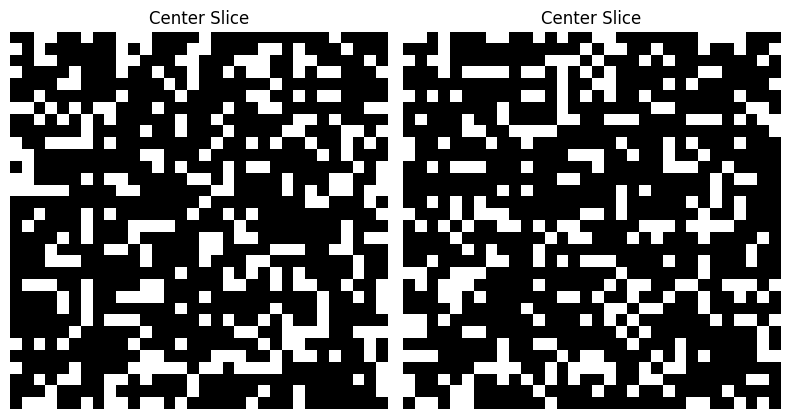

(2, 1, 32, 32, 32)


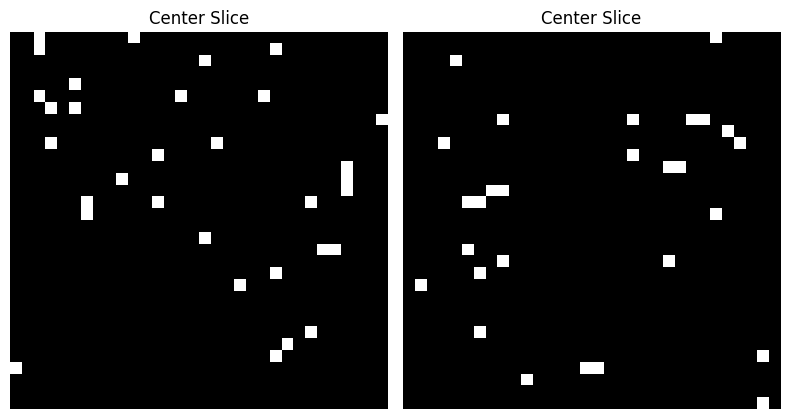

Sampling Steps:  34%|██████████████████████████████████████                                                                          | 68/200 [00:41<01:17,  1.71it/s]

timestep:659
(2, 1, 32, 32, 32)


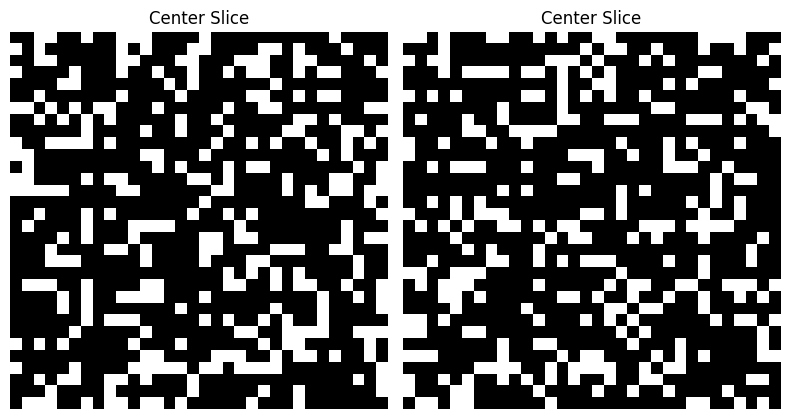

(2, 1, 32, 32, 32)


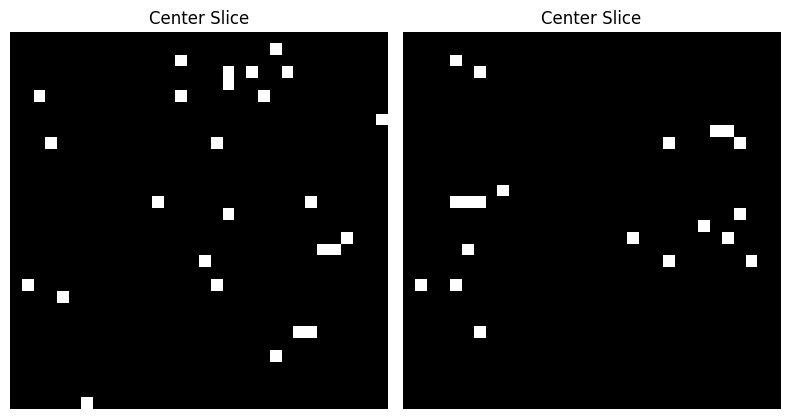

Sampling Steps:  34%|██████████████████████████████████████▋                                                                         | 69/200 [00:41<01:16,  1.71it/s]

timestep:654
(2, 1, 32, 32, 32)


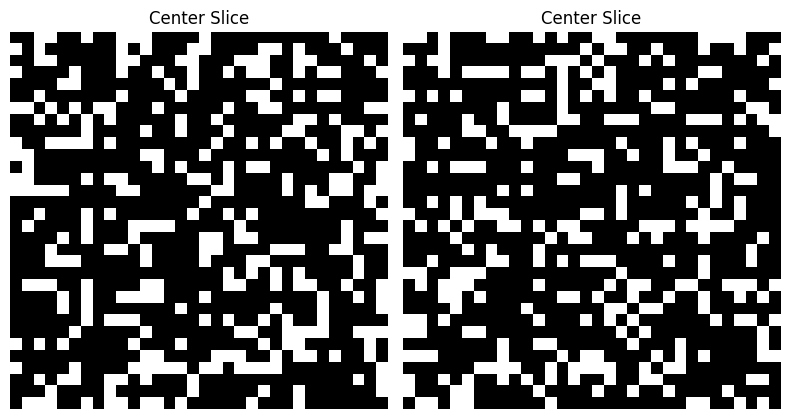

(2, 1, 32, 32, 32)


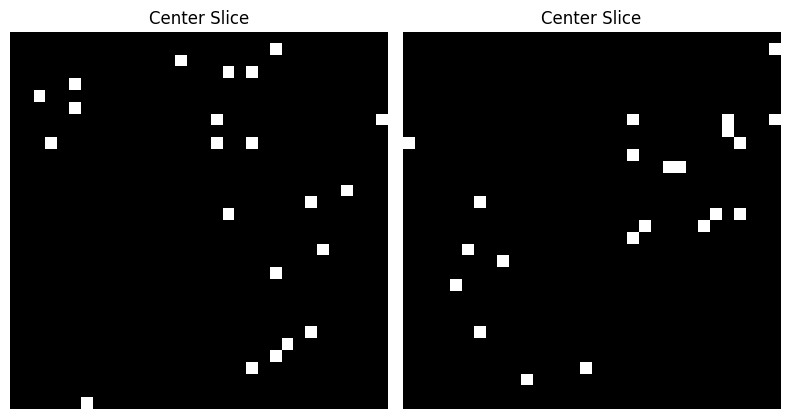

Sampling Steps:  35%|███████████████████████████████████████▏                                                                        | 70/200 [00:42<01:16,  1.69it/s]

timestep:649
(2, 1, 32, 32, 32)


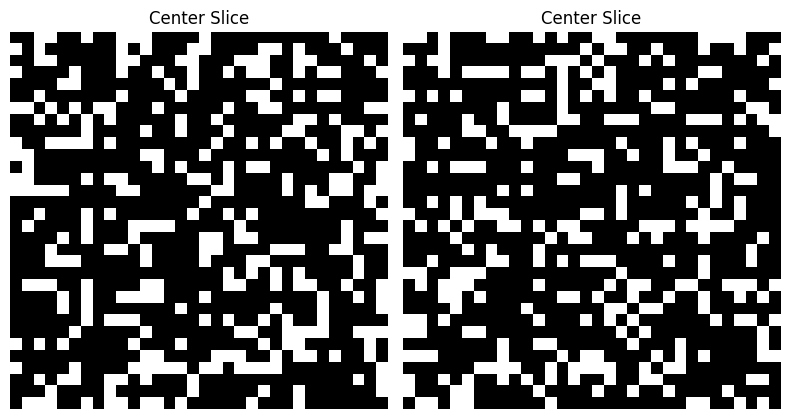

(2, 1, 32, 32, 32)


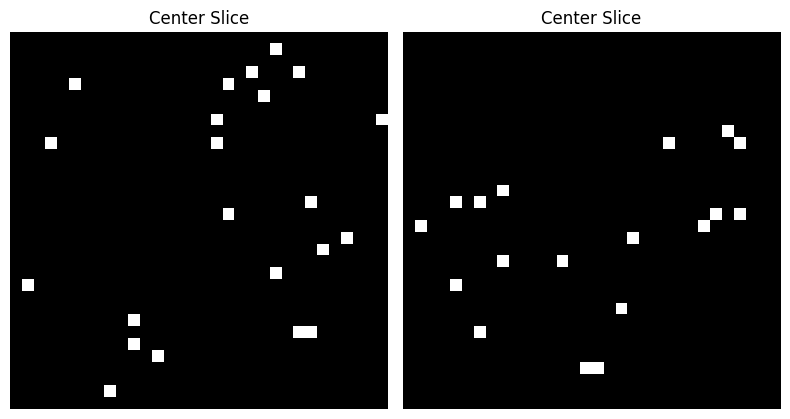

Sampling Steps:  36%|███████████████████████████████████████▊                                                                        | 71/200 [00:43<01:15,  1.70it/s]

timestep:644
(2, 1, 32, 32, 32)


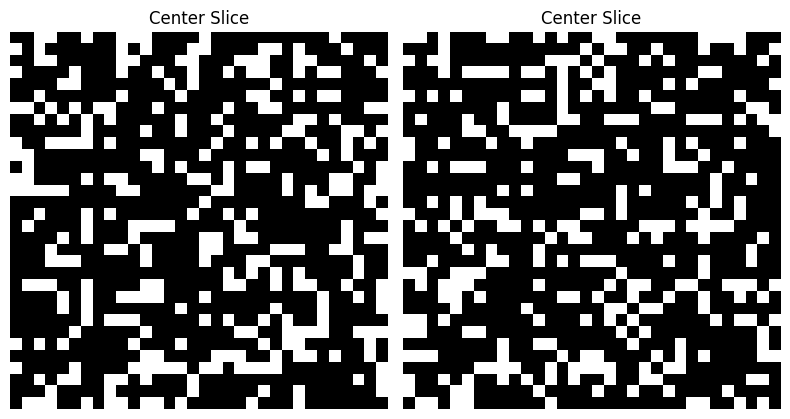

(2, 1, 32, 32, 32)


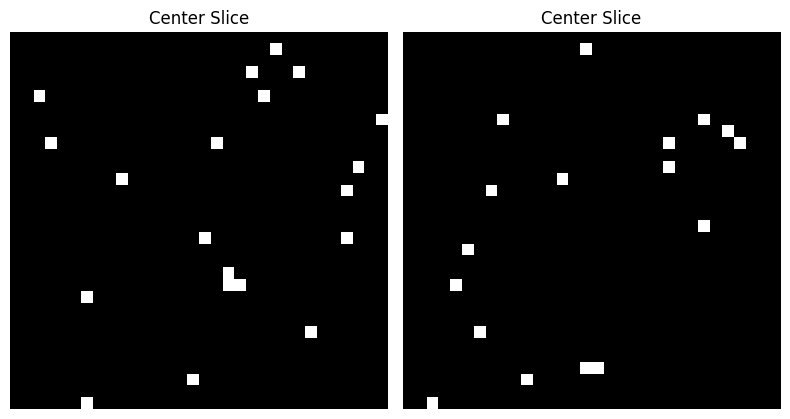

Sampling Steps:  36%|████████████████████████████████████████▎                                                                       | 72/200 [00:43<01:15,  1.70it/s]

timestep:639
(2, 1, 32, 32, 32)


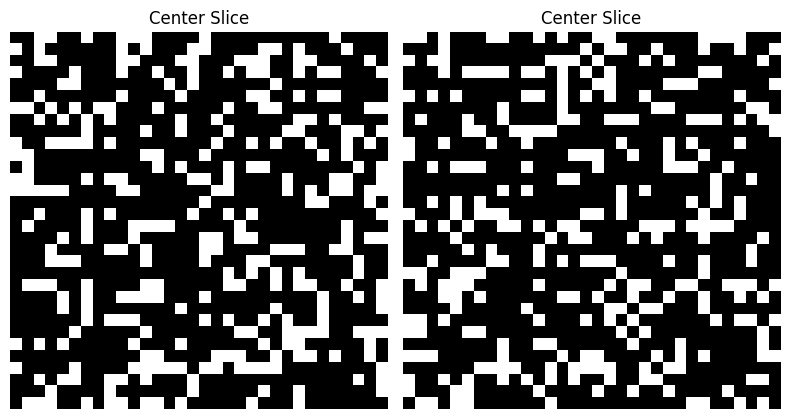

(2, 1, 32, 32, 32)


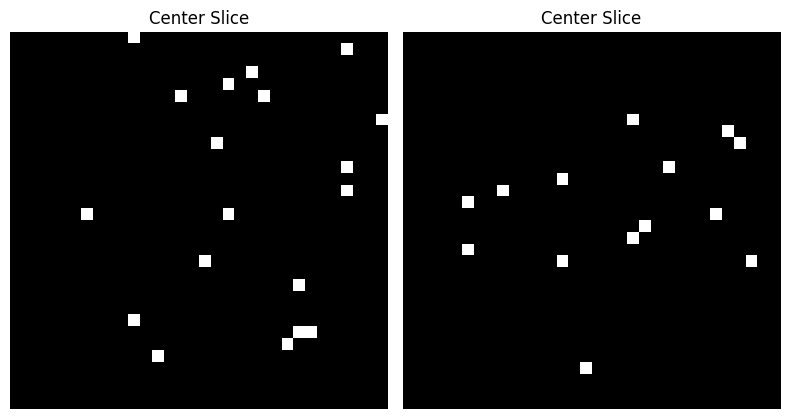

Sampling Steps:  36%|████████████████████████████████████████▉                                                                       | 73/200 [00:44<01:14,  1.70it/s]

timestep:634
(2, 1, 32, 32, 32)


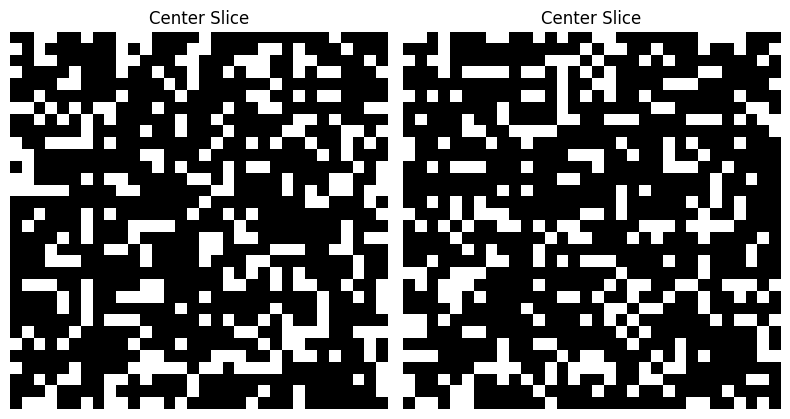

(2, 1, 32, 32, 32)


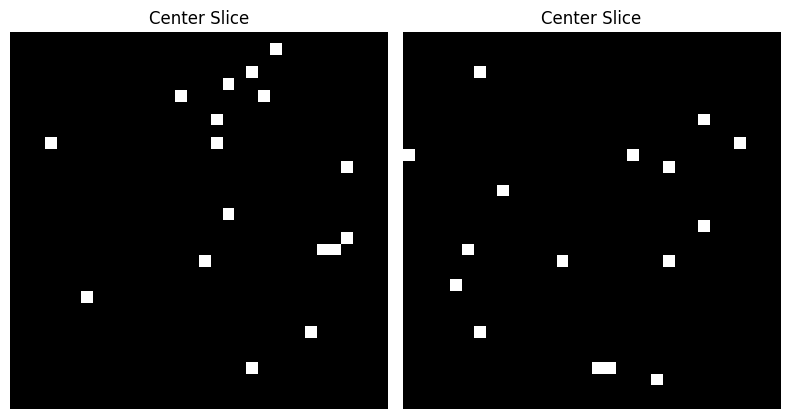

Sampling Steps:  37%|█████████████████████████████████████████▍                                                                      | 74/200 [00:44<01:15,  1.68it/s]

timestep:629
(2, 1, 32, 32, 32)


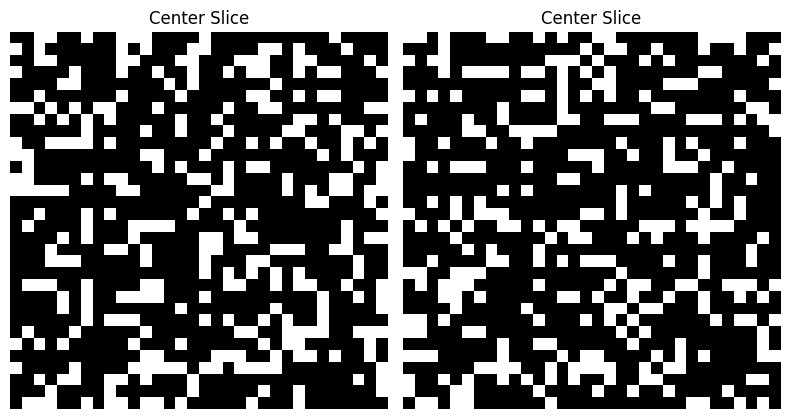

(2, 1, 32, 32, 32)


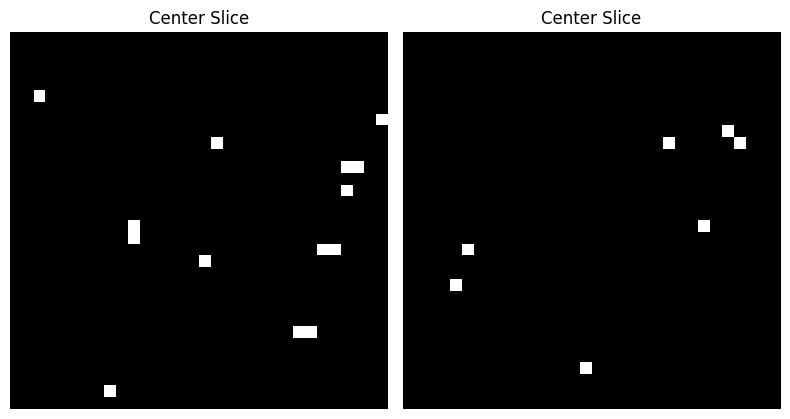

Sampling Steps:  38%|██████████████████████████████████████████                                                                      | 75/200 [00:45<01:13,  1.69it/s]

timestep:624
(2, 1, 32, 32, 32)


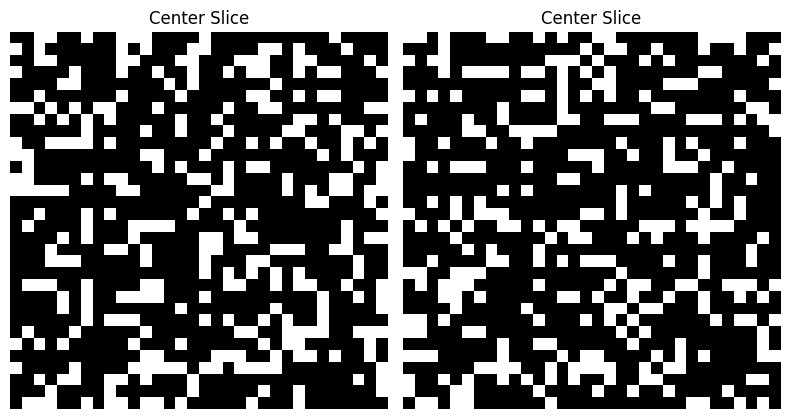

(2, 1, 32, 32, 32)


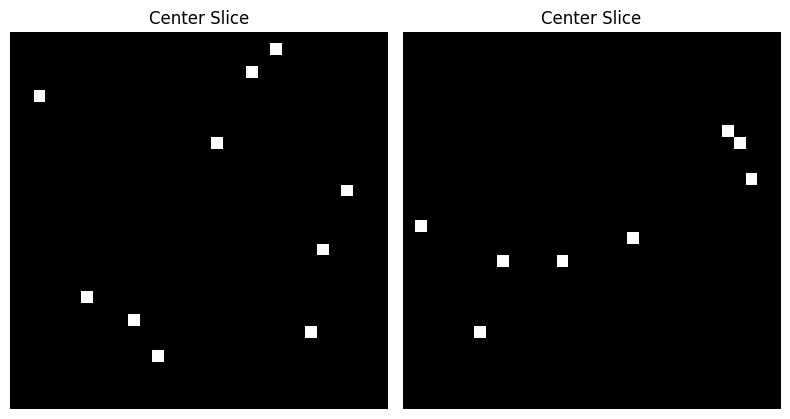

Sampling Steps:  38%|██████████████████████████████████████████▌                                                                     | 76/200 [00:46<01:13,  1.70it/s]

timestep:619
(2, 1, 32, 32, 32)


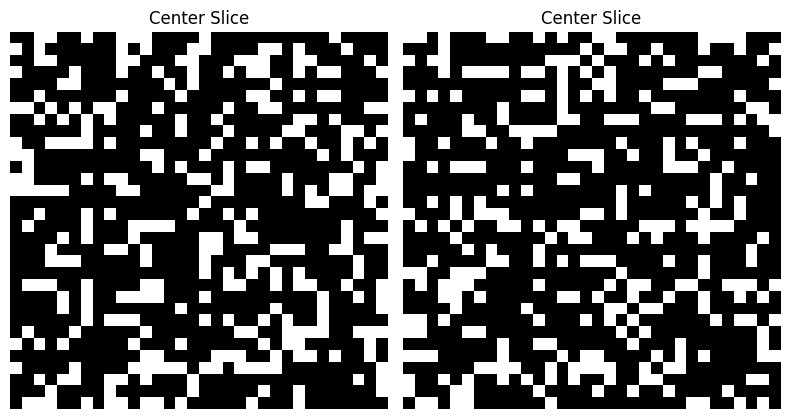

(2, 1, 32, 32, 32)


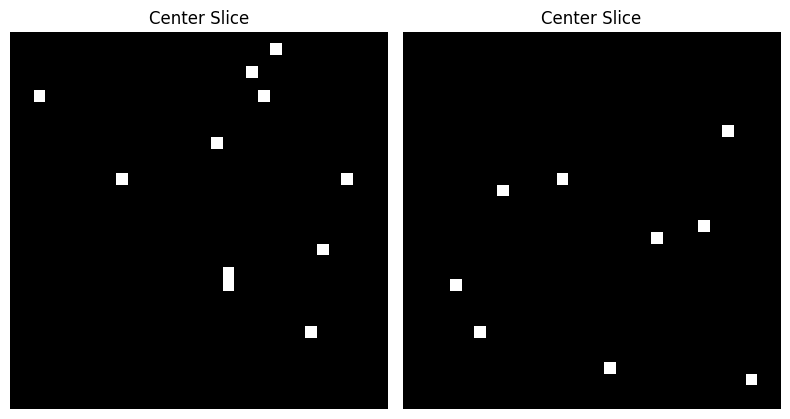

Sampling Steps:  38%|███████████████████████████████████████████                                                                     | 77/200 [00:46<01:12,  1.70it/s]

timestep:614
(2, 1, 32, 32, 32)


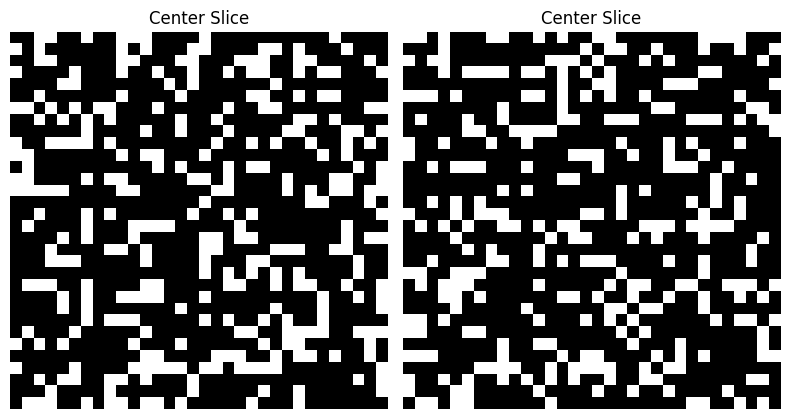

(2, 1, 32, 32, 32)


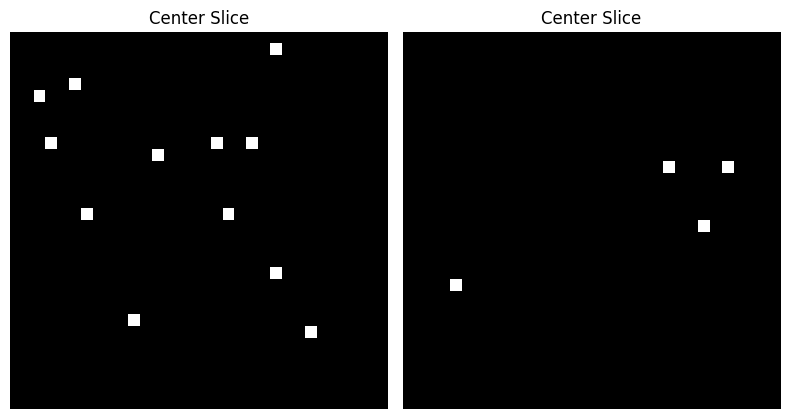

Sampling Steps:  39%|███████████████████████████████████████████▋                                                                    | 78/200 [00:47<01:11,  1.71it/s]

timestep:609
(2, 1, 32, 32, 32)


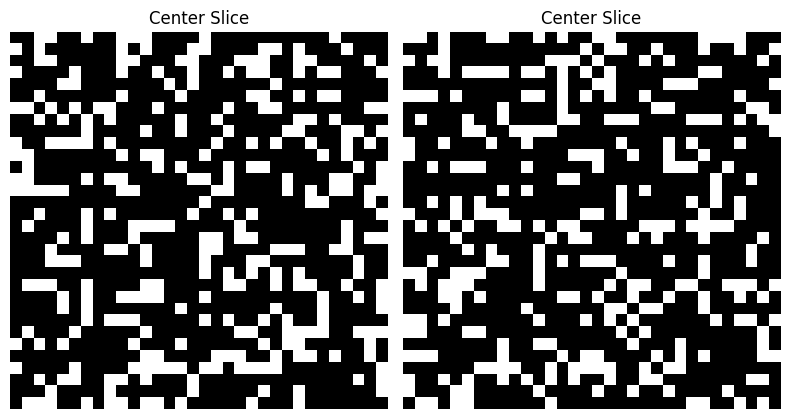

(2, 1, 32, 32, 32)


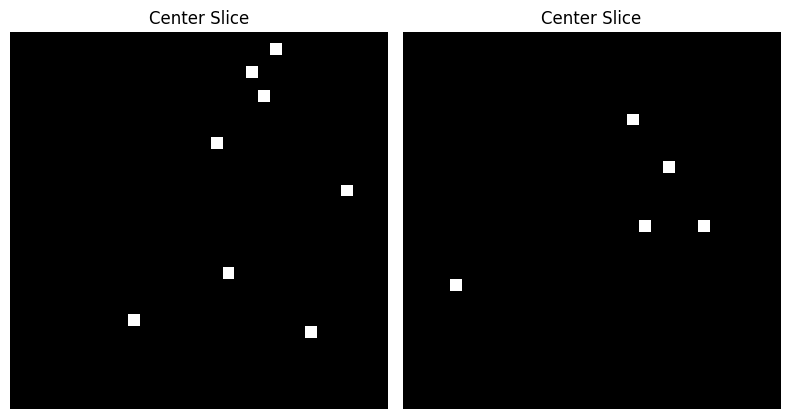

Sampling Steps:  40%|████████████████████████████████████████████▏                                                                   | 79/200 [00:47<01:10,  1.71it/s]

timestep:604
(2, 1, 32, 32, 32)


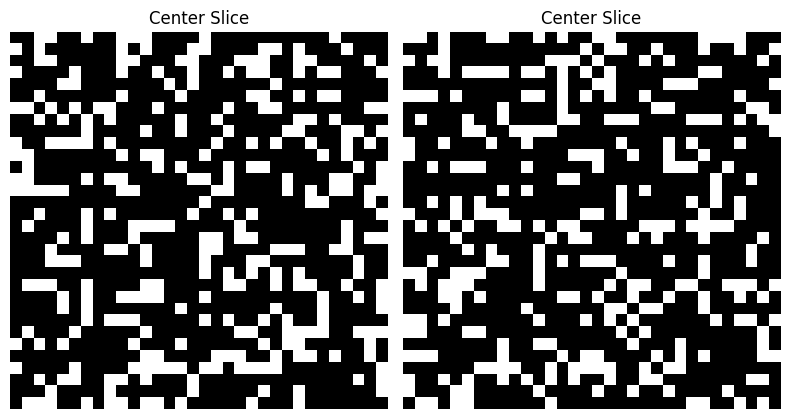

(2, 1, 32, 32, 32)


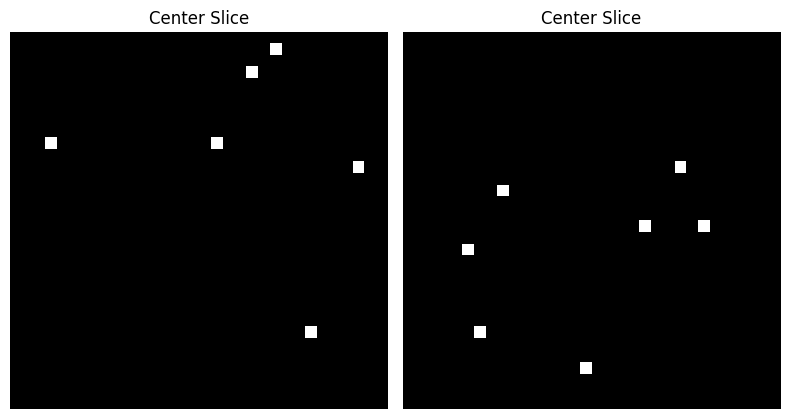

Sampling Steps:  40%|████████████████████████████████████████████▊                                                                   | 80/200 [00:48<01:27,  1.37it/s]

timestep:599
(2, 1, 32, 32, 32)


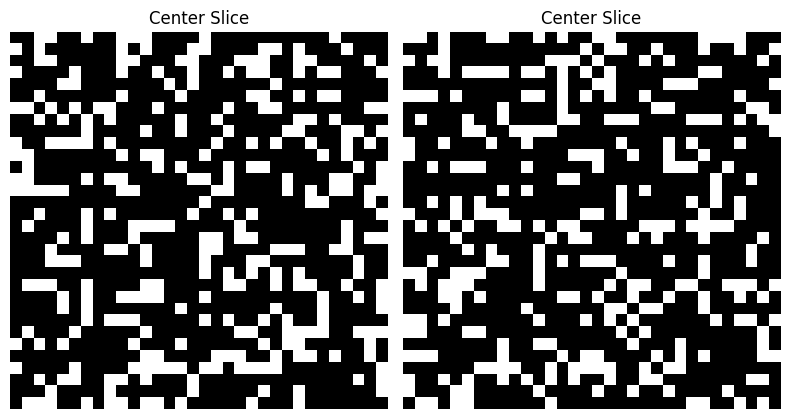

(2, 1, 32, 32, 32)


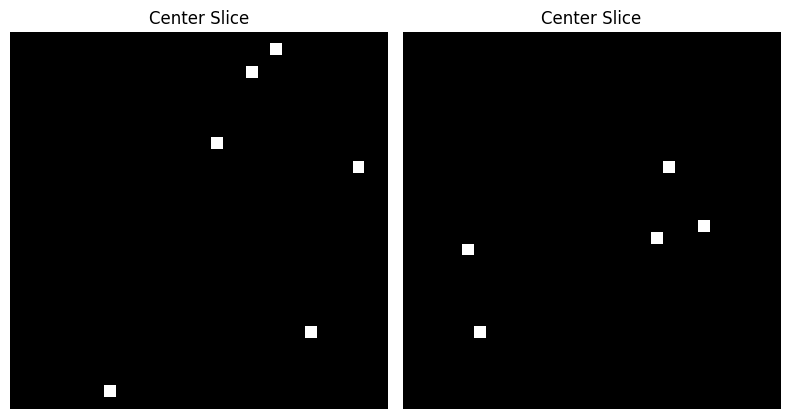

Sampling Steps:  40%|█████████████████████████████████████████████▎                                                                  | 81/200 [00:49<01:21,  1.46it/s]

timestep:594
(2, 1, 32, 32, 32)


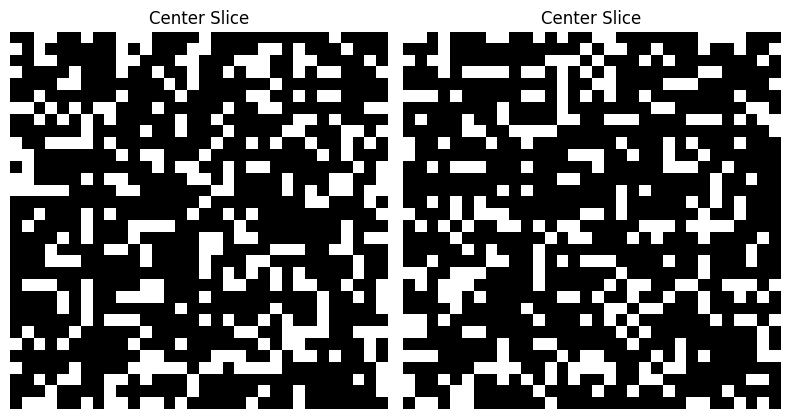

(2, 1, 32, 32, 32)


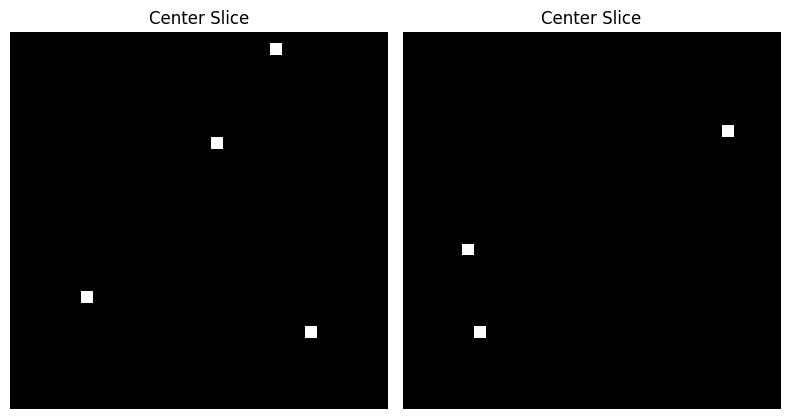

Sampling Steps:  41%|█████████████████████████████████████████████▉                                                                  | 82/200 [00:49<01:17,  1.52it/s]

timestep:589
(2, 1, 32, 32, 32)


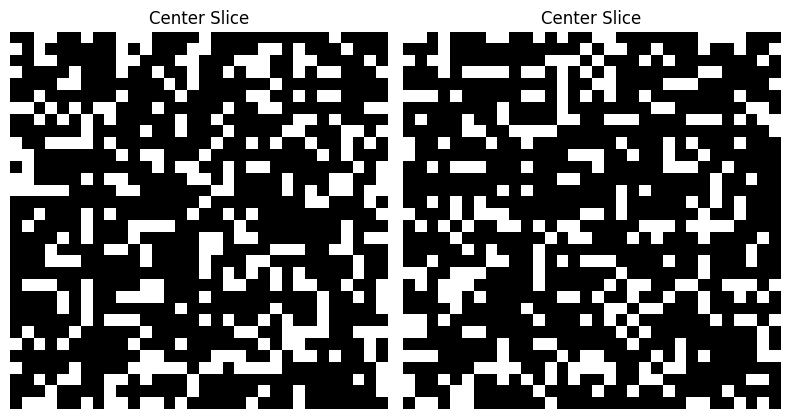

(2, 1, 32, 32, 32)


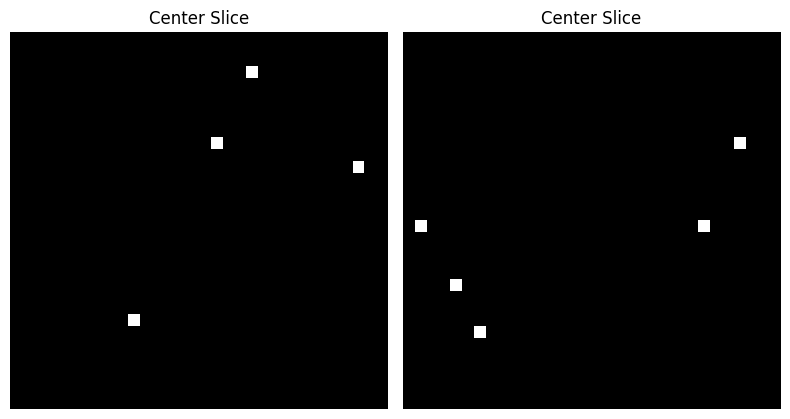

Sampling Steps:  42%|██████████████████████████████████████████████▍                                                                 | 83/200 [00:50<01:14,  1.57it/s]

timestep:584
(2, 1, 32, 32, 32)


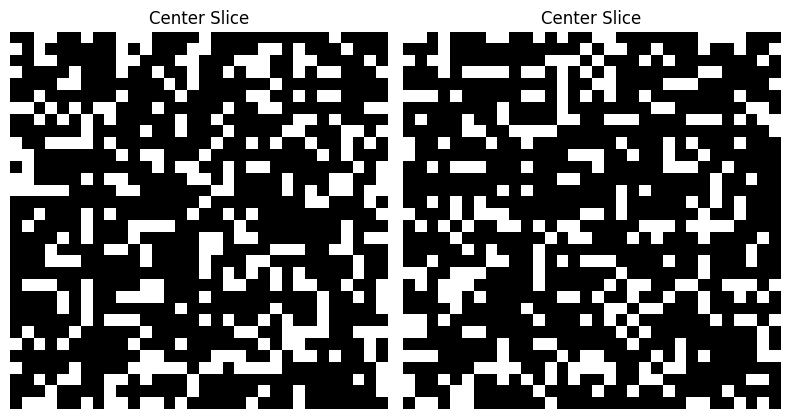

(2, 1, 32, 32, 32)


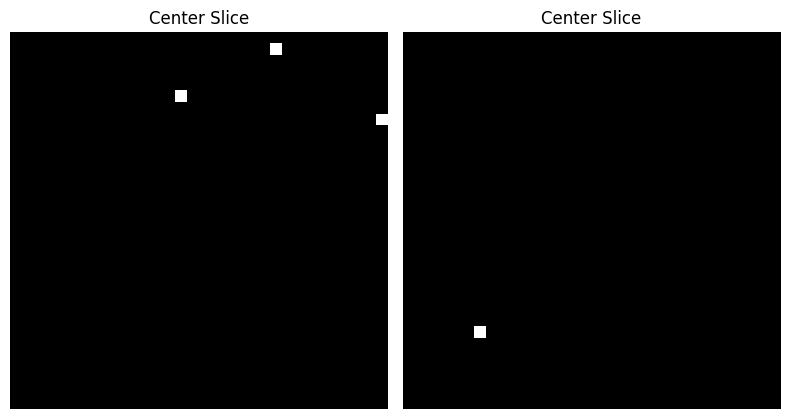

Sampling Steps:  42%|███████████████████████████████████████████████                                                                 | 84/200 [00:51<01:12,  1.60it/s]

timestep:579
(2, 1, 32, 32, 32)


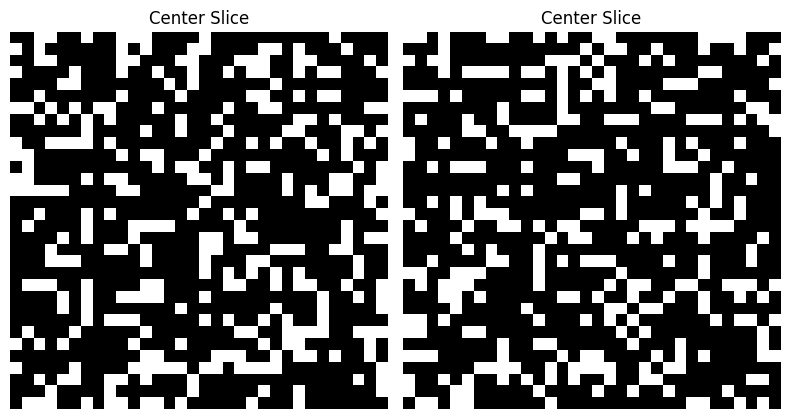

(2, 1, 32, 32, 32)


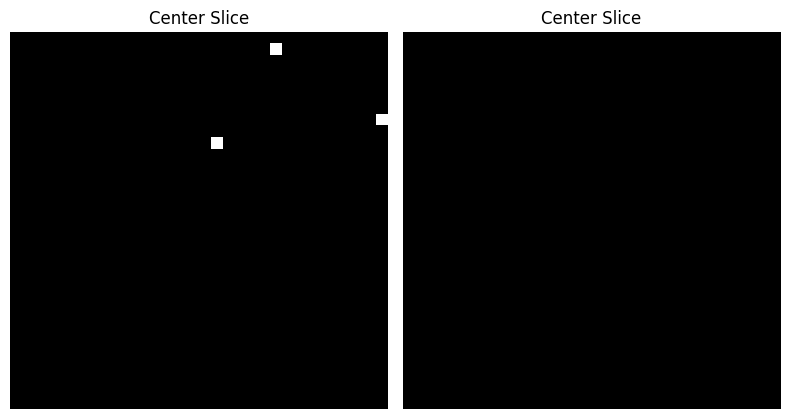

Sampling Steps:  42%|███████████████████████████████████████████████▌                                                                | 85/200 [00:51<01:10,  1.62it/s]

timestep:574
(2, 1, 32, 32, 32)


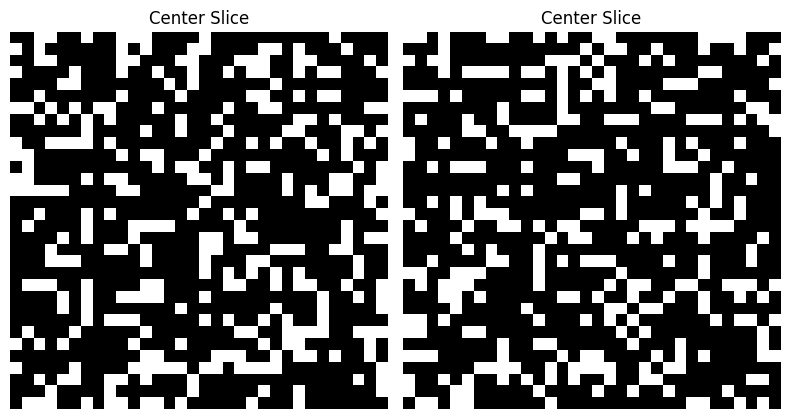

(2, 1, 32, 32, 32)


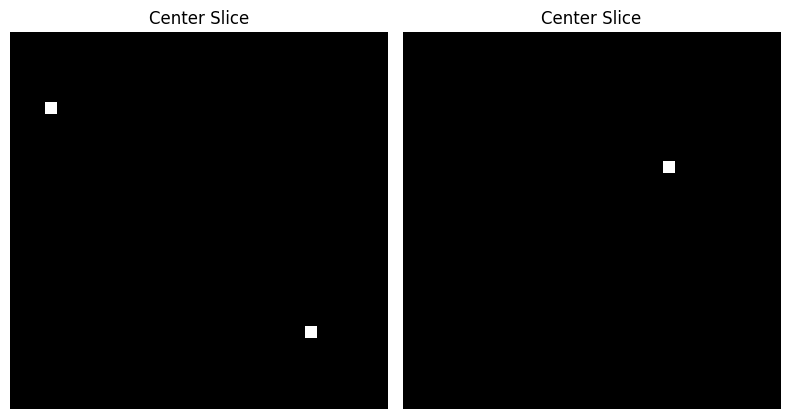

Sampling Steps:  43%|████████████████████████████████████████████████▏                                                               | 86/200 [00:52<01:09,  1.63it/s]

timestep:569
(2, 1, 32, 32, 32)


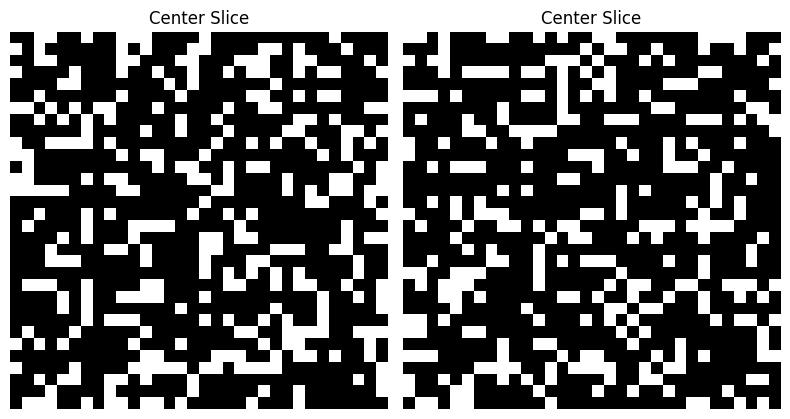

(2, 1, 32, 32, 32)


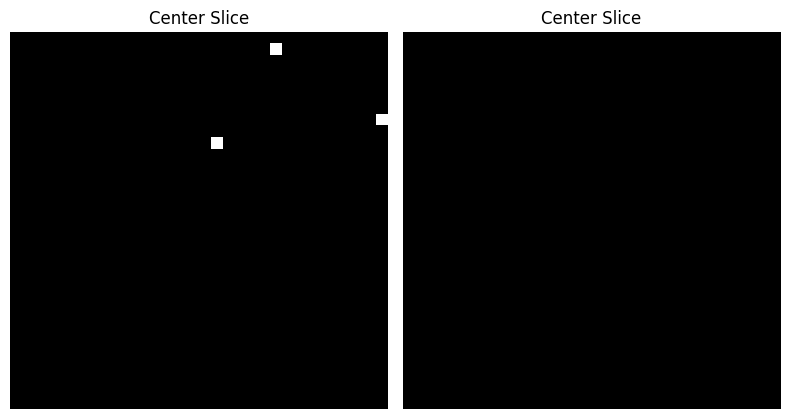

Sampling Steps:  44%|████████████████████████████████████████████████▋                                                               | 87/200 [00:52<01:08,  1.64it/s]

timestep:564
(2, 1, 32, 32, 32)


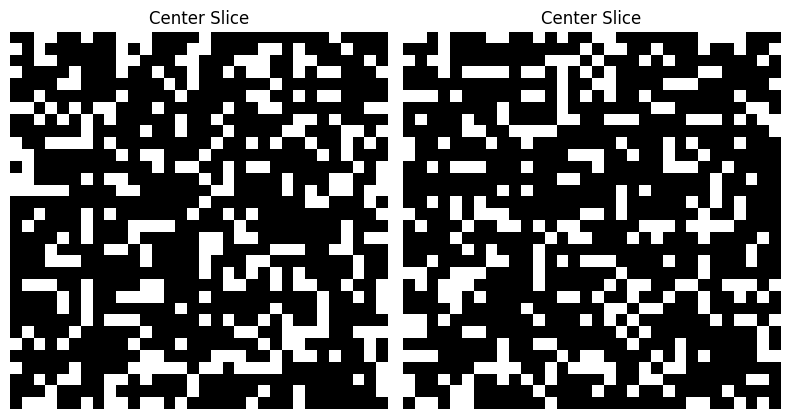

(2, 1, 32, 32, 32)


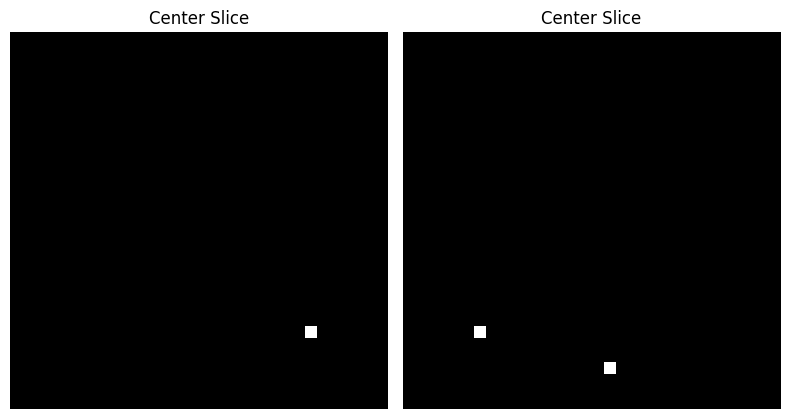

Sampling Steps:  44%|█████████████████████████████████████████████████▎                                                              | 88/200 [00:53<01:07,  1.65it/s]

timestep:559
(2, 1, 32, 32, 32)


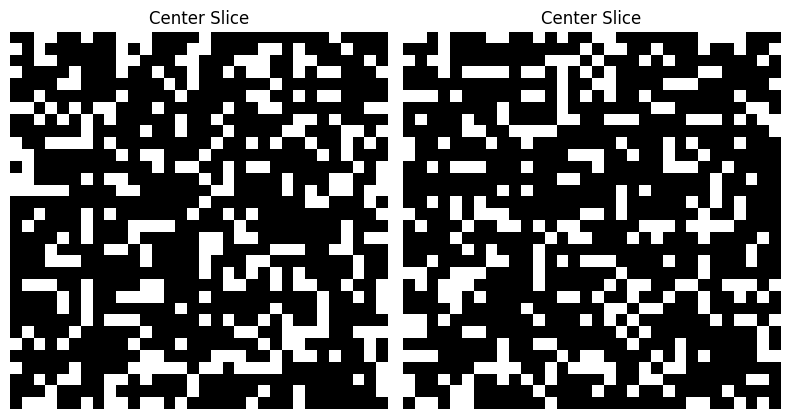

(2, 1, 32, 32, 32)


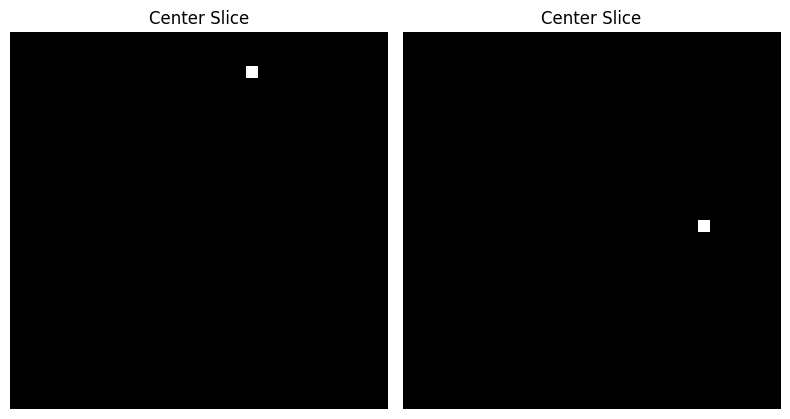

Sampling Steps:  44%|█████████████████████████████████████████████████▊                                                              | 89/200 [00:54<01:06,  1.67it/s]

timestep:554
(2, 1, 32, 32, 32)


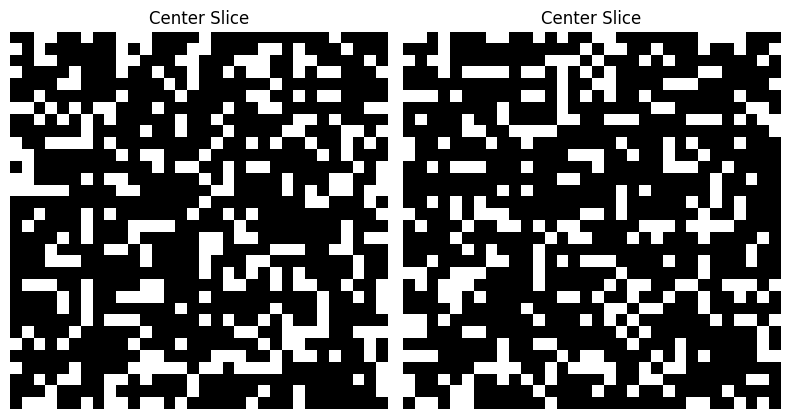

(2, 1, 32, 32, 32)


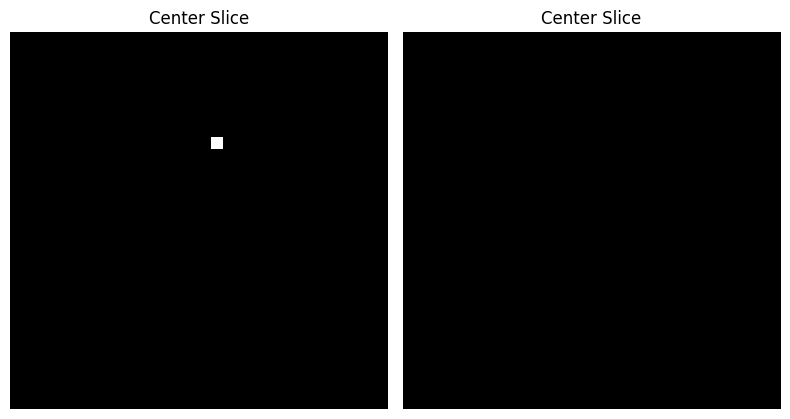

Sampling Steps:  45%|██████████████████████████████████████████████████▍                                                             | 90/200 [00:54<01:05,  1.68it/s]

timestep:549
(2, 1, 32, 32, 32)


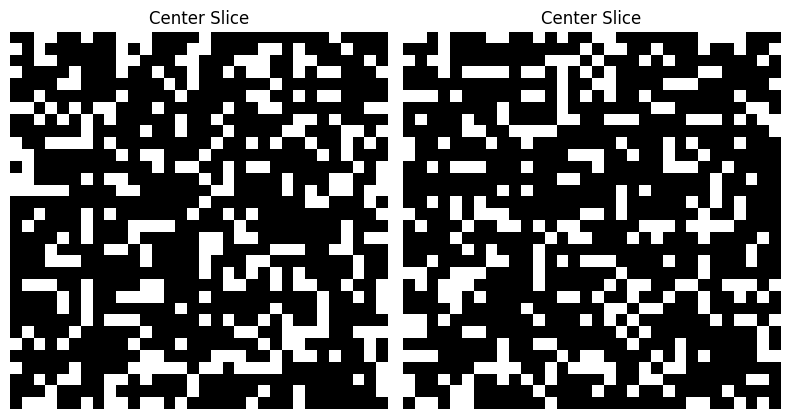

(2, 1, 32, 32, 32)


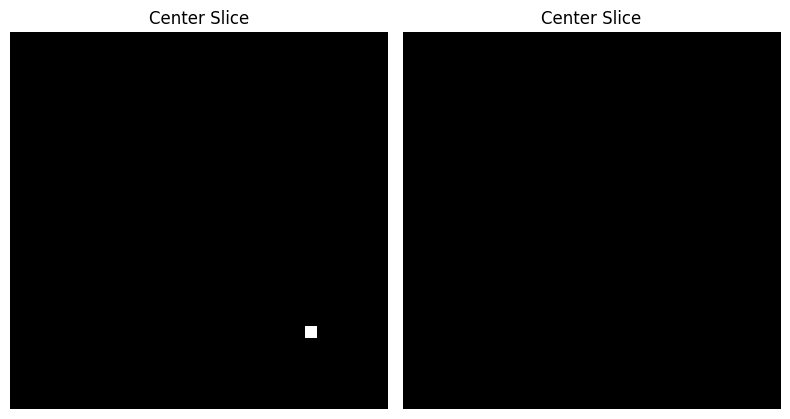

Sampling Steps:  46%|██████████████████████████████████████████████████▉                                                             | 91/200 [00:55<01:04,  1.69it/s]

timestep:544
(2, 1, 32, 32, 32)


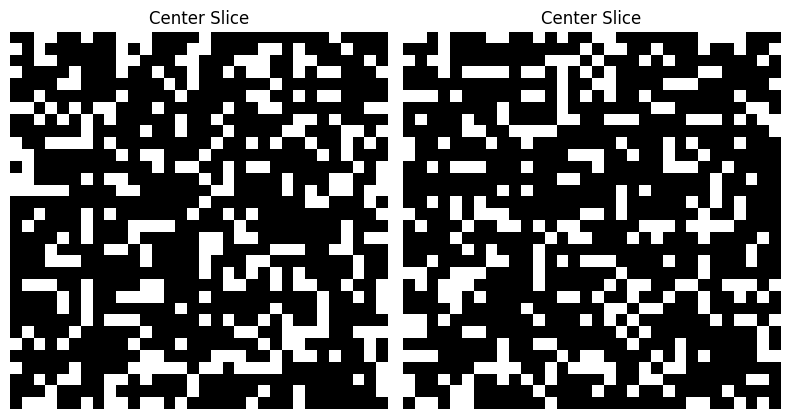

(2, 1, 32, 32, 32)


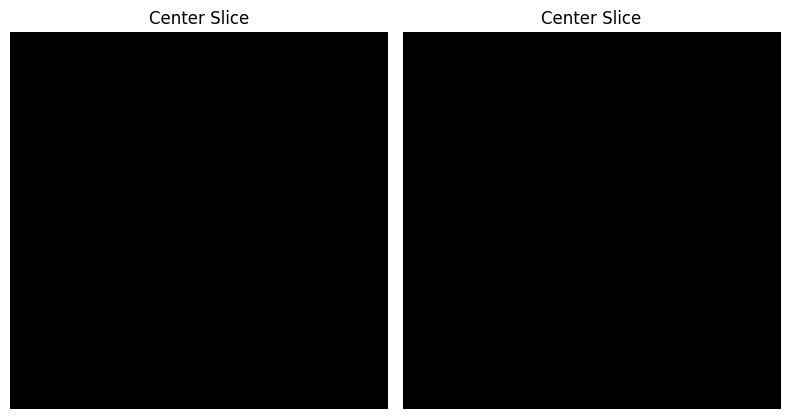

Sampling Steps:  46%|███████████████████████████████████████████████████▌                                                            | 92/200 [00:55<01:03,  1.70it/s]

timestep:539
(2, 1, 32, 32, 32)


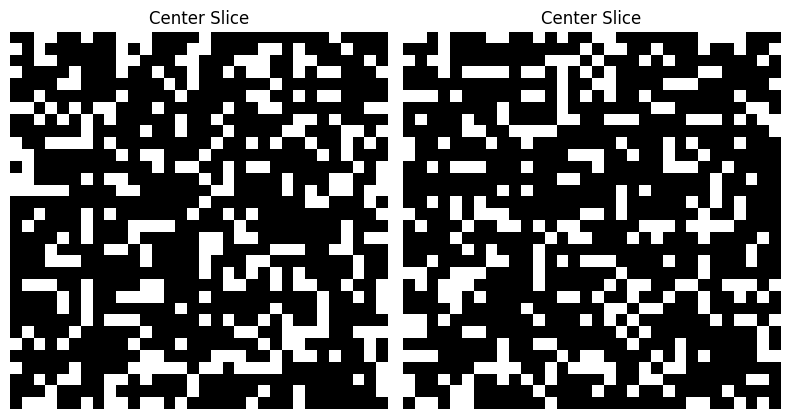

(2, 1, 32, 32, 32)


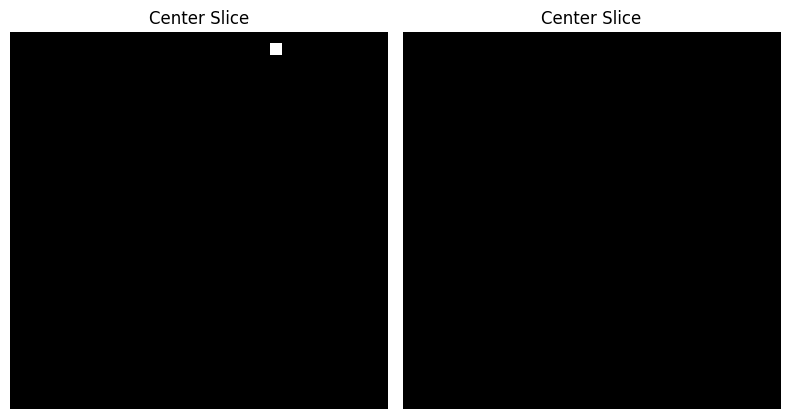

Sampling Steps:  46%|████████████████████████████████████████████████████                                                            | 93/200 [00:56<01:03,  1.70it/s]

timestep:534
(2, 1, 32, 32, 32)


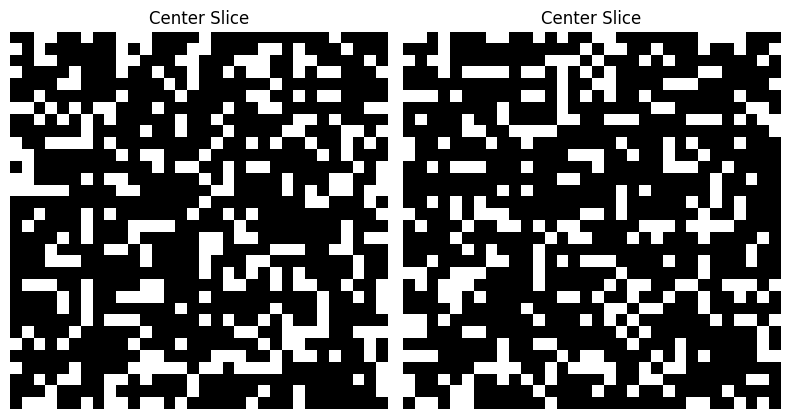

(2, 1, 32, 32, 32)


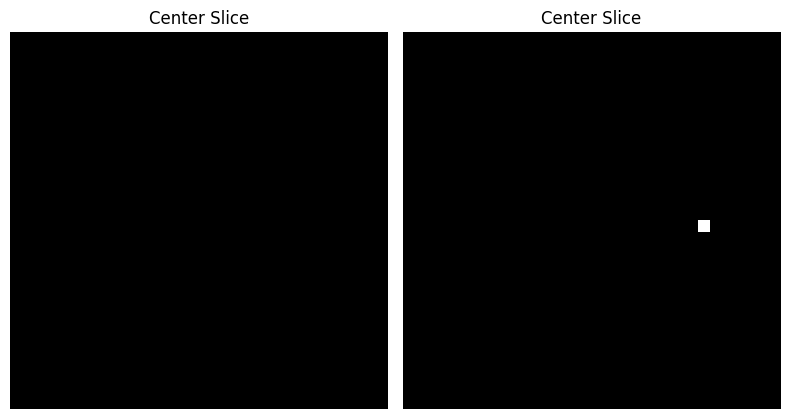

Sampling Steps:  47%|████████████████████████████████████████████████████▋                                                           | 94/200 [00:57<01:02,  1.70it/s]

timestep:529
(2, 1, 32, 32, 32)


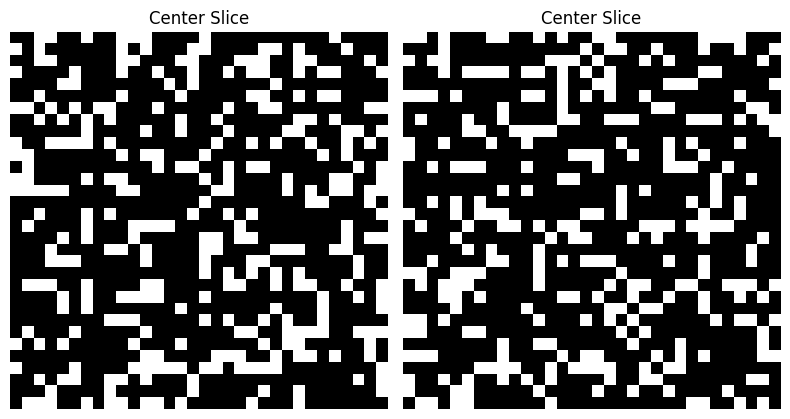

(2, 1, 32, 32, 32)


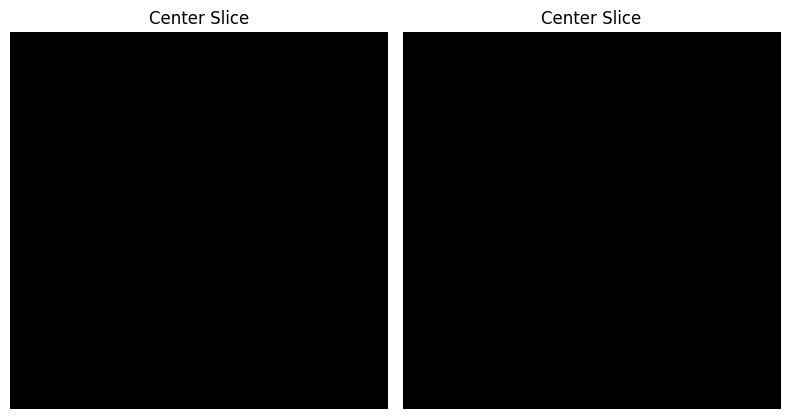

Sampling Steps:  48%|█████████████████████████████████████████████████████▏                                                          | 95/200 [00:57<01:01,  1.70it/s]

timestep:524
(2, 1, 32, 32, 32)


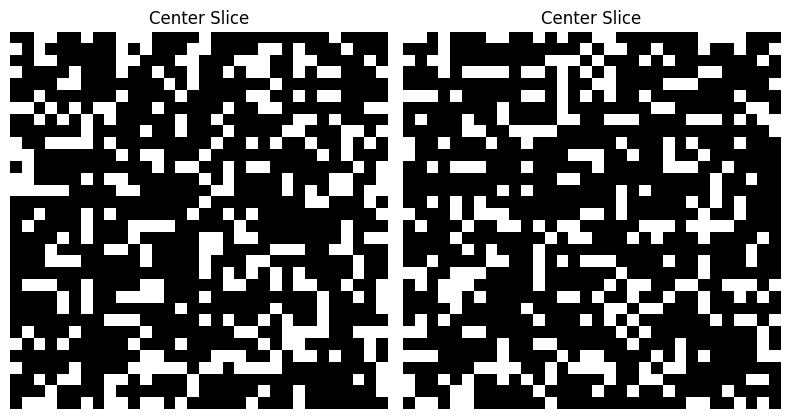

(2, 1, 32, 32, 32)


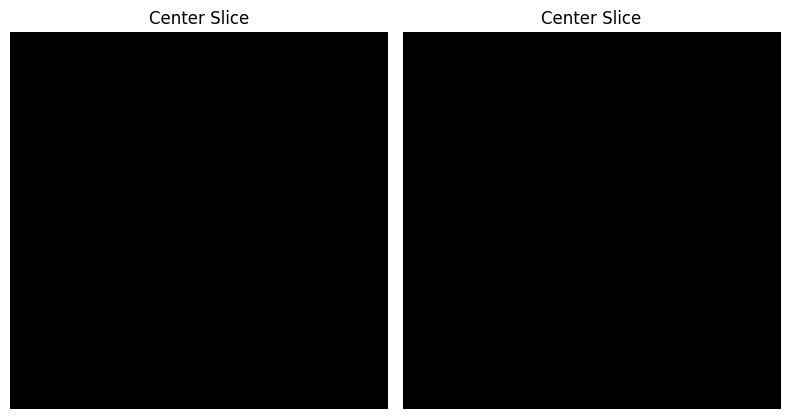

Sampling Steps:  48%|█████████████████████████████████████████████████████▊                                                          | 96/200 [00:58<01:00,  1.71it/s]

timestep:519
(2, 1, 32, 32, 32)


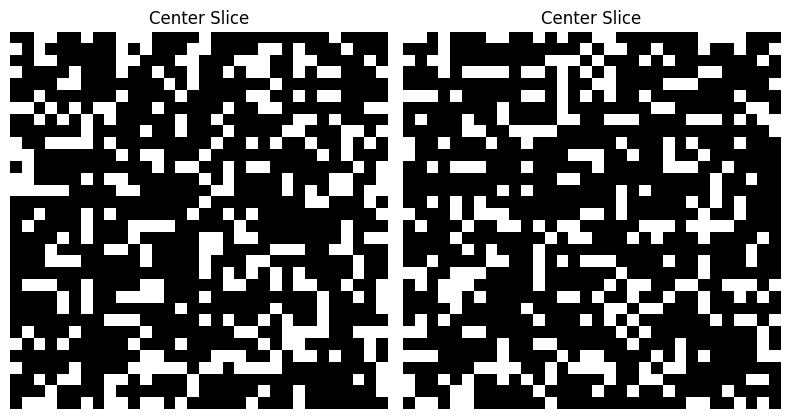

(2, 1, 32, 32, 32)


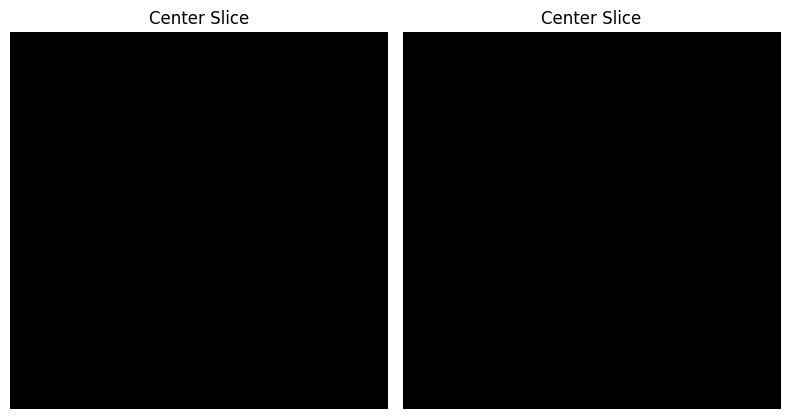

Sampling Steps:  48%|██████████████████████████████████████████████████████▎                                                         | 97/200 [00:58<01:00,  1.71it/s]

timestep:514
(2, 1, 32, 32, 32)


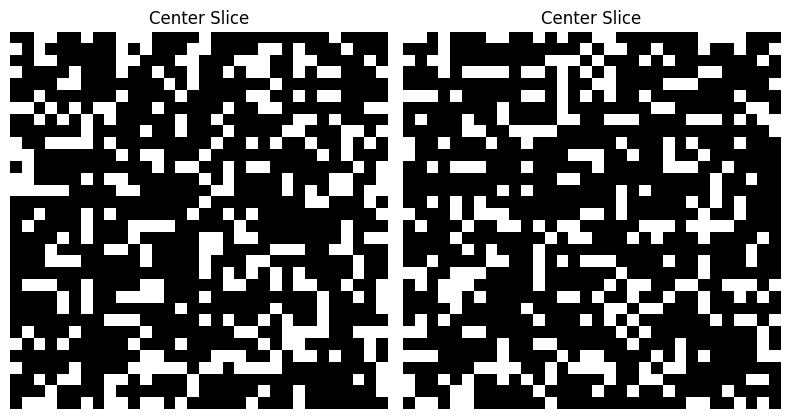

(2, 1, 32, 32, 32)


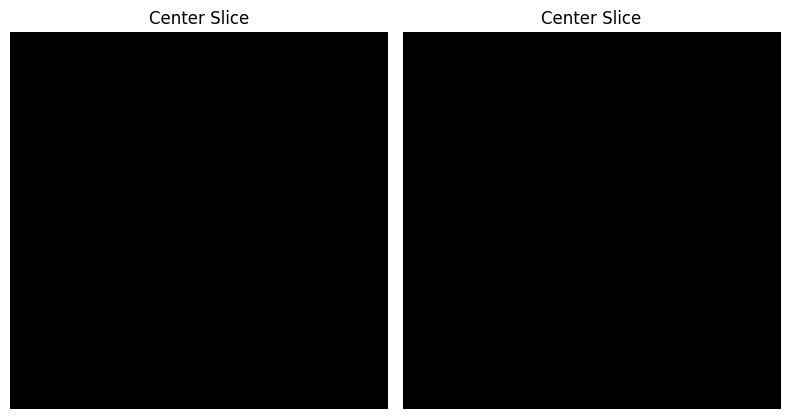

Sampling Steps:  49%|██████████████████████████████████████████████████████▉                                                         | 98/200 [00:59<00:59,  1.71it/s]

timestep:509
(2, 1, 32, 32, 32)


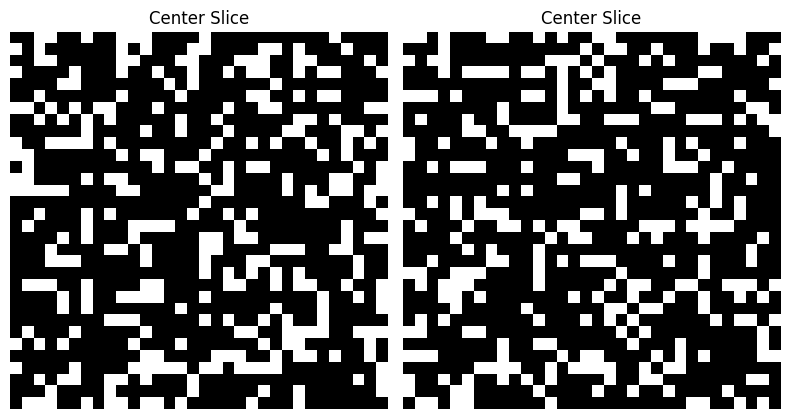

(2, 1, 32, 32, 32)


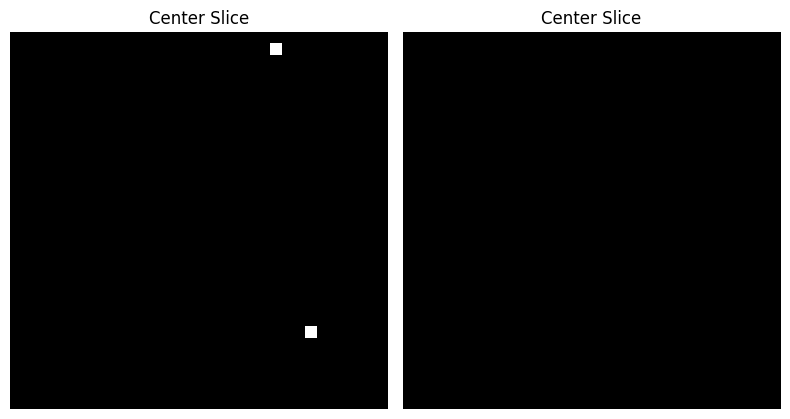

Sampling Steps:  50%|███████████████████████████████████████████████████████▍                                                        | 99/200 [01:00<00:58,  1.71it/s]

timestep:504
(2, 1, 32, 32, 32)


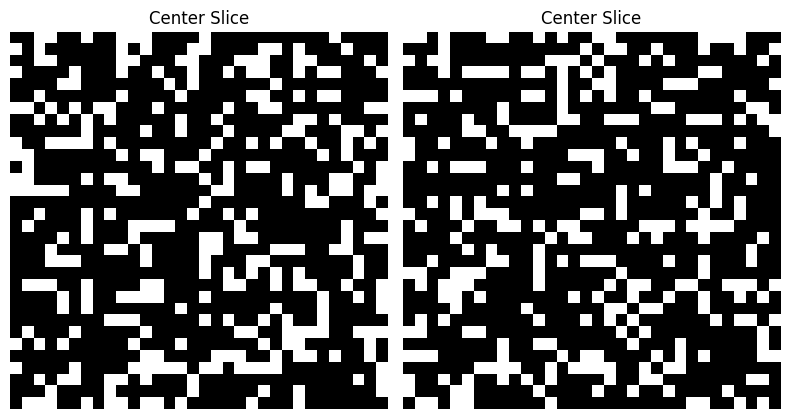

(2, 1, 32, 32, 32)


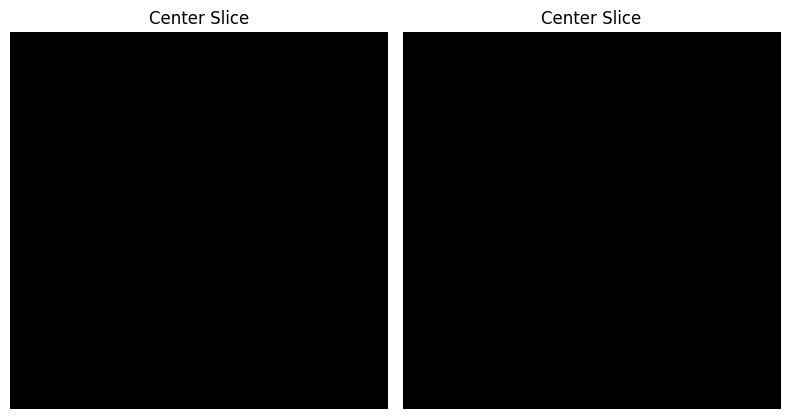

Sampling Steps:  50%|███████████████████████████████████████████████████████▌                                                       | 100/200 [01:00<00:58,  1.71it/s]

timestep:499
(2, 1, 32, 32, 32)


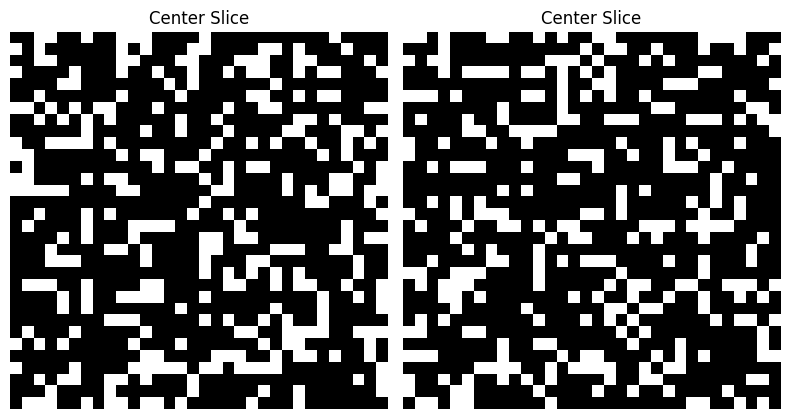

(2, 1, 32, 32, 32)


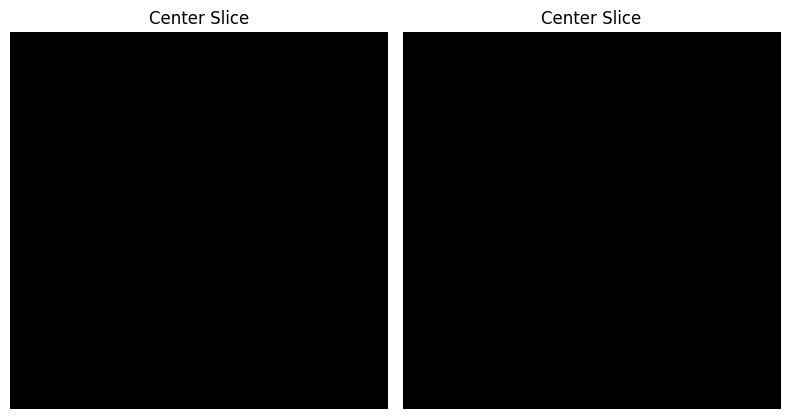

Sampling Steps:  50%|████████████████████████████████████████████████████████                                                       | 101/200 [01:01<00:57,  1.71it/s]

timestep:494
(2, 1, 32, 32, 32)


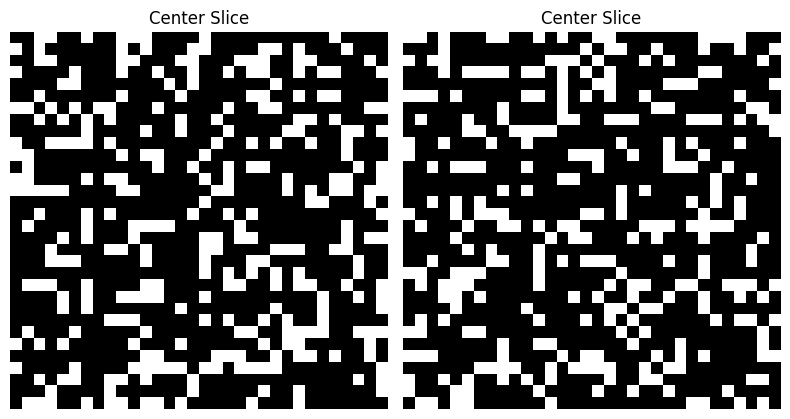

(2, 1, 32, 32, 32)


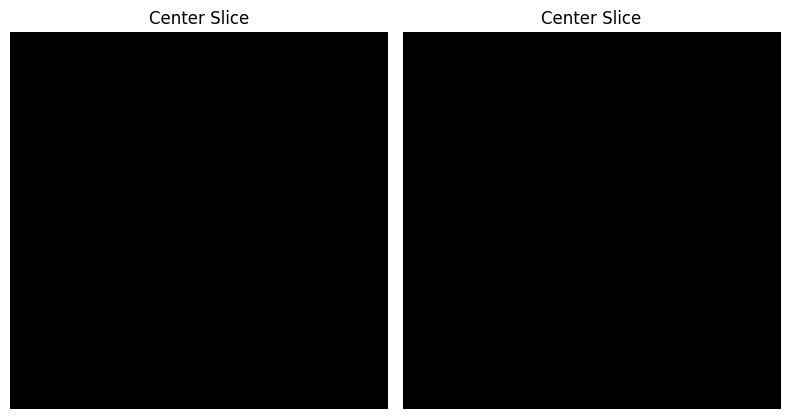

Sampling Steps:  51%|████████████████████████████████████████████████████████▌                                                      | 102/200 [01:01<00:57,  1.71it/s]

timestep:489
(2, 1, 32, 32, 32)


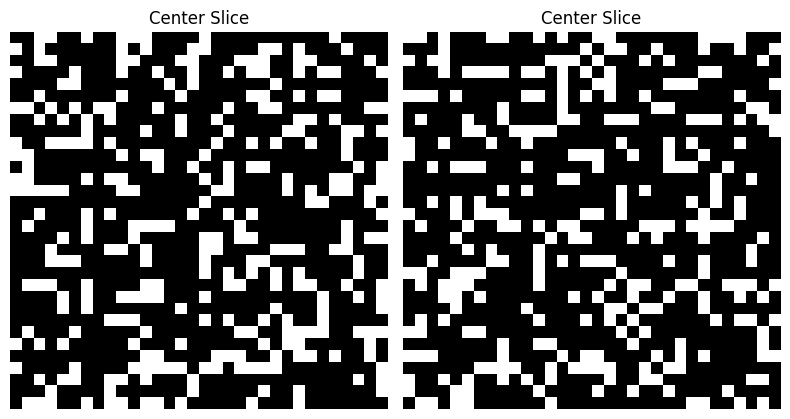

(2, 1, 32, 32, 32)


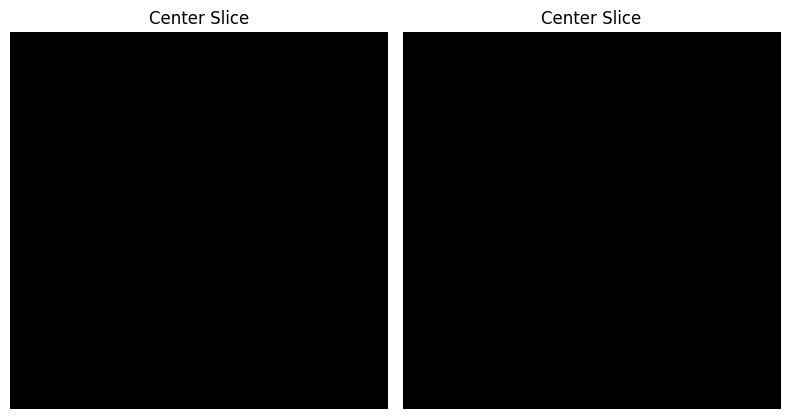

Sampling Steps:  52%|█████████████████████████████████████████████████████████▏                                                     | 103/200 [01:02<00:56,  1.71it/s]

timestep:484
(2, 1, 32, 32, 32)


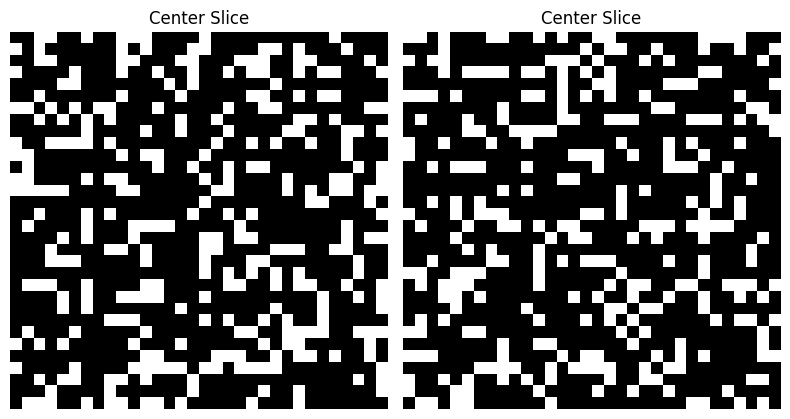

(2, 1, 32, 32, 32)


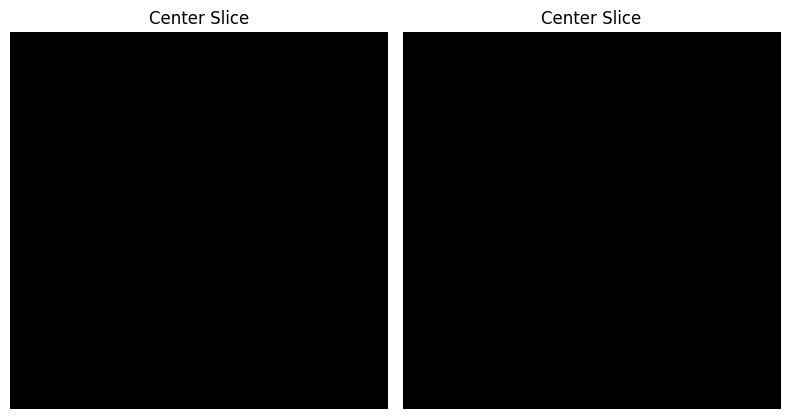

Sampling Steps:  52%|█████████████████████████████████████████████████████████▋                                                     | 104/200 [01:02<00:56,  1.71it/s]

timestep:479
(2, 1, 32, 32, 32)


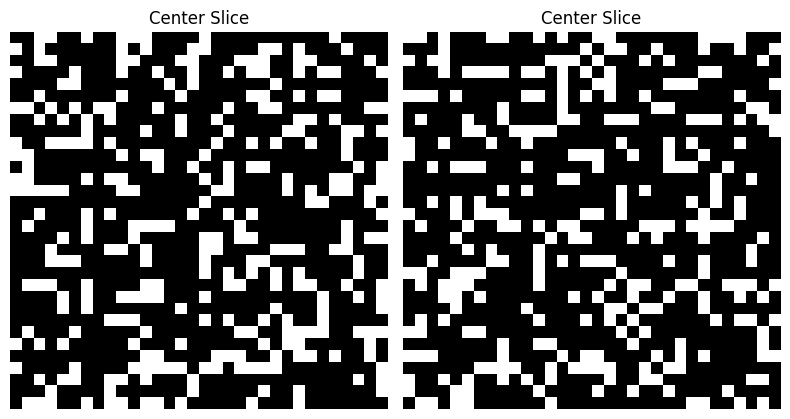

(2, 1, 32, 32, 32)


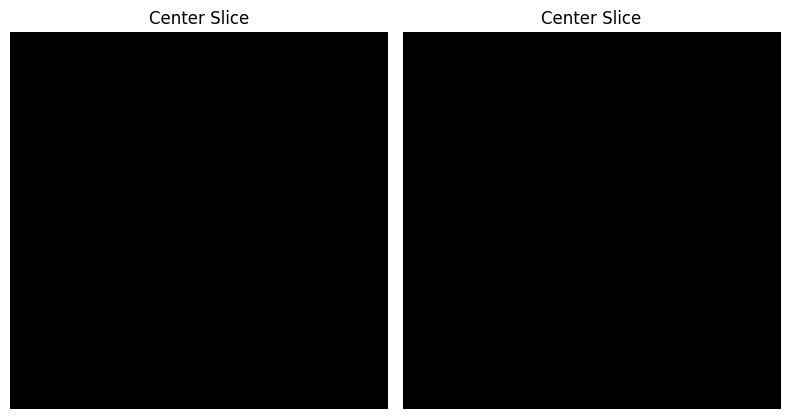

Sampling Steps:  52%|██████████████████████████████████████████████████████████▎                                                    | 105/200 [01:03<00:55,  1.72it/s]

timestep:474
(2, 1, 32, 32, 32)


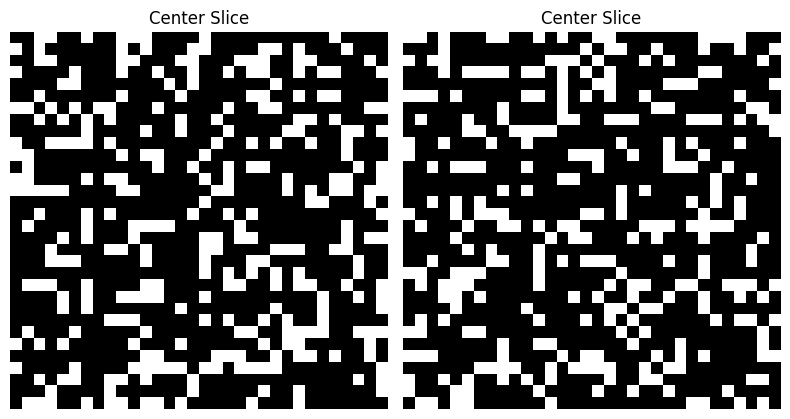

(2, 1, 32, 32, 32)


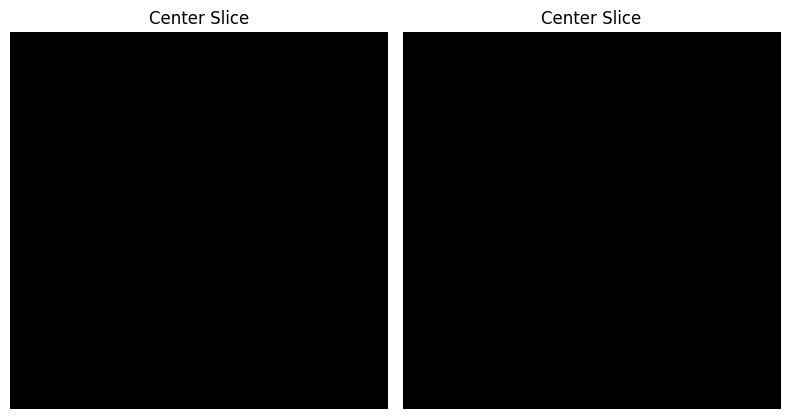

Sampling Steps:  53%|██████████████████████████████████████████████████████████▊                                                    | 106/200 [01:04<01:08,  1.37it/s]

timestep:469
(2, 1, 32, 32, 32)


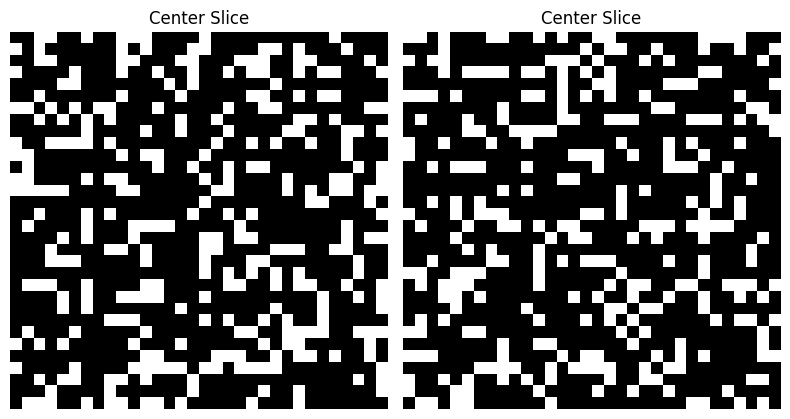

(2, 1, 32, 32, 32)


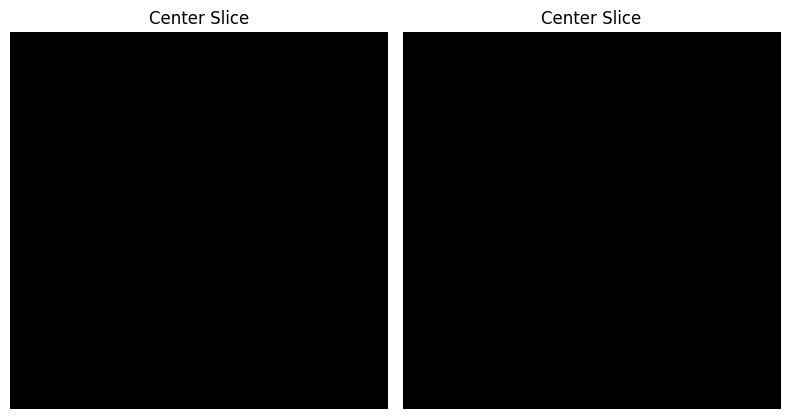

Sampling Steps:  54%|███████████████████████████████████████████████████████████▍                                                   | 107/200 [01:05<01:03,  1.46it/s]

timestep:464
(2, 1, 32, 32, 32)


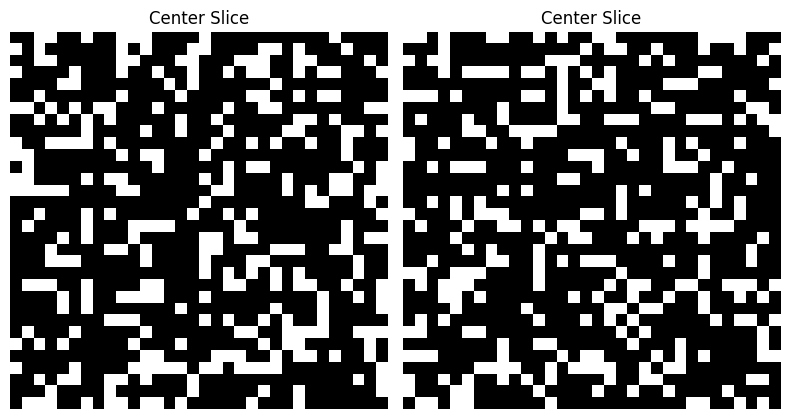

(2, 1, 32, 32, 32)


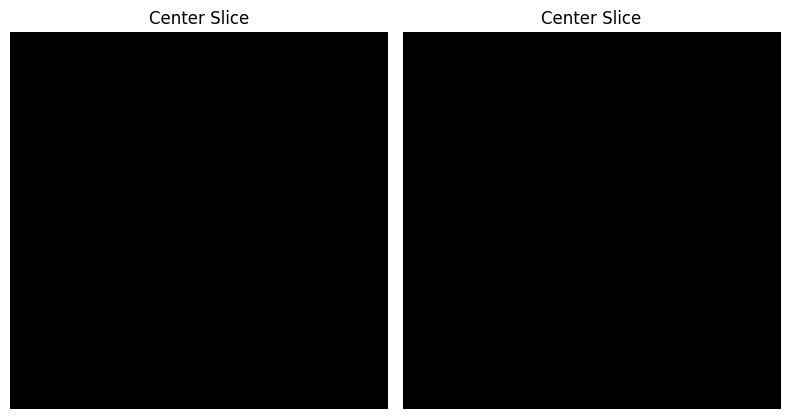

Sampling Steps:  54%|███████████████████████████████████████████████████████████▉                                                   | 108/200 [01:05<01:00,  1.53it/s]

timestep:459
(2, 1, 32, 32, 32)


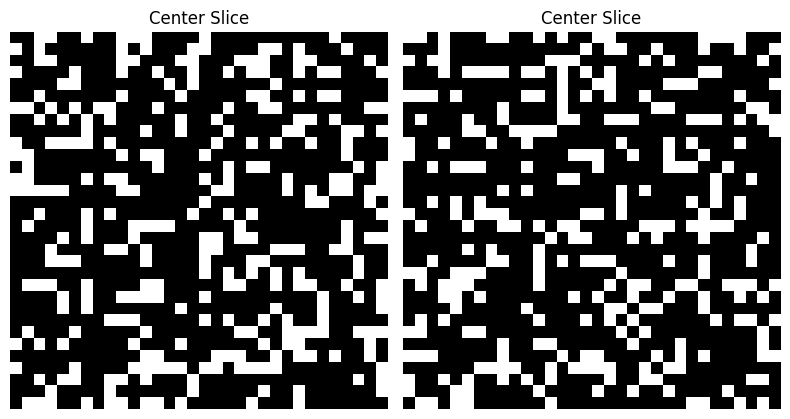

(2, 1, 32, 32, 32)


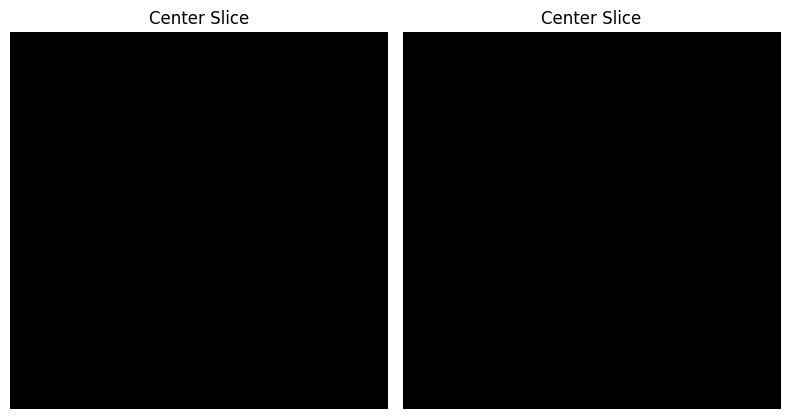

Sampling Steps:  55%|████████████████████████████████████████████████████████████▍                                                  | 109/200 [01:06<00:57,  1.59it/s]

timestep:454
(2, 1, 32, 32, 32)


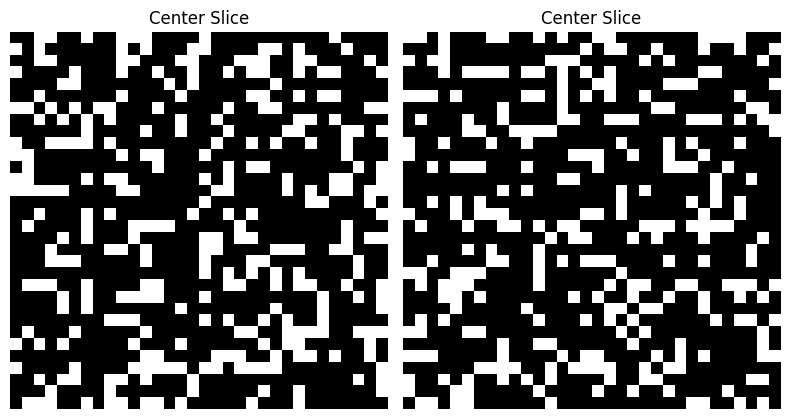

(2, 1, 32, 32, 32)


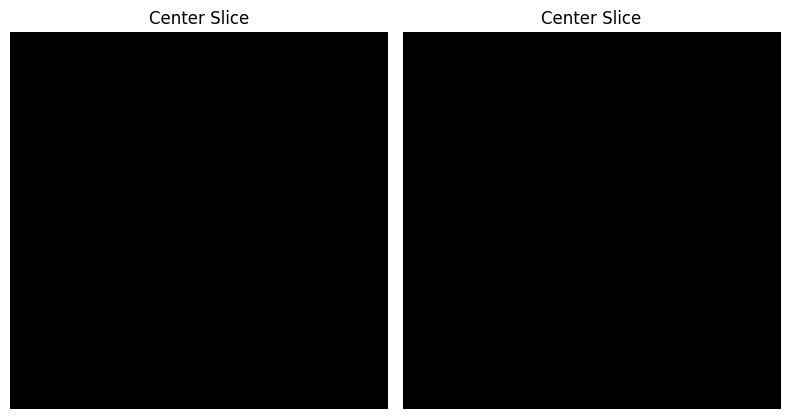

Sampling Steps:  55%|█████████████████████████████████████████████████████████████                                                  | 110/200 [01:06<00:55,  1.63it/s]

timestep:449
(2, 1, 32, 32, 32)


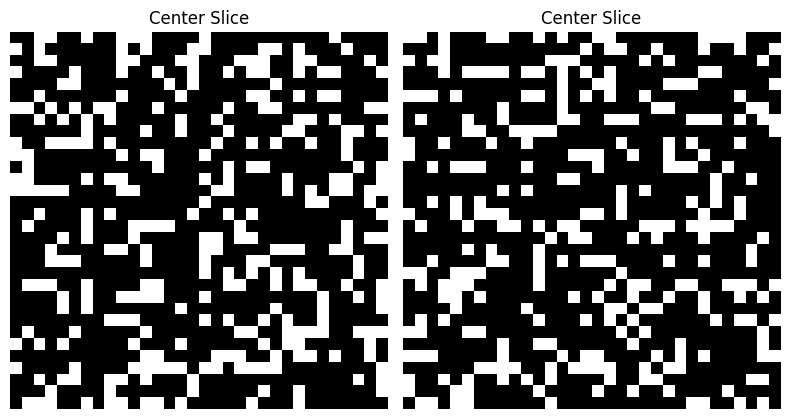

(2, 1, 32, 32, 32)


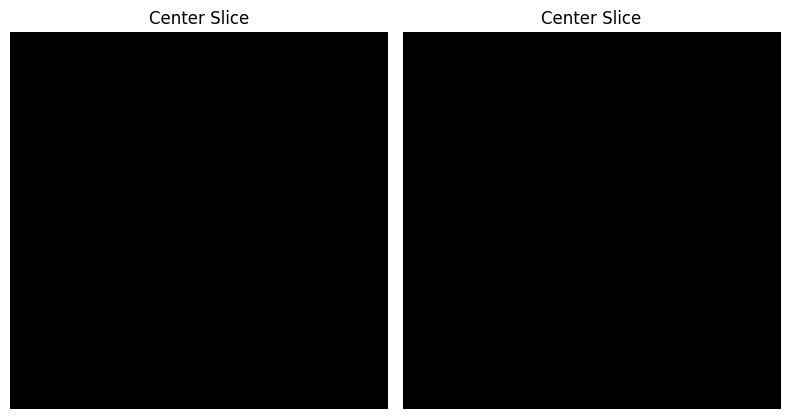

Sampling Steps:  56%|█████████████████████████████████████████████████████████████▌                                                 | 111/200 [01:07<00:53,  1.65it/s]

timestep:444
(2, 1, 32, 32, 32)


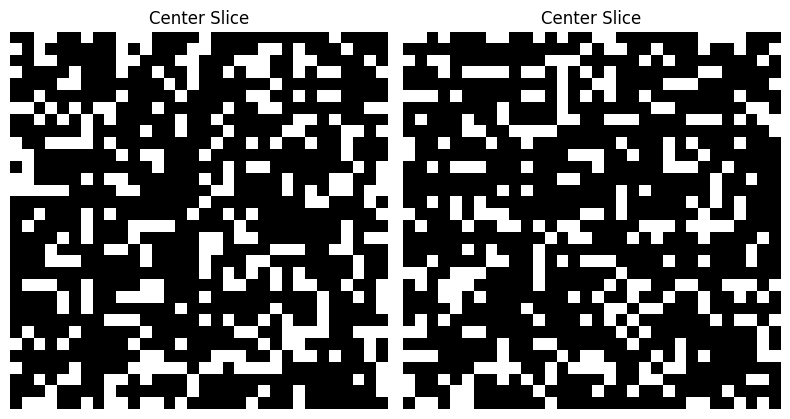

(2, 1, 32, 32, 32)


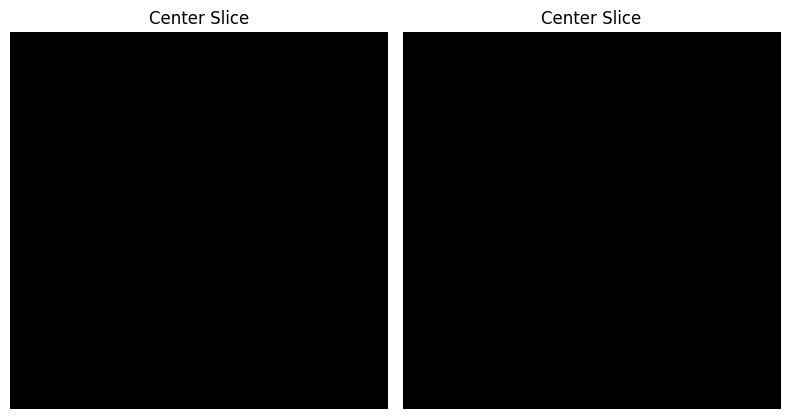

Sampling Steps:  56%|██████████████████████████████████████████████████████████████▏                                                | 112/200 [01:08<00:52,  1.67it/s]

timestep:439
(2, 1, 32, 32, 32)


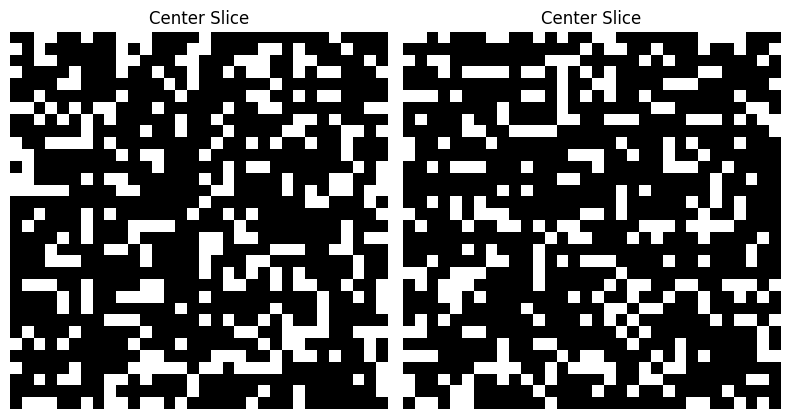

(2, 1, 32, 32, 32)


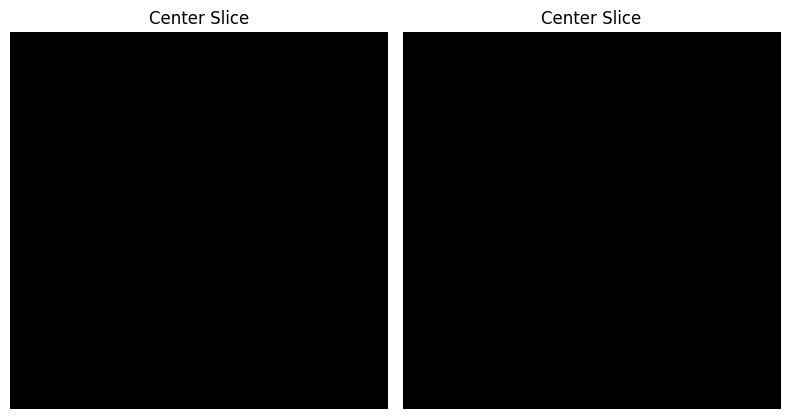

Sampling Steps:  56%|██████████████████████████████████████████████████████████████▋                                                | 113/200 [01:08<00:51,  1.68it/s]

timestep:434
(2, 1, 32, 32, 32)


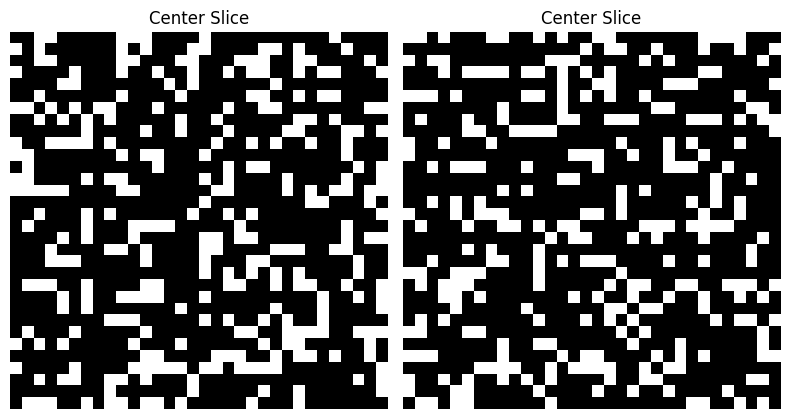

(2, 1, 32, 32, 32)


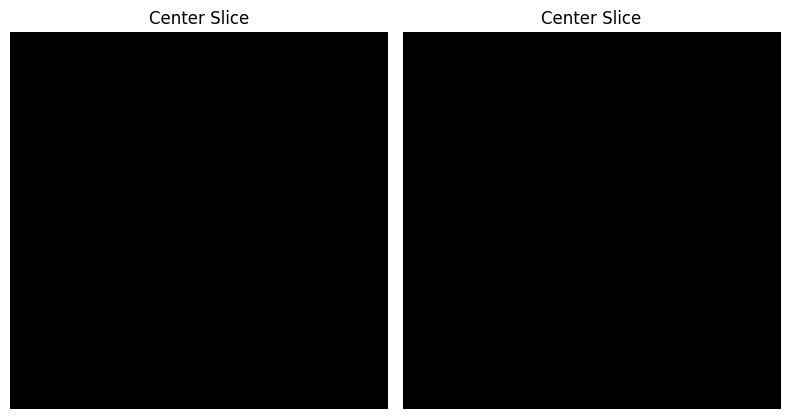

Sampling Steps:  57%|███████████████████████████████████████████████████████████████▎                                               | 114/200 [01:09<00:50,  1.69it/s]

timestep:429
(2, 1, 32, 32, 32)


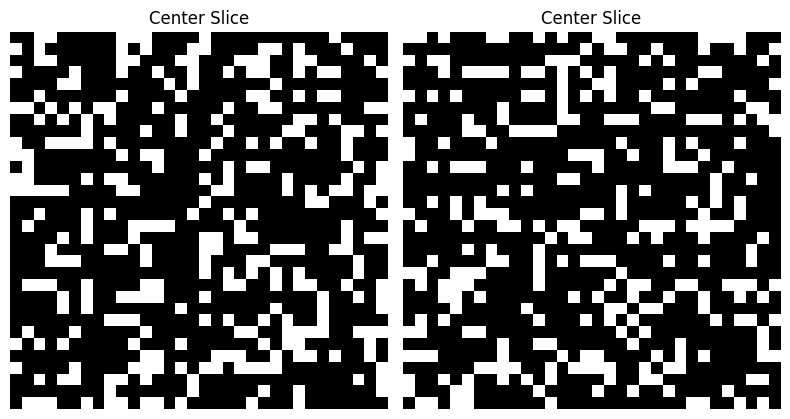

(2, 1, 32, 32, 32)


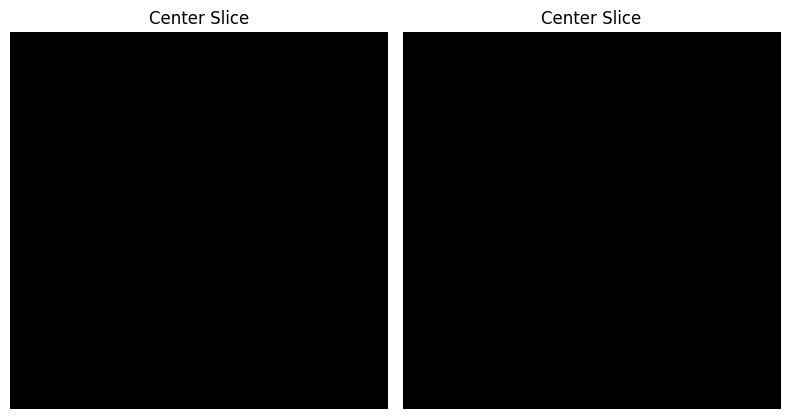

Sampling Steps:  57%|███████████████████████████████████████████████████████████████▊                                               | 115/200 [01:09<00:50,  1.70it/s]

timestep:424
(2, 1, 32, 32, 32)


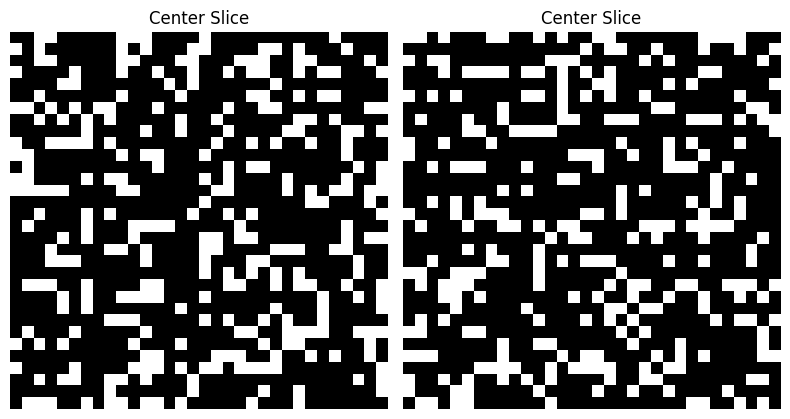

(2, 1, 32, 32, 32)


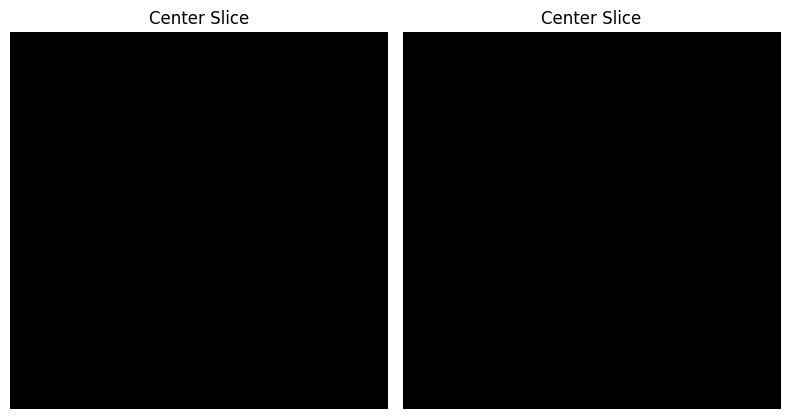

Sampling Steps:  58%|████████████████████████████████████████████████████████████████▍                                              | 116/200 [01:10<00:49,  1.70it/s]

timestep:419
(2, 1, 32, 32, 32)


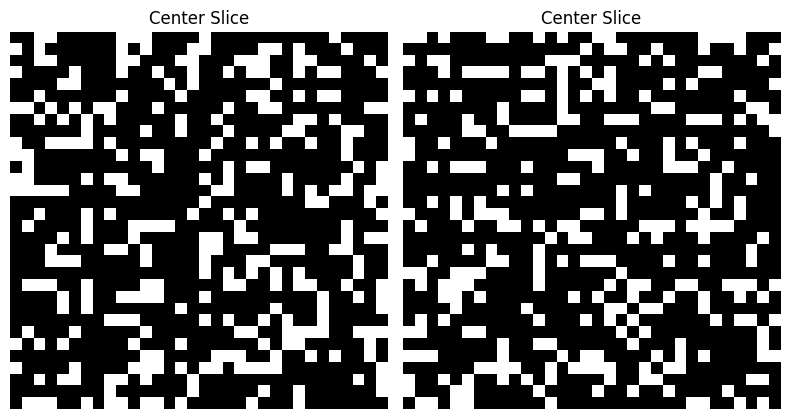

(2, 1, 32, 32, 32)


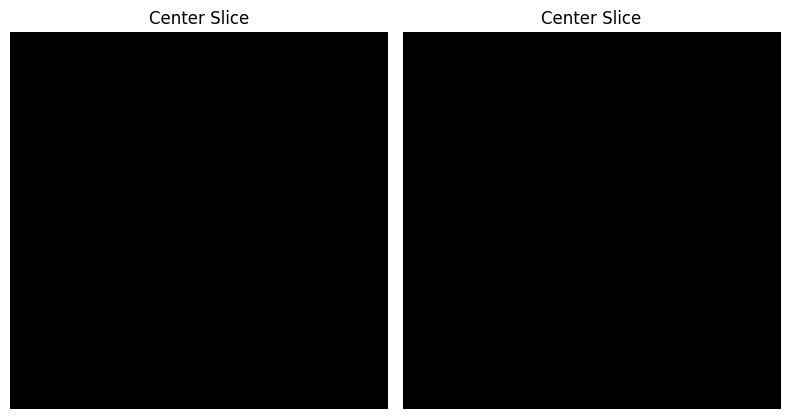

Sampling Steps:  58%|████████████████████████████████████████████████████████████████▉                                              | 117/200 [01:11<00:48,  1.70it/s]

timestep:414
(2, 1, 32, 32, 32)


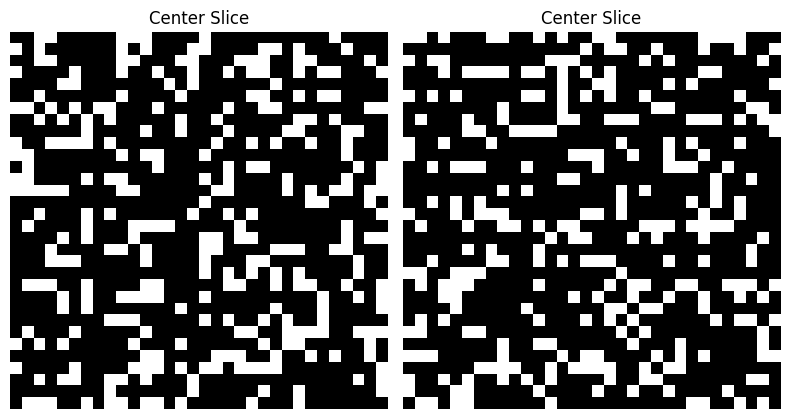

(2, 1, 32, 32, 32)


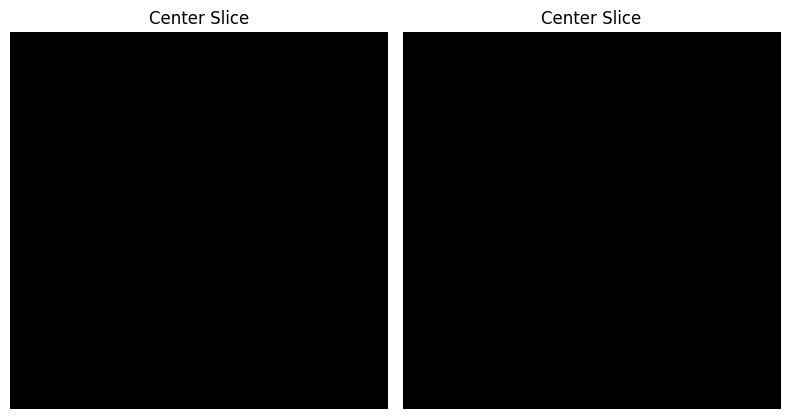

Sampling Steps:  59%|█████████████████████████████████████████████████████████████████▍                                             | 118/200 [01:11<00:48,  1.69it/s]

timestep:409
(2, 1, 32, 32, 32)


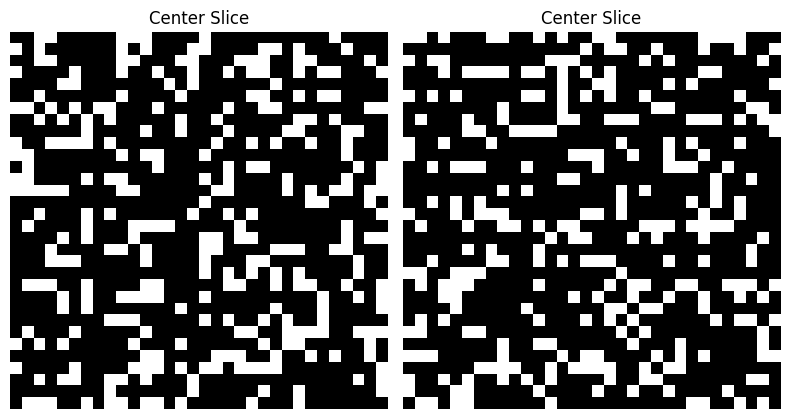

(2, 1, 32, 32, 32)


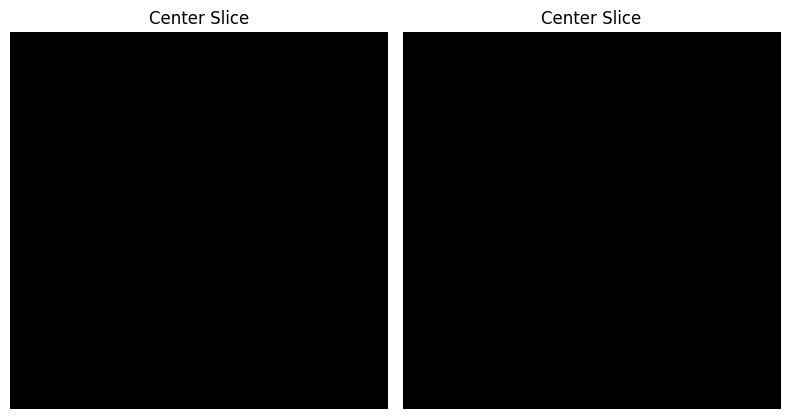

Sampling Steps:  60%|██████████████████████████████████████████████████████████████████                                             | 119/200 [01:12<00:47,  1.69it/s]

timestep:404
(2, 1, 32, 32, 32)


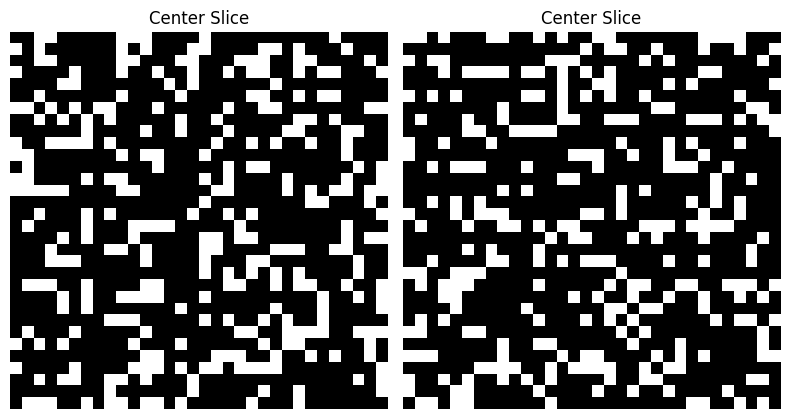

(2, 1, 32, 32, 32)


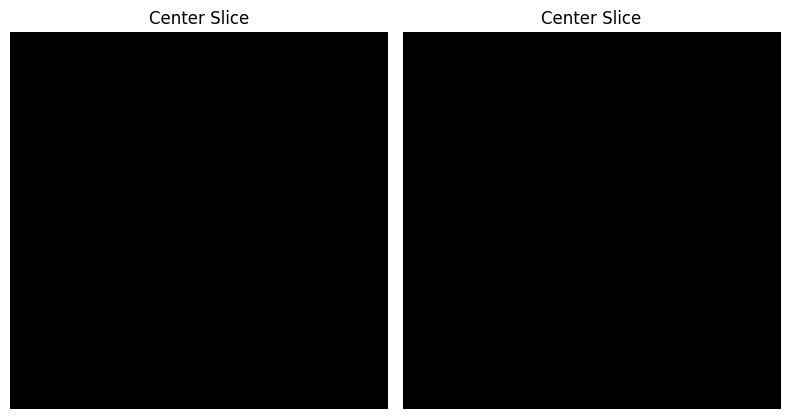

Sampling Steps:  60%|██████████████████████████████████████████████████████████████████▌                                            | 120/200 [01:12<00:47,  1.70it/s]

timestep:399
(2, 1, 32, 32, 32)


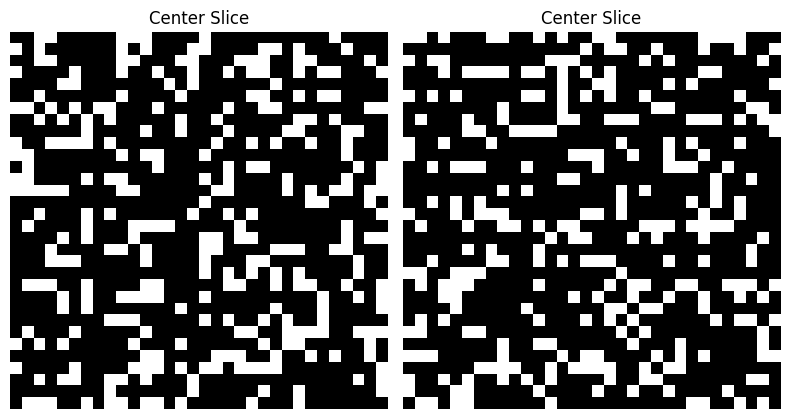

(2, 1, 32, 32, 32)


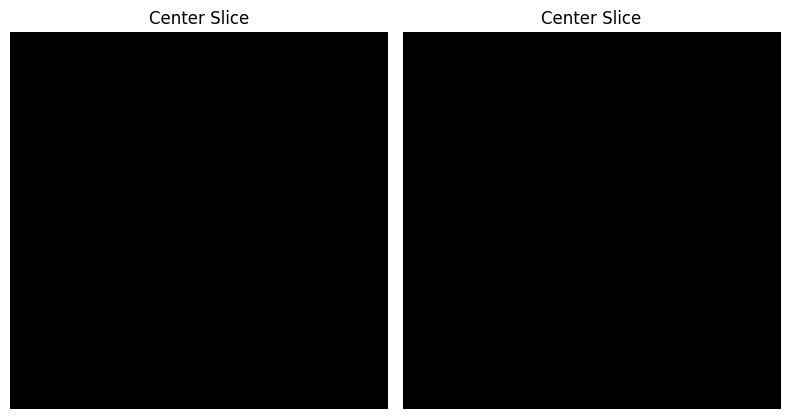

Sampling Steps:  60%|███████████████████████████████████████████████████████████████████▏                                           | 121/200 [01:13<00:46,  1.70it/s]

timestep:394
(2, 1, 32, 32, 32)


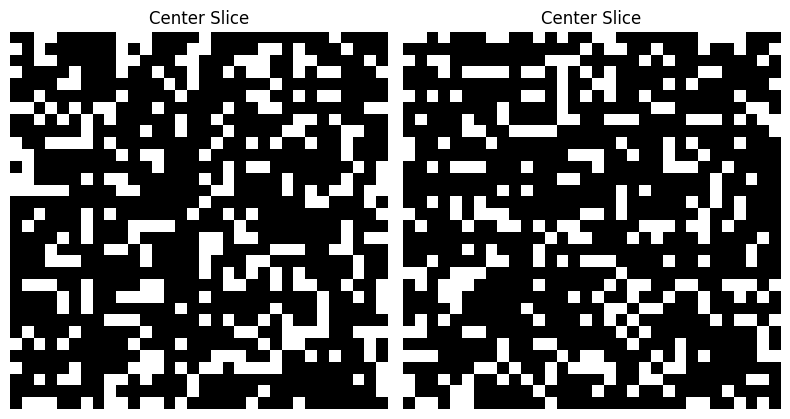

(2, 1, 32, 32, 32)


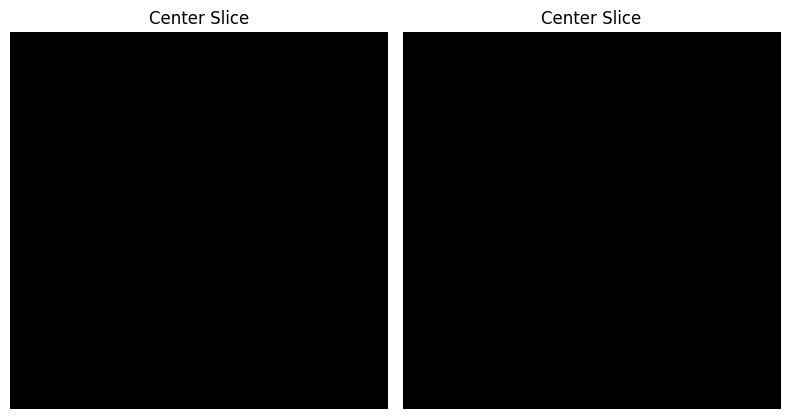

Sampling Steps:  61%|███████████████████████████████████████████████████████████████████▋                                           | 122/200 [01:13<00:45,  1.70it/s]

timestep:389
(2, 1, 32, 32, 32)


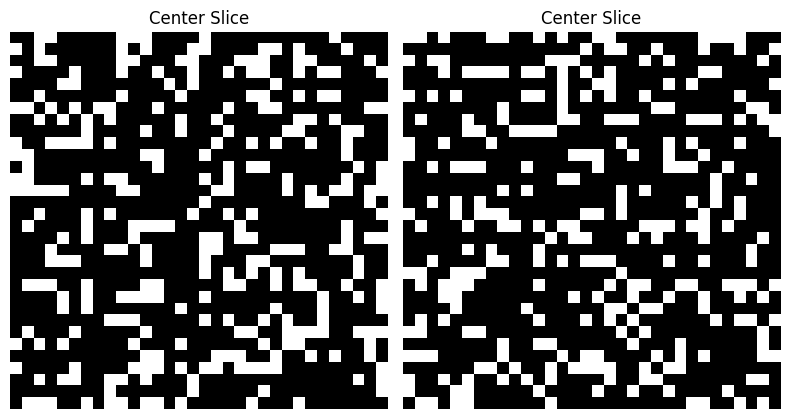

(2, 1, 32, 32, 32)


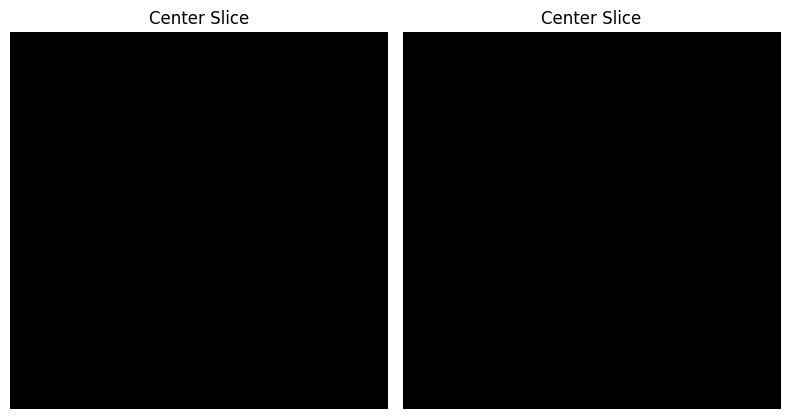

Sampling Steps:  62%|████████████████████████████████████████████████████████████████████▎                                          | 123/200 [01:14<00:45,  1.70it/s]

timestep:384
(2, 1, 32, 32, 32)


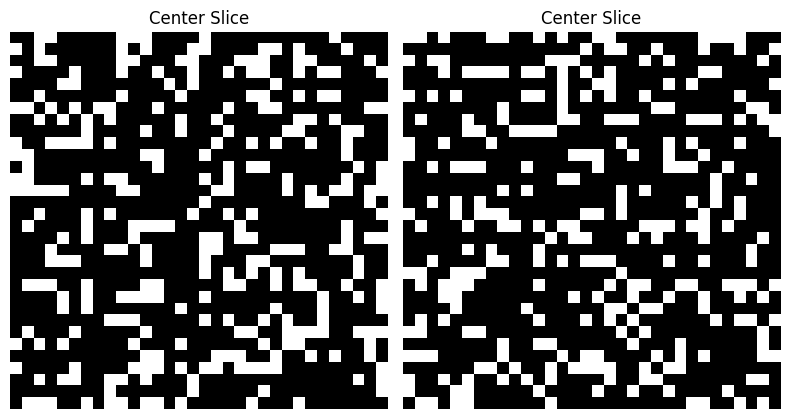

(2, 1, 32, 32, 32)


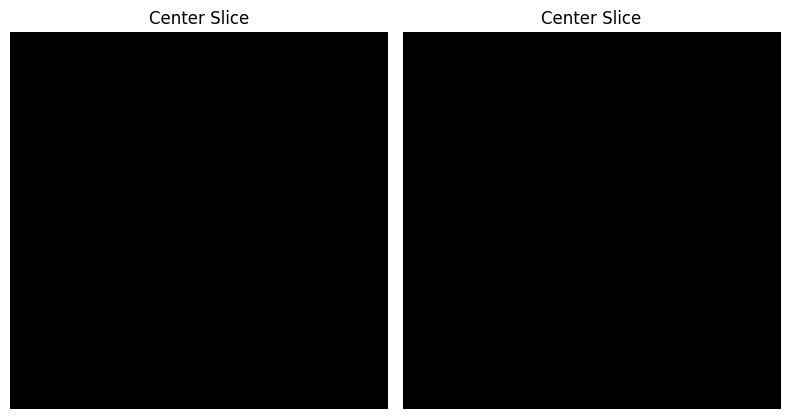

Sampling Steps:  62%|████████████████████████████████████████████████████████████████████▊                                          | 124/200 [01:15<00:44,  1.71it/s]

timestep:379
(2, 1, 32, 32, 32)


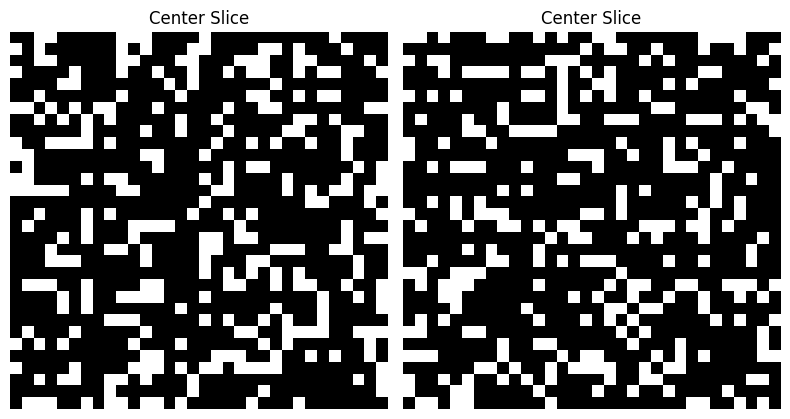

(2, 1, 32, 32, 32)


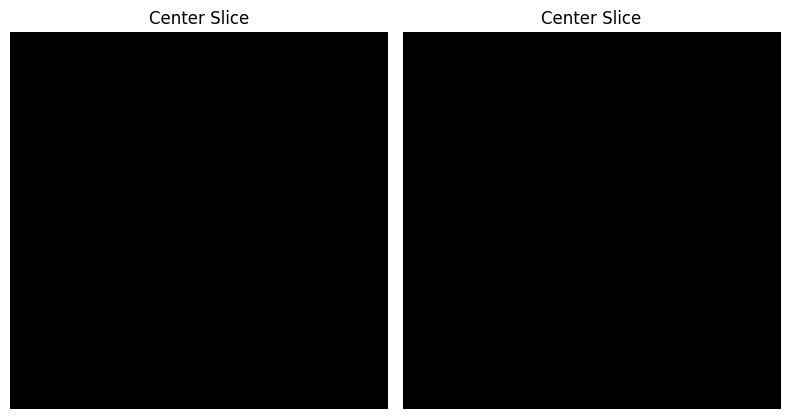

Sampling Steps:  62%|█████████████████████████████████████████████████████████████████████▍                                         | 125/200 [01:15<00:43,  1.70it/s]

timestep:374
(2, 1, 32, 32, 32)


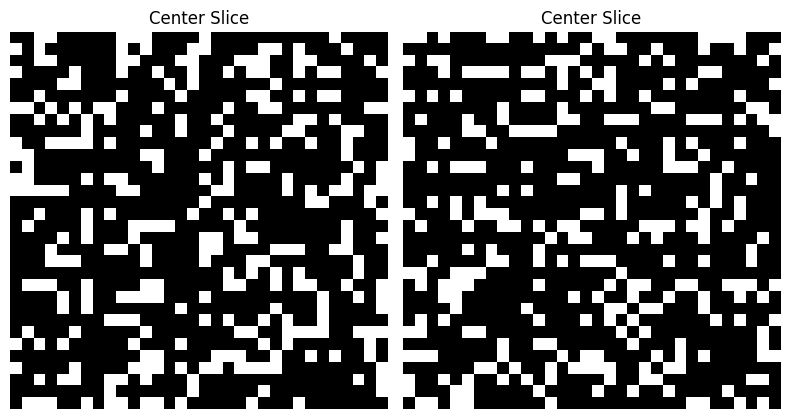

(2, 1, 32, 32, 32)


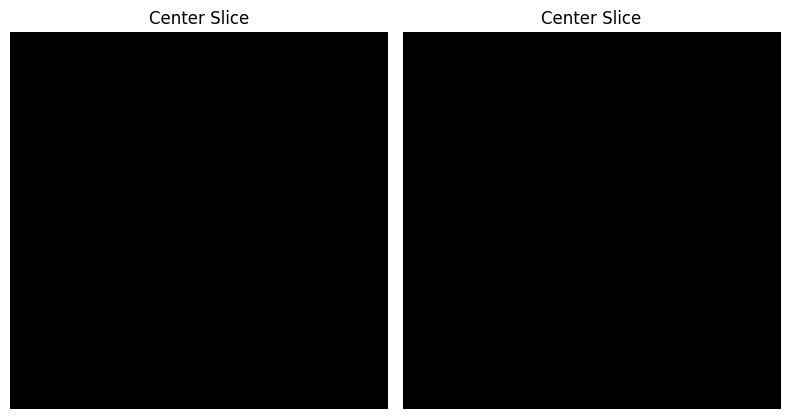

Sampling Steps:  63%|█████████████████████████████████████████████████████████████████████▉                                         | 126/200 [01:16<00:43,  1.71it/s]

timestep:369
(2, 1, 32, 32, 32)


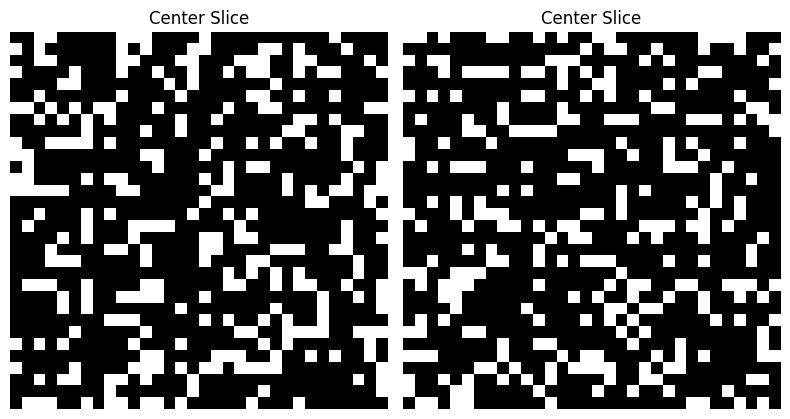

(2, 1, 32, 32, 32)


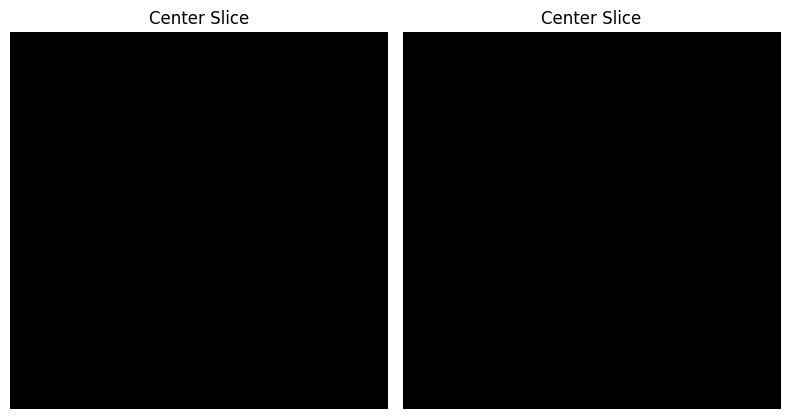

Sampling Steps:  64%|██████████████████████████████████████████████████████████████████████▍                                        | 127/200 [01:16<00:42,  1.71it/s]

timestep:364
(2, 1, 32, 32, 32)


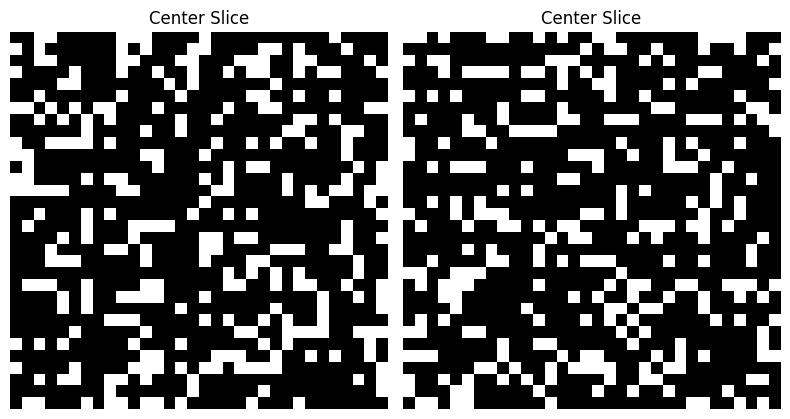

(2, 1, 32, 32, 32)


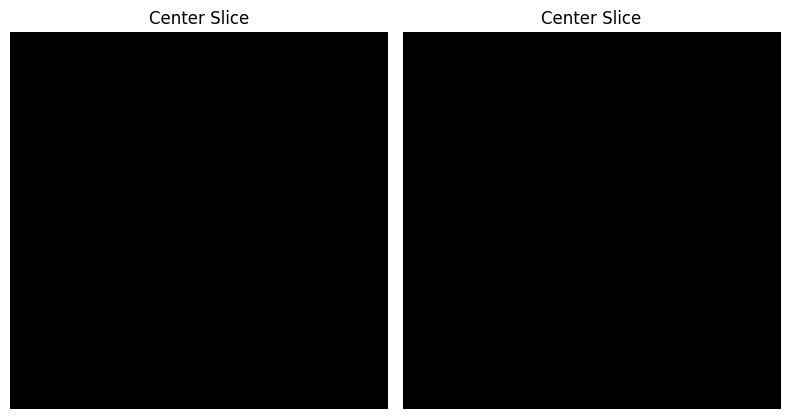

Sampling Steps:  64%|███████████████████████████████████████████████████████████████████████                                        | 128/200 [01:17<00:42,  1.71it/s]

timestep:359
(2, 1, 32, 32, 32)


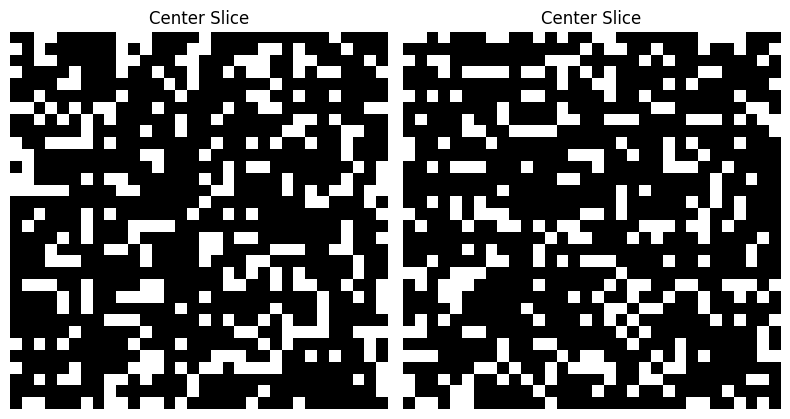

(2, 1, 32, 32, 32)


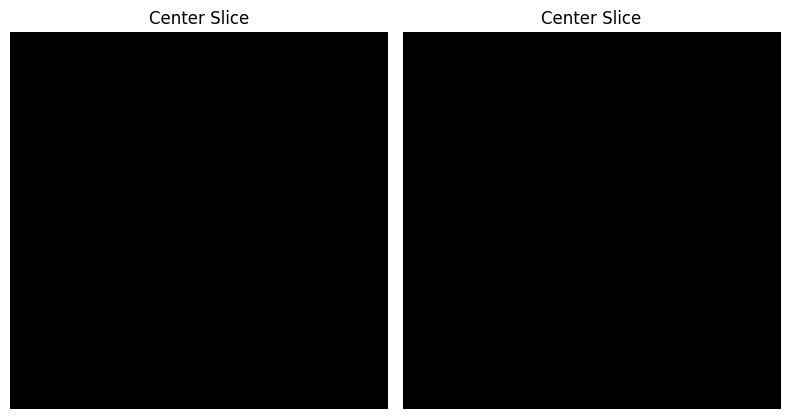

Sampling Steps:  64%|███████████████████████████████████████████████████████████████████████▌                                       | 129/200 [01:18<00:41,  1.72it/s]

timestep:354
(2, 1, 32, 32, 32)


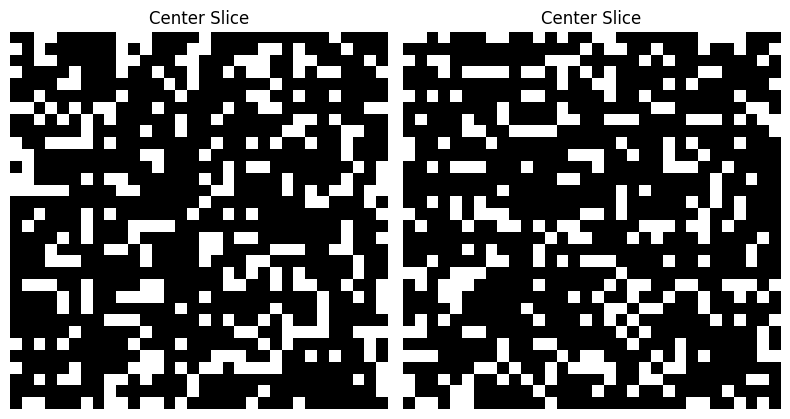

(2, 1, 32, 32, 32)


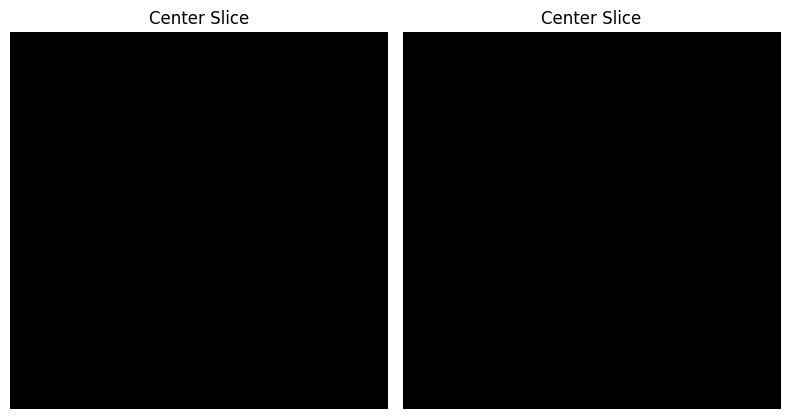

Sampling Steps:  65%|████████████████████████████████████████████████████████████████████████▏                                      | 130/200 [01:18<00:40,  1.71it/s]

timestep:349
(2, 1, 32, 32, 32)


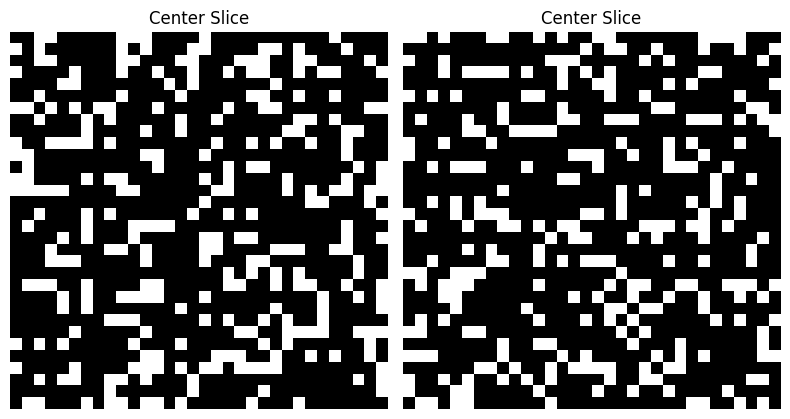

(2, 1, 32, 32, 32)


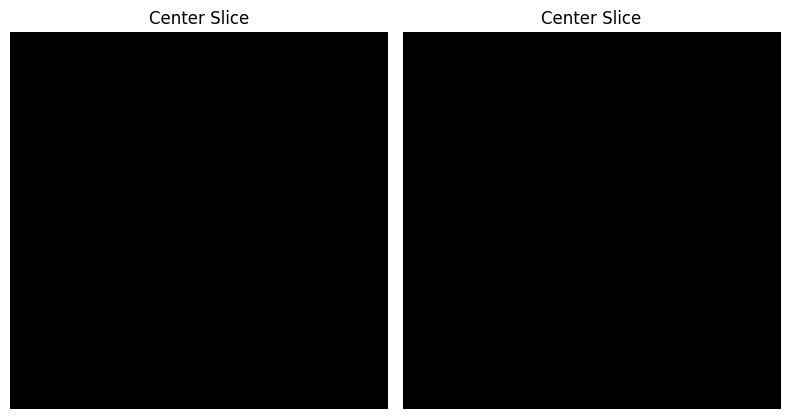

Sampling Steps:  66%|████████████████████████████████████████████████████████████████████████▋                                      | 131/200 [01:19<00:40,  1.71it/s]

timestep:344
(2, 1, 32, 32, 32)


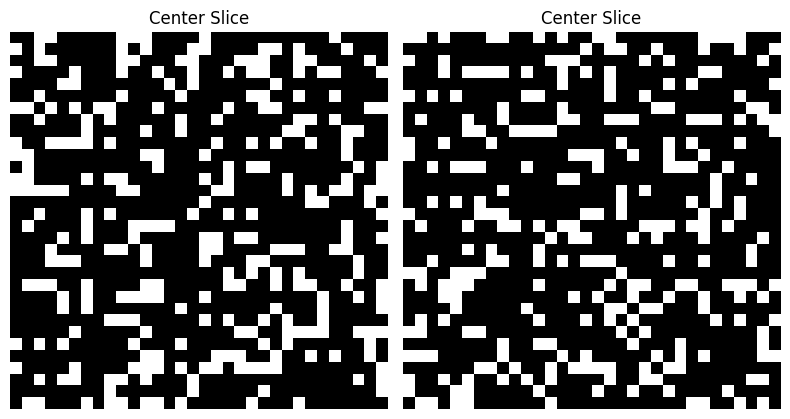

(2, 1, 32, 32, 32)


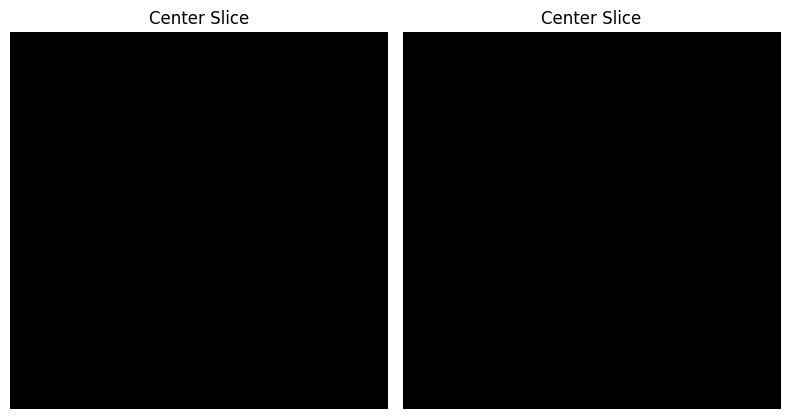

Sampling Steps:  66%|█████████████████████████████████████████████████████████████████████████▎                                     | 132/200 [01:20<00:50,  1.35it/s]

timestep:339
(2, 1, 32, 32, 32)


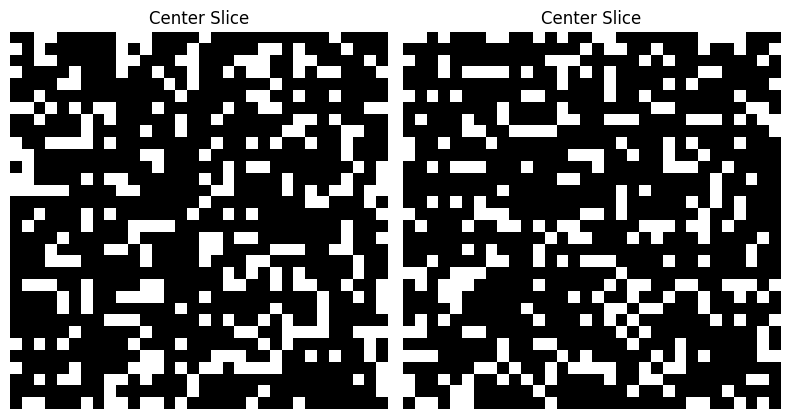

(2, 1, 32, 32, 32)


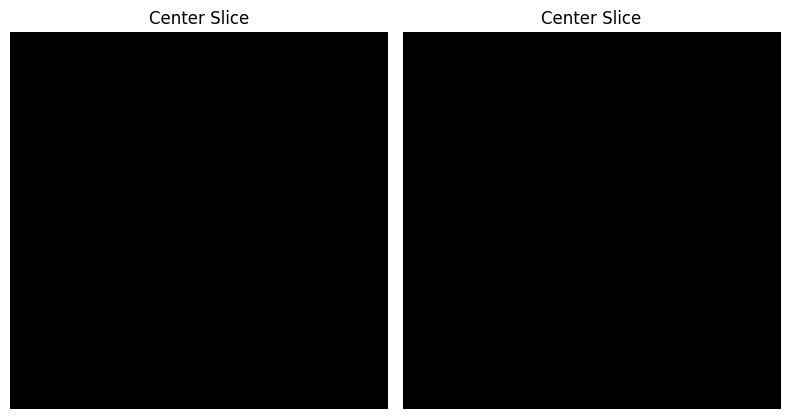

Sampling Steps:  66%|█████████████████████████████████████████████████████████████████████████▊                                     | 133/200 [01:20<00:46,  1.44it/s]

timestep:334
(2, 1, 32, 32, 32)


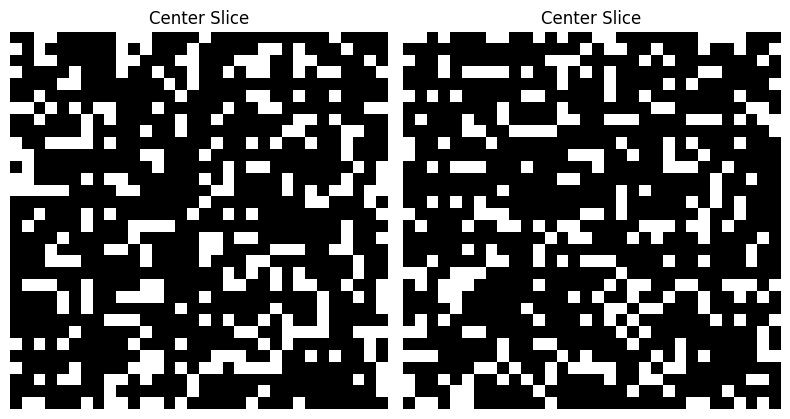

(2, 1, 32, 32, 32)


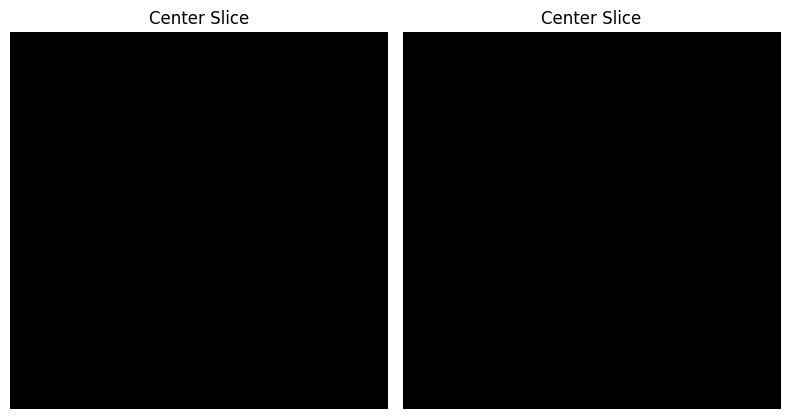

Sampling Steps:  67%|██████████████████████████████████████████████████████████████████████████▎                                    | 134/200 [01:21<00:43,  1.51it/s]

timestep:329
(2, 1, 32, 32, 32)


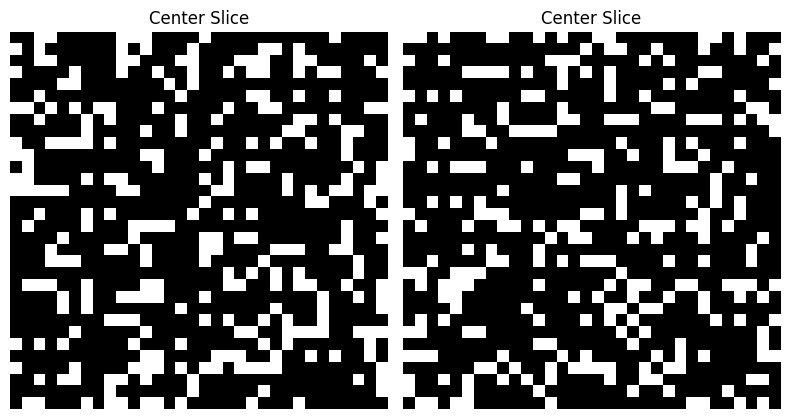

(2, 1, 32, 32, 32)


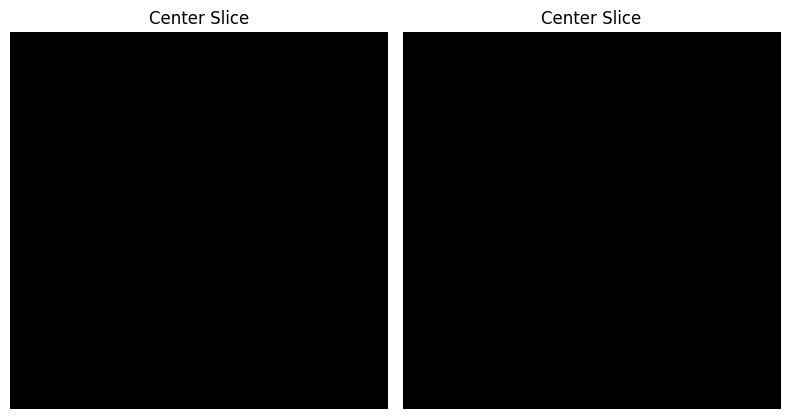

Sampling Steps:  68%|██████████████████████████████████████████████████████████████████████████▉                                    | 135/200 [01:22<00:41,  1.56it/s]

timestep:324
(2, 1, 32, 32, 32)


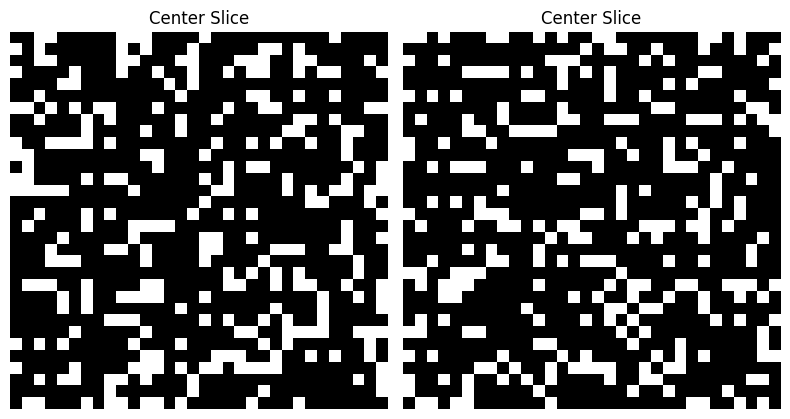

(2, 1, 32, 32, 32)


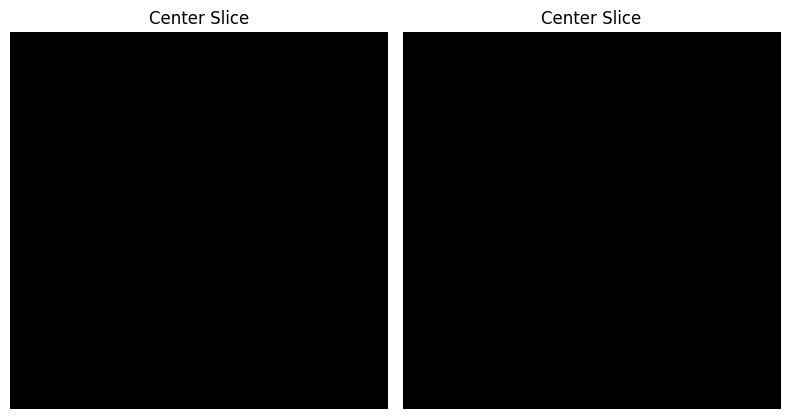

Sampling Steps:  68%|███████████████████████████████████████████████████████████████████████████▍                                   | 136/200 [01:22<00:40,  1.60it/s]

timestep:319
(2, 1, 32, 32, 32)


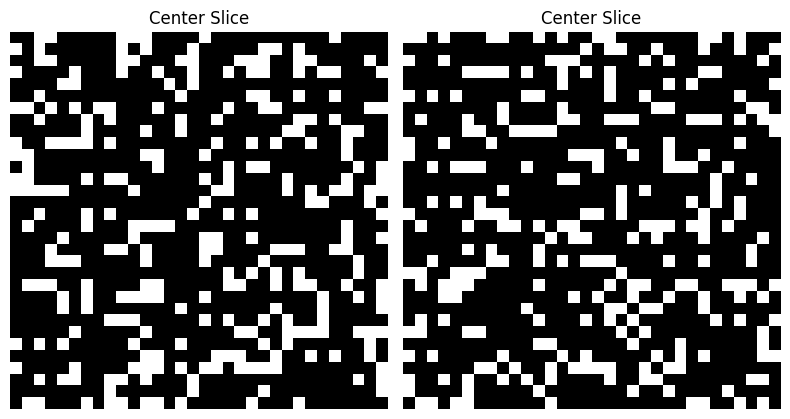

(2, 1, 32, 32, 32)


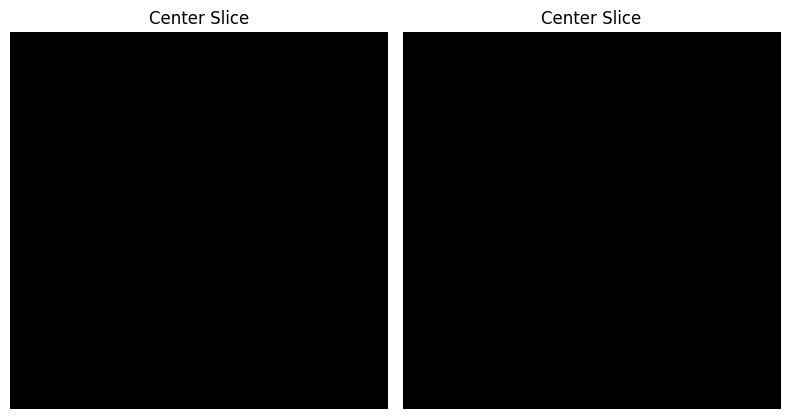

Sampling Steps:  68%|████████████████████████████████████████████████████████████████████████████                                   | 137/200 [01:23<00:38,  1.63it/s]

timestep:314
(2, 1, 32, 32, 32)


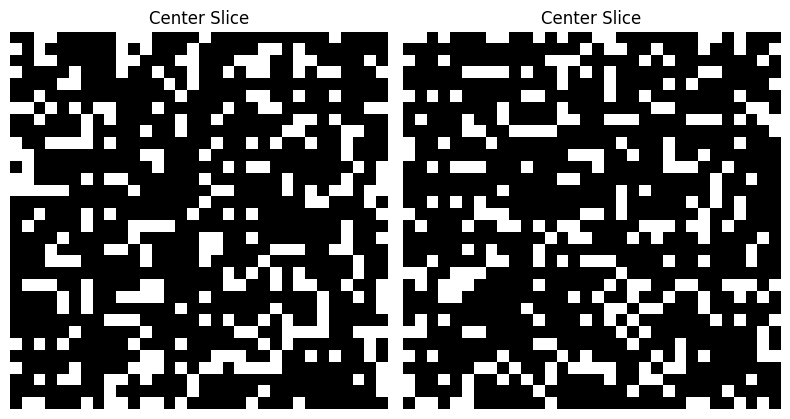

(2, 1, 32, 32, 32)


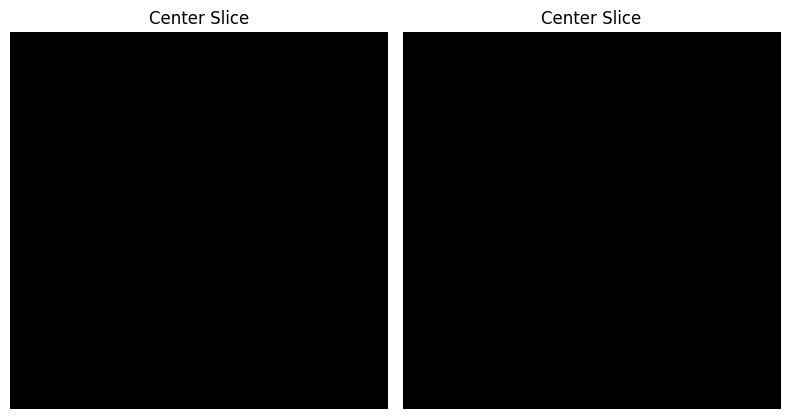

Sampling Steps:  69%|████████████████████████████████████████████████████████████████████████████▌                                  | 138/200 [01:23<00:37,  1.65it/s]

timestep:309
(2, 1, 32, 32, 32)


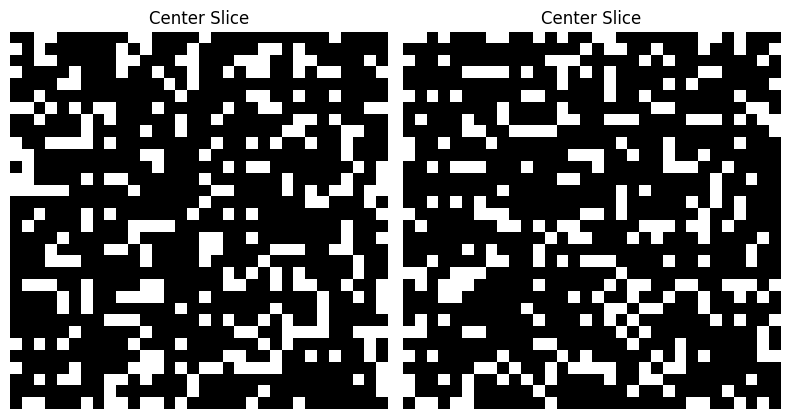

(2, 1, 32, 32, 32)


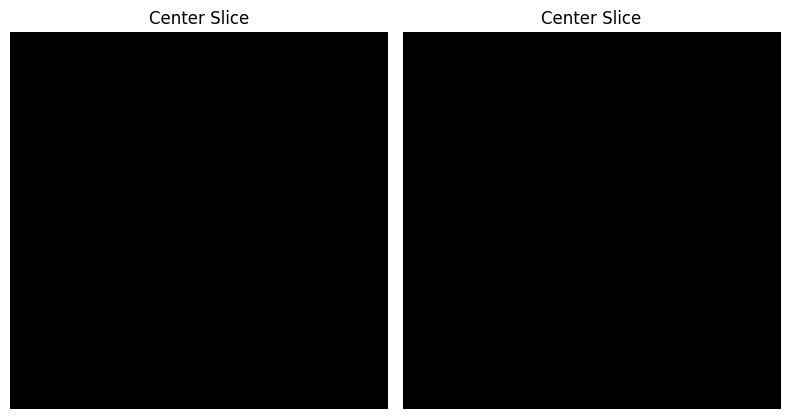

Sampling Steps:  70%|█████████████████████████████████████████████████████████████████████████████▏                                 | 139/200 [01:24<00:36,  1.67it/s]

timestep:304
(2, 1, 32, 32, 32)


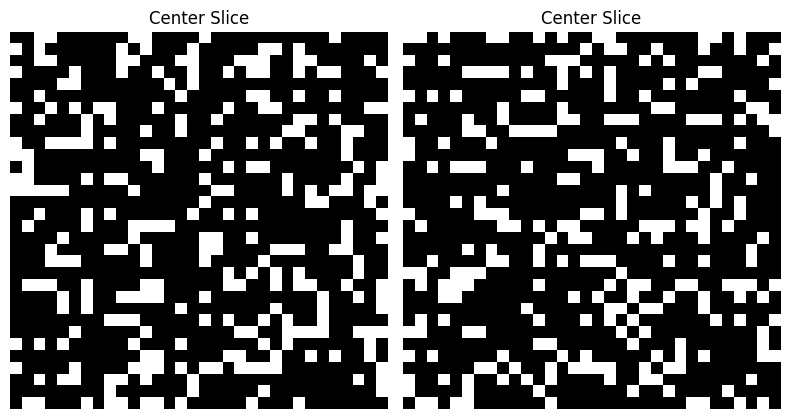

(2, 1, 32, 32, 32)


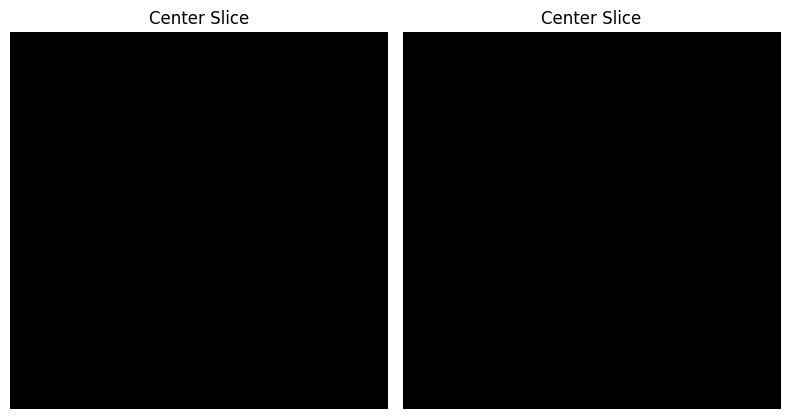

Sampling Steps:  70%|█████████████████████████████████████████████████████████████████████████████▋                                 | 140/200 [01:25<00:35,  1.68it/s]

timestep:299
(2, 1, 32, 32, 32)


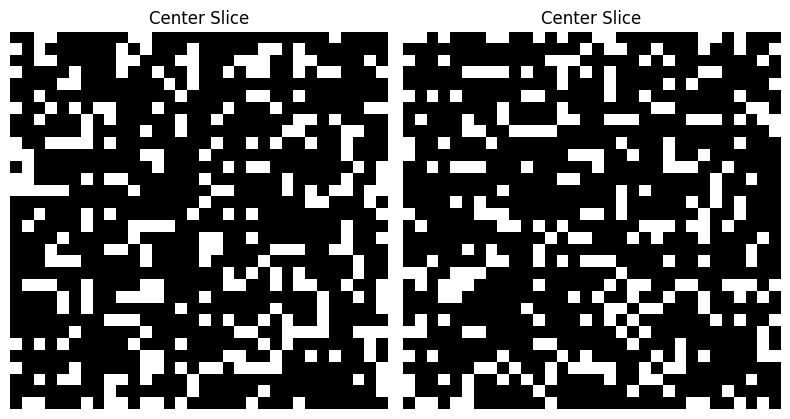

(2, 1, 32, 32, 32)


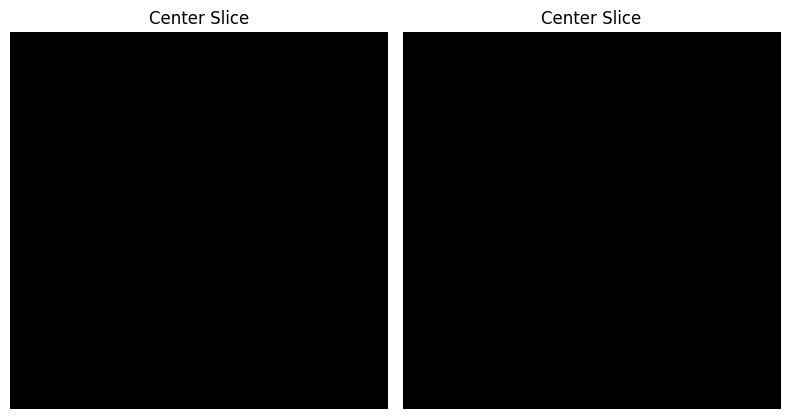

Sampling Steps:  70%|██████████████████████████████████████████████████████████████████████████████▎                                | 141/200 [01:25<00:34,  1.69it/s]

timestep:294
(2, 1, 32, 32, 32)


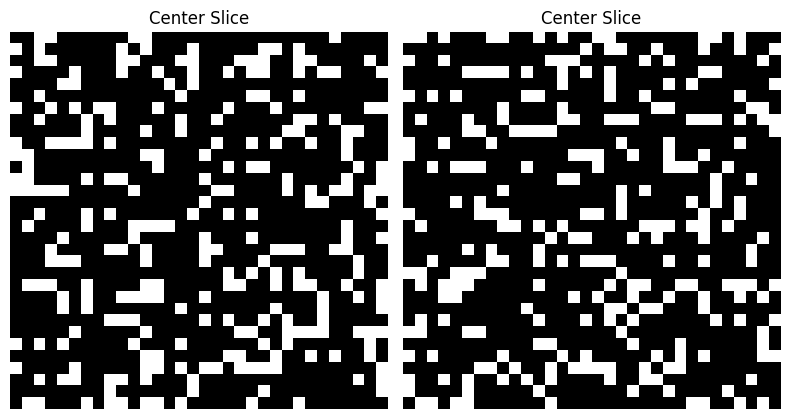

(2, 1, 32, 32, 32)


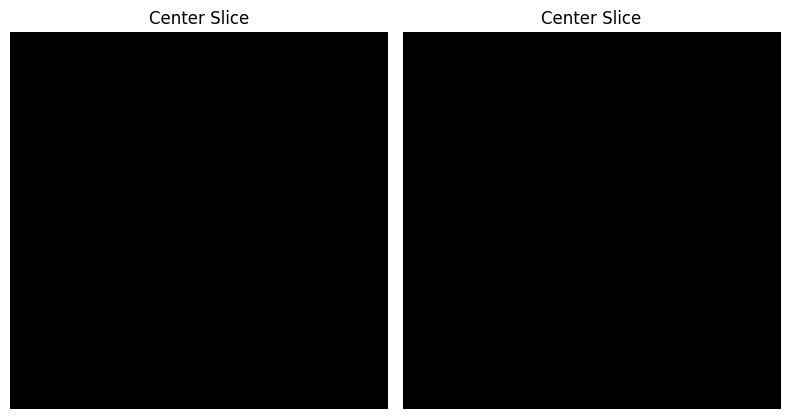

Sampling Steps:  71%|██████████████████████████████████████████████████████████████████████████████▊                                | 142/200 [01:26<00:34,  1.69it/s]

timestep:289
(2, 1, 32, 32, 32)


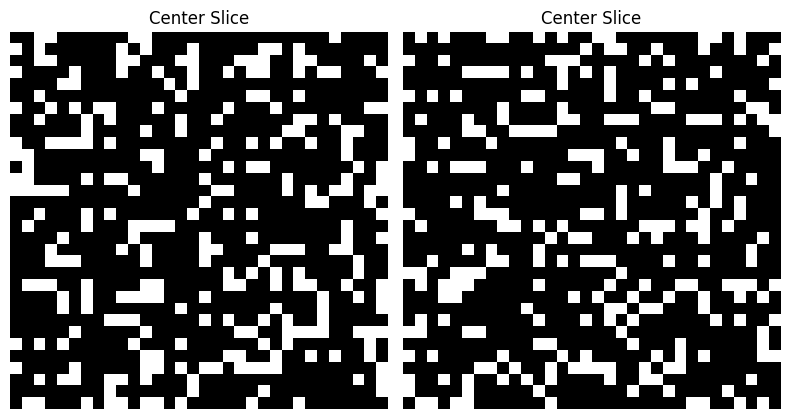

(2, 1, 32, 32, 32)


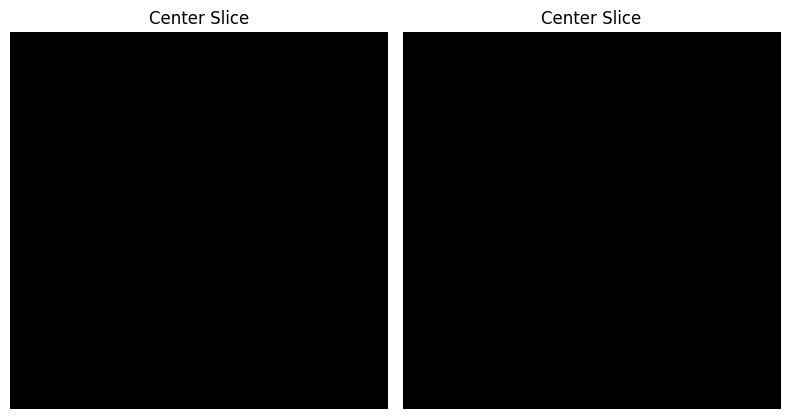

Sampling Steps:  72%|███████████████████████████████████████████████████████████████████████████████▎                               | 143/200 [01:26<00:33,  1.70it/s]

timestep:284
(2, 1, 32, 32, 32)


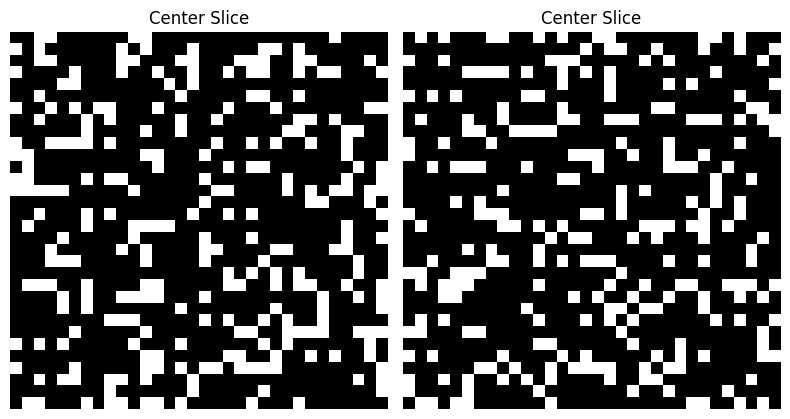

(2, 1, 32, 32, 32)


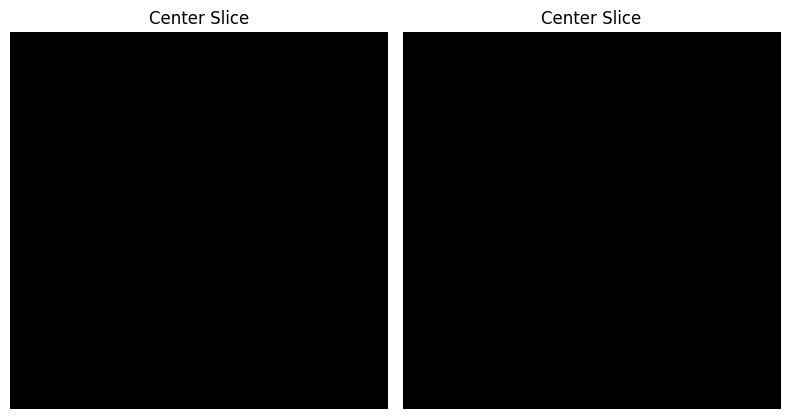

Sampling Steps:  72%|███████████████████████████████████████████████████████████████████████████████▉                               | 144/200 [01:27<00:32,  1.71it/s]

timestep:279
(2, 1, 32, 32, 32)


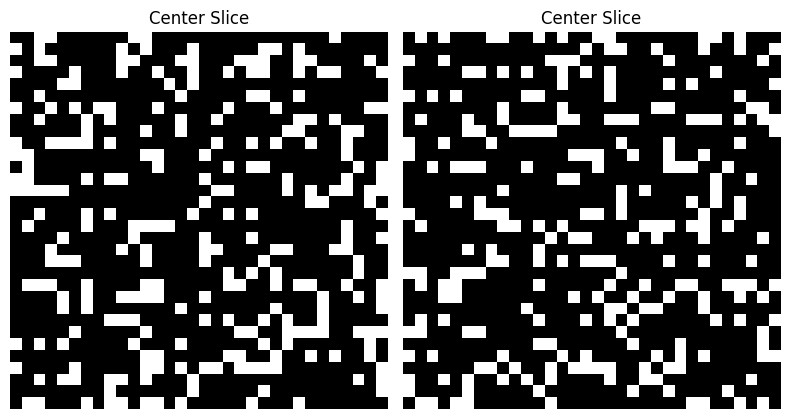

(2, 1, 32, 32, 32)


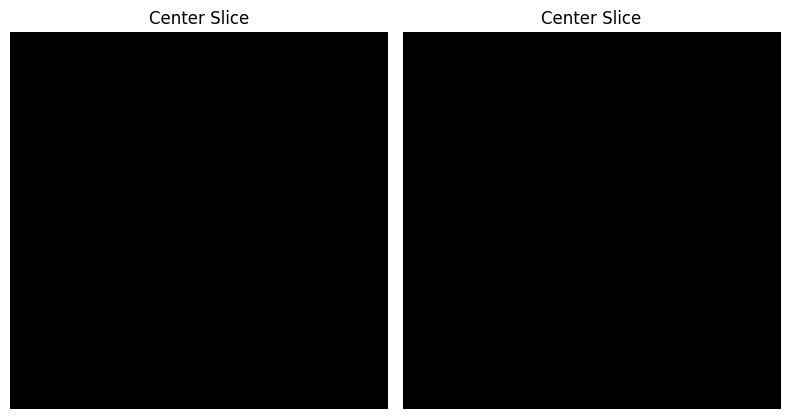

Sampling Steps:  72%|████████████████████████████████████████████████████████████████████████████████▍                              | 145/200 [01:27<00:32,  1.70it/s]

timestep:274
(2, 1, 32, 32, 32)


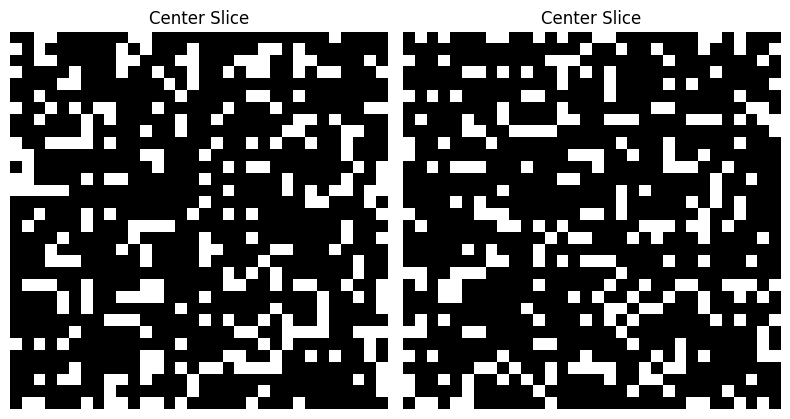

(2, 1, 32, 32, 32)


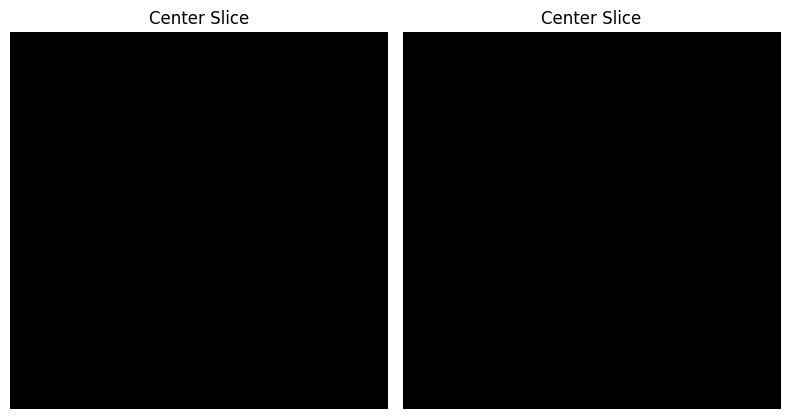

Sampling Steps:  73%|█████████████████████████████████████████████████████████████████████████████████                              | 146/200 [01:28<00:31,  1.71it/s]

timestep:269
(2, 1, 32, 32, 32)


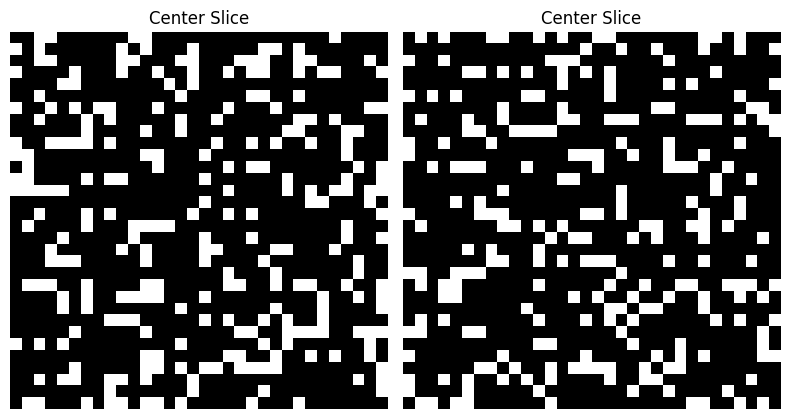

(2, 1, 32, 32, 32)


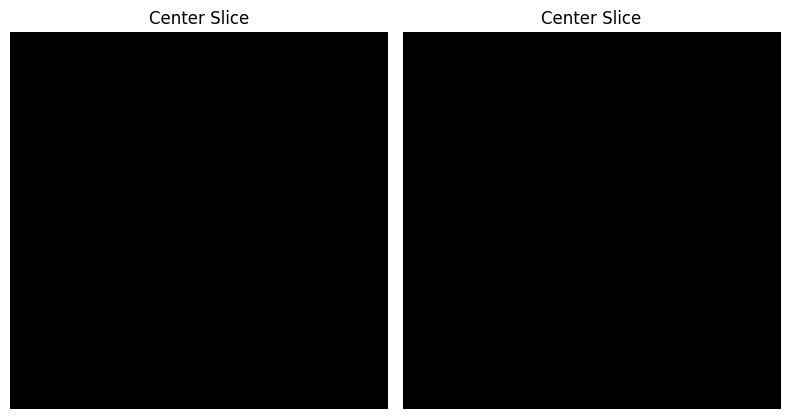

Sampling Steps:  74%|█████████████████████████████████████████████████████████████████████████████████▌                             | 147/200 [01:29<00:30,  1.71it/s]

timestep:264
(2, 1, 32, 32, 32)


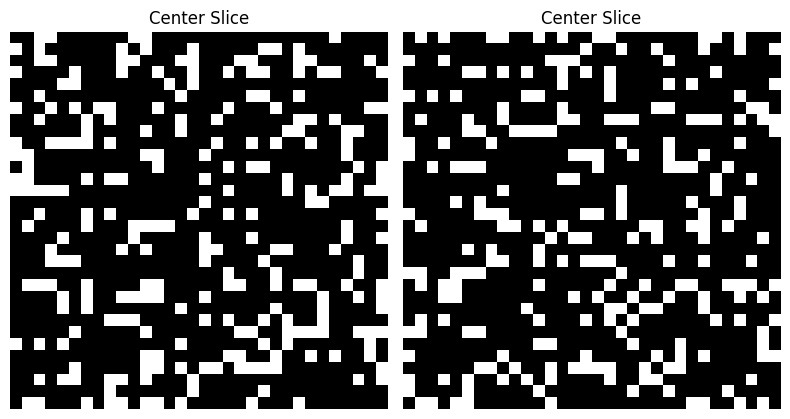

(2, 1, 32, 32, 32)


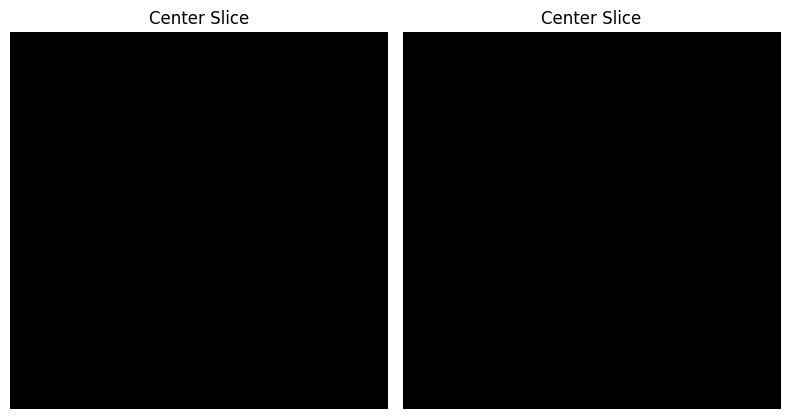

Sampling Steps:  74%|██████████████████████████████████████████████████████████████████████████████████▏                            | 148/200 [01:29<00:30,  1.71it/s]

timestep:259
(2, 1, 32, 32, 32)


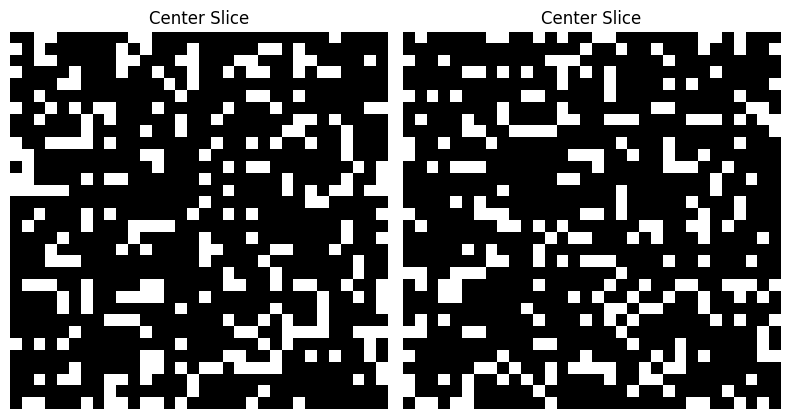

(2, 1, 32, 32, 32)


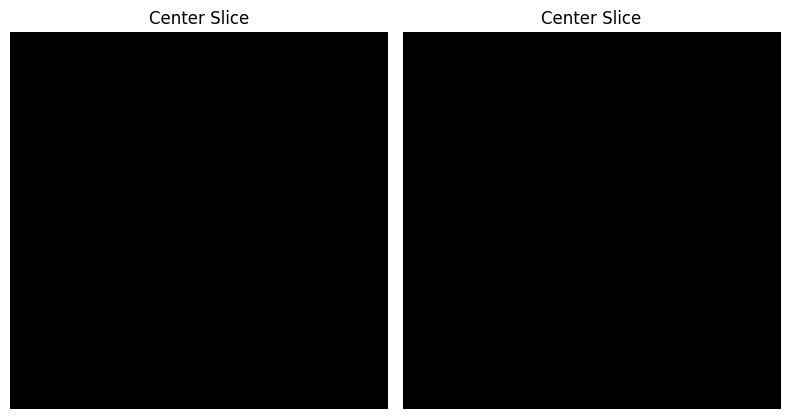

Sampling Steps:  74%|██████████████████████████████████████████████████████████████████████████████████▋                            | 149/200 [01:30<00:29,  1.71it/s]

timestep:254
(2, 1, 32, 32, 32)


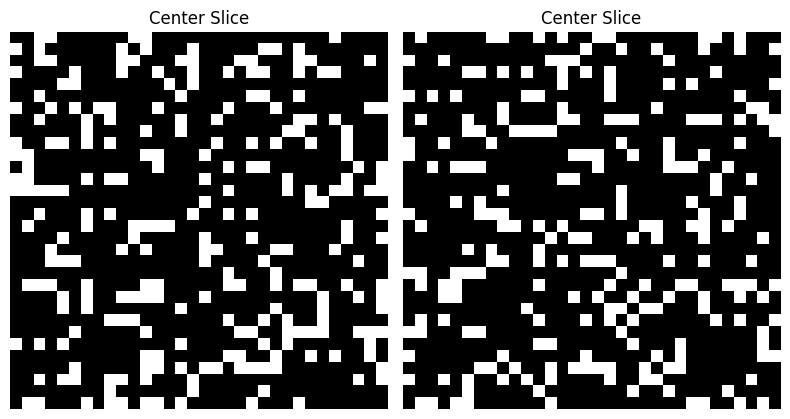

(2, 1, 32, 32, 32)


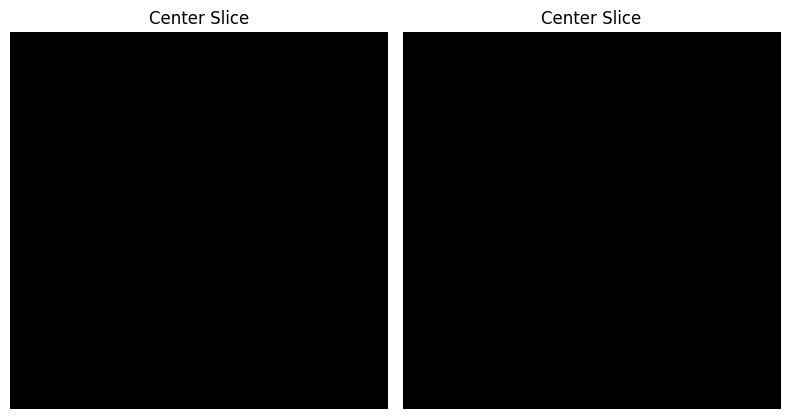

Sampling Steps:  75%|███████████████████████████████████████████████████████████████████████████████████▎                           | 150/200 [01:30<00:29,  1.70it/s]

timestep:249
(2, 1, 32, 32, 32)


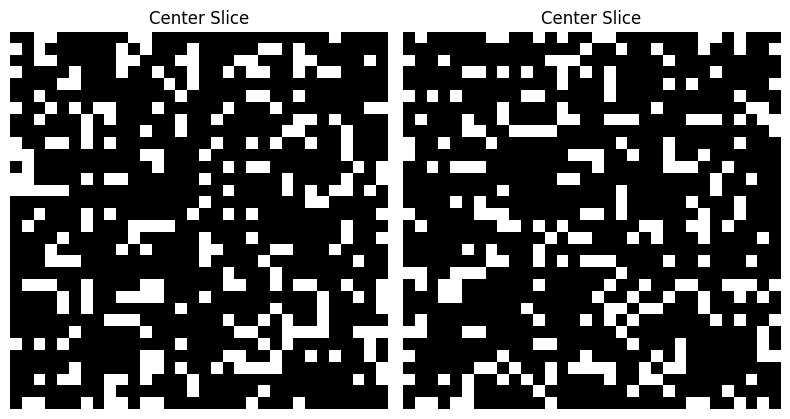

(2, 1, 32, 32, 32)


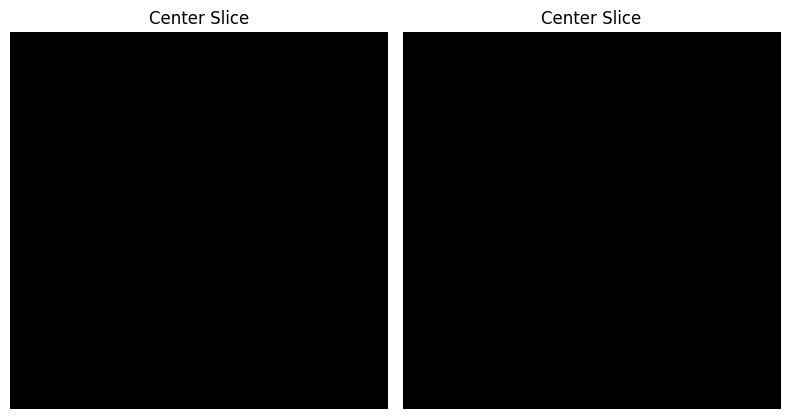

Sampling Steps:  76%|███████████████████████████████████████████████████████████████████████████████████▊                           | 151/200 [01:31<00:28,  1.71it/s]

timestep:244
(2, 1, 32, 32, 32)


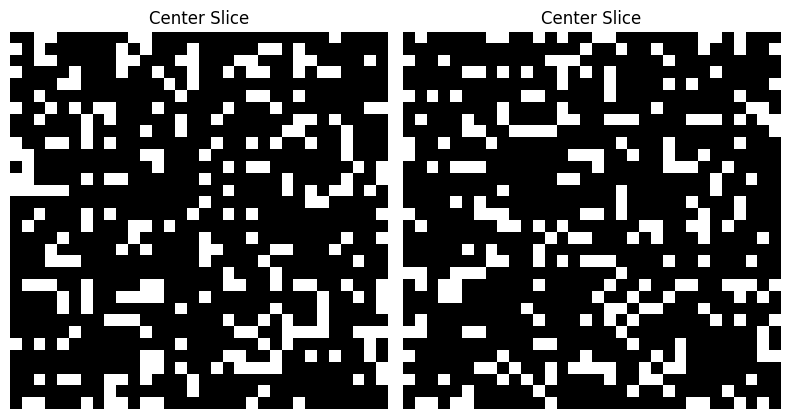

(2, 1, 32, 32, 32)


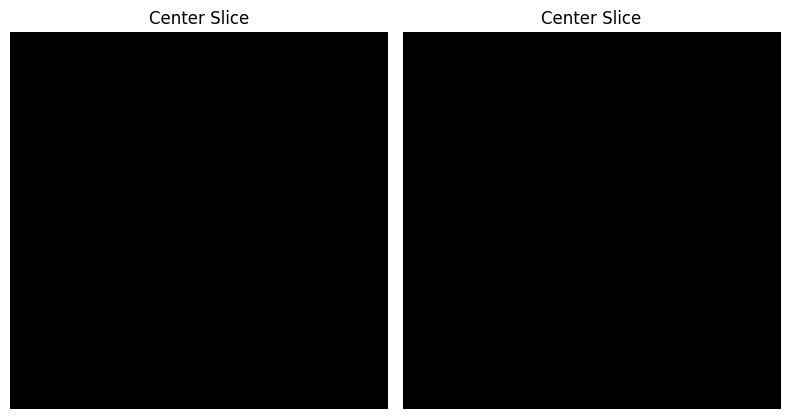

Sampling Steps:  76%|████████████████████████████████████████████████████████████████████████████████████▎                          | 152/200 [01:32<00:28,  1.71it/s]

timestep:239
(2, 1, 32, 32, 32)


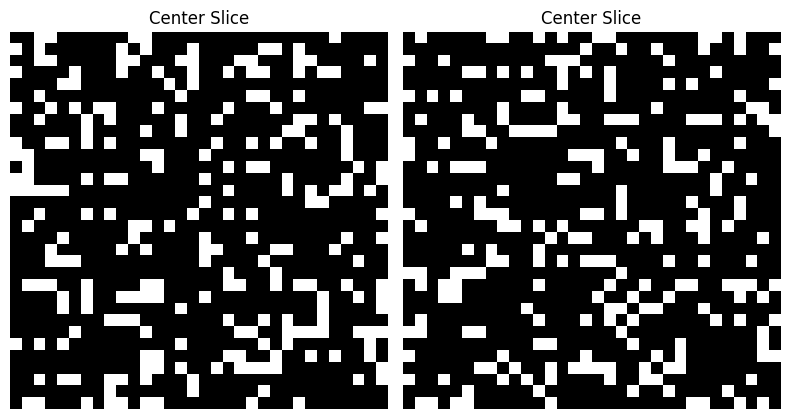

(2, 1, 32, 32, 32)


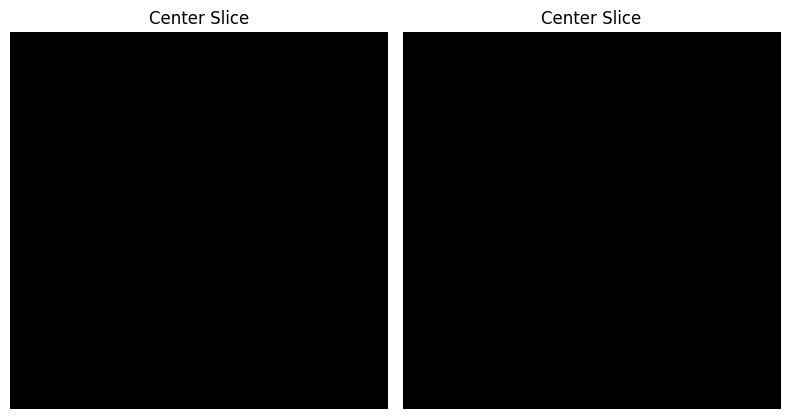

Sampling Steps:  76%|████████████████████████████████████████████████████████████████████████████████████▉                          | 153/200 [01:32<00:27,  1.71it/s]

timestep:234
(2, 1, 32, 32, 32)


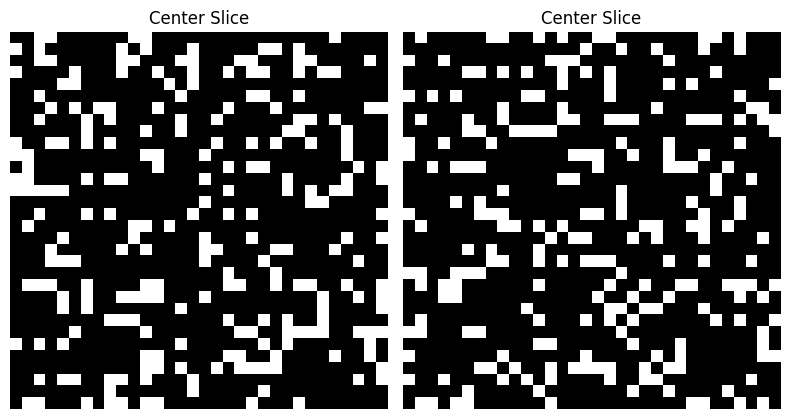

(2, 1, 32, 32, 32)


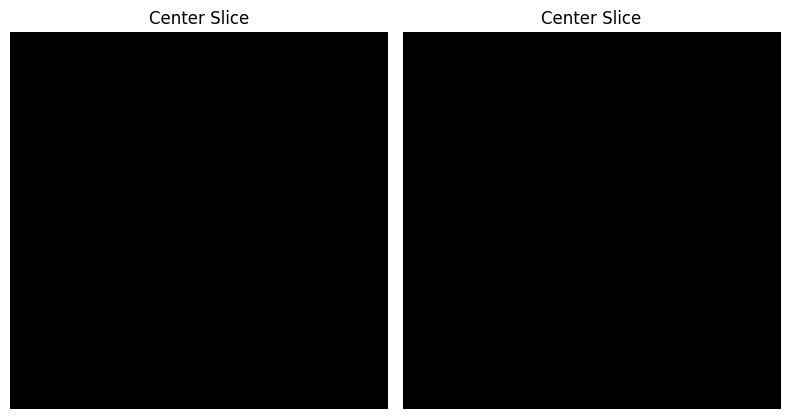

Sampling Steps:  77%|█████████████████████████████████████████████████████████████████████████████████████▍                         | 154/200 [01:33<00:26,  1.71it/s]

timestep:229
(2, 1, 32, 32, 32)


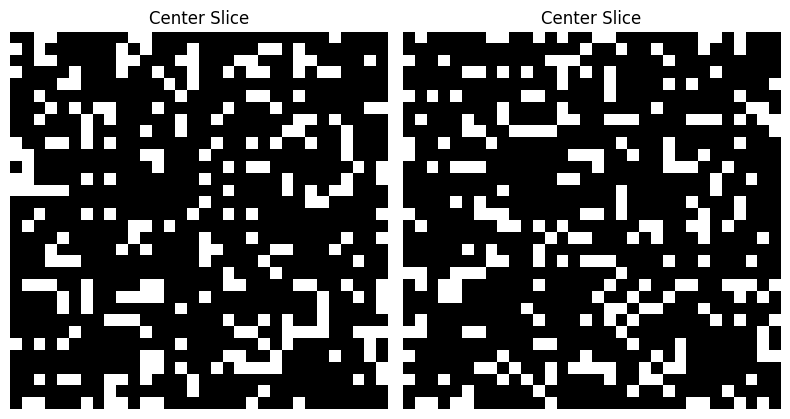

(2, 1, 32, 32, 32)


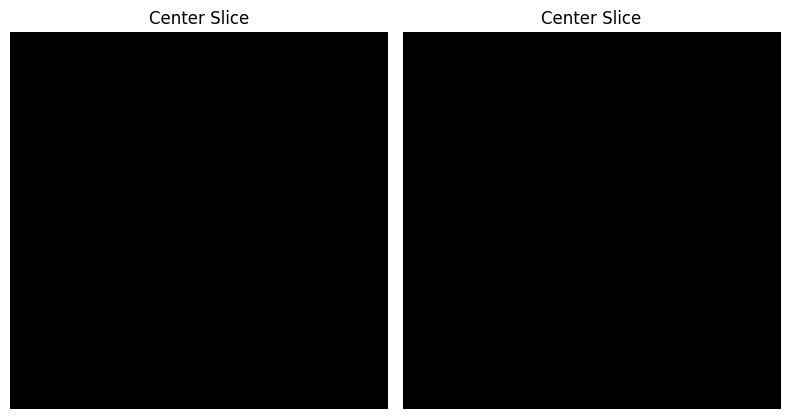

Sampling Steps:  78%|██████████████████████████████████████████████████████████████████████████████████████                         | 155/200 [01:33<00:26,  1.71it/s]

timestep:224
(2, 1, 32, 32, 32)


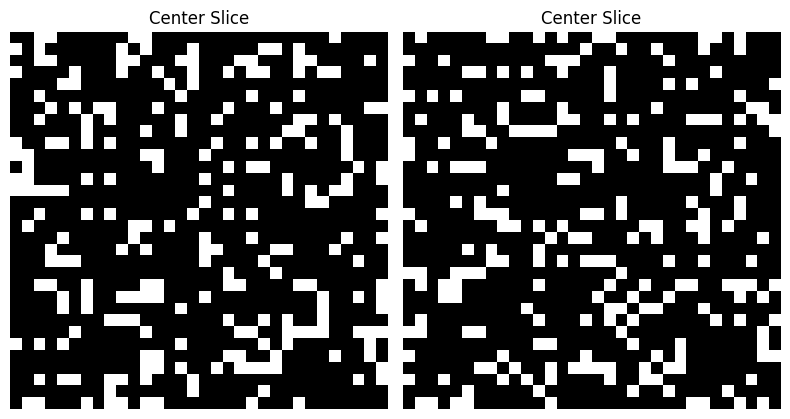

(2, 1, 32, 32, 32)


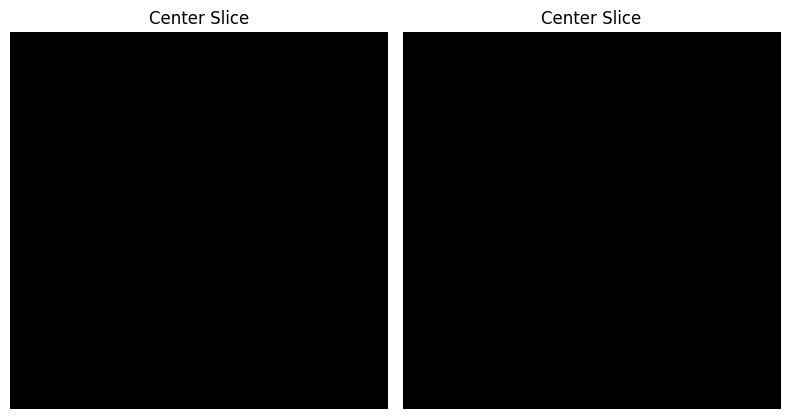

Sampling Steps:  78%|██████████████████████████████████████████████████████████████████████████████████████▌                        | 156/200 [01:34<00:25,  1.71it/s]

timestep:219
(2, 1, 32, 32, 32)


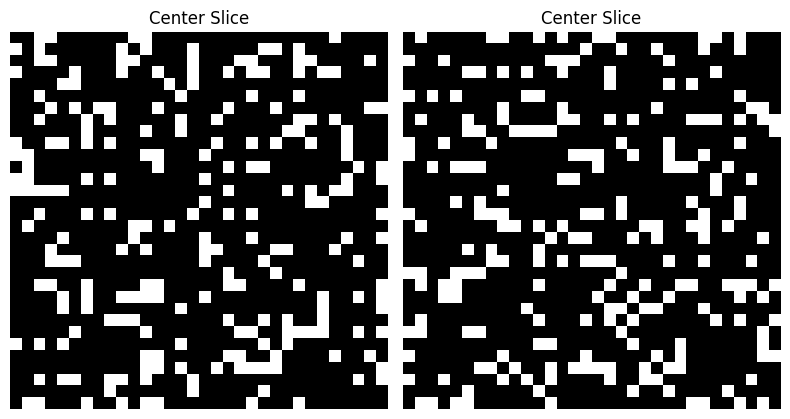

(2, 1, 32, 32, 32)


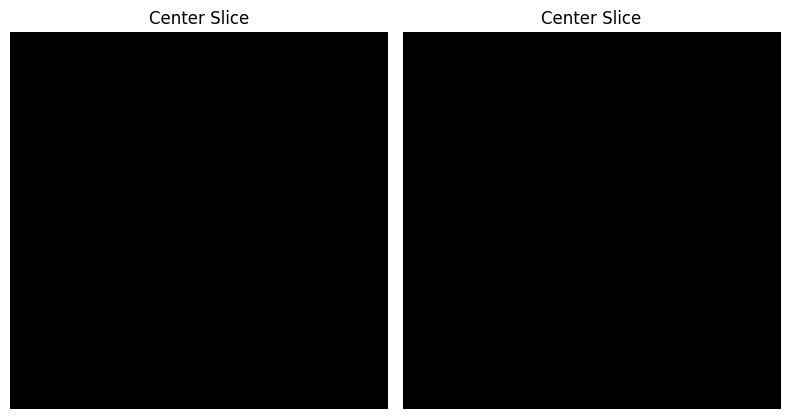

Sampling Steps:  78%|███████████████████████████████████████████████████████████████████████████████████████▏                       | 157/200 [01:34<00:25,  1.71it/s]

timestep:214
(2, 1, 32, 32, 32)


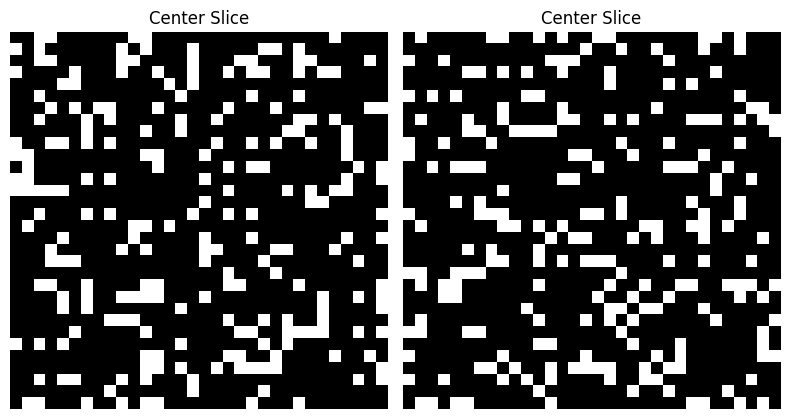

(2, 1, 32, 32, 32)


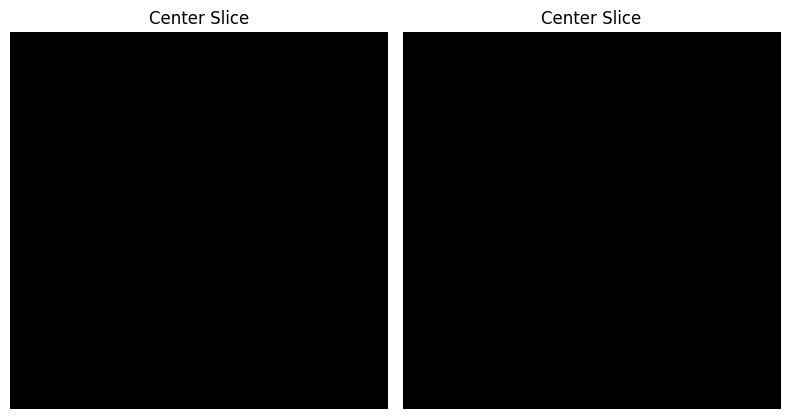

Sampling Steps:  79%|███████████████████████████████████████████████████████████████████████████████████████▋                       | 158/200 [01:36<00:30,  1.37it/s]

timestep:209
(2, 1, 32, 32, 32)


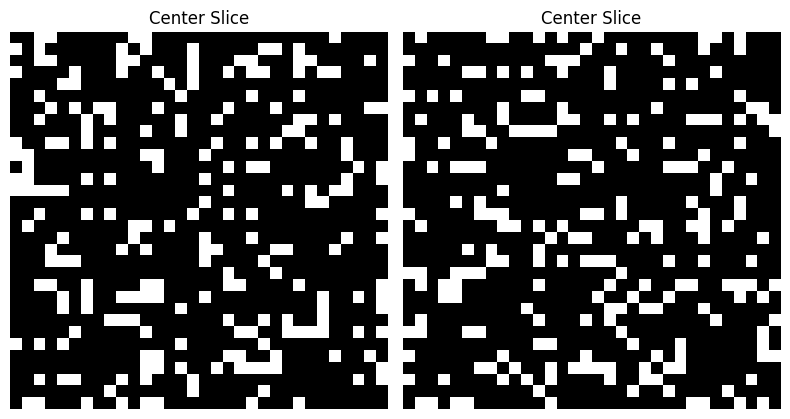

(2, 1, 32, 32, 32)


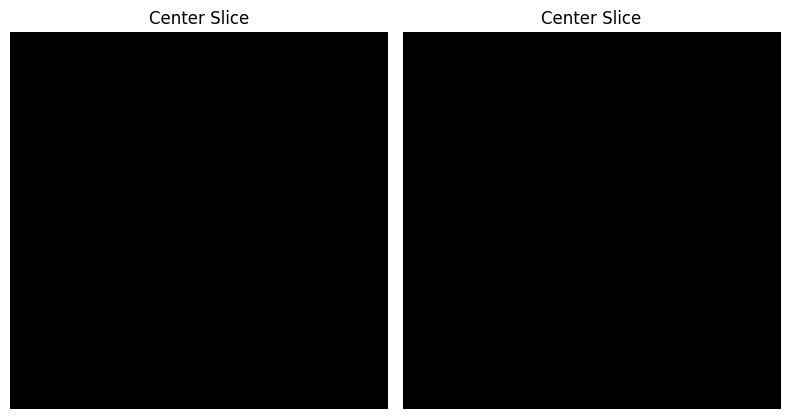

Sampling Steps:  80%|████████████████████████████████████████████████████████████████████████████████████████▏                      | 159/200 [01:36<00:28,  1.46it/s]

timestep:204
(2, 1, 32, 32, 32)


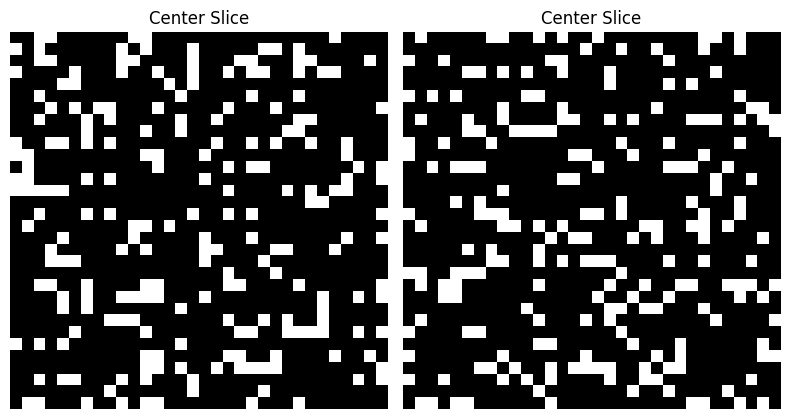

(2, 1, 32, 32, 32)


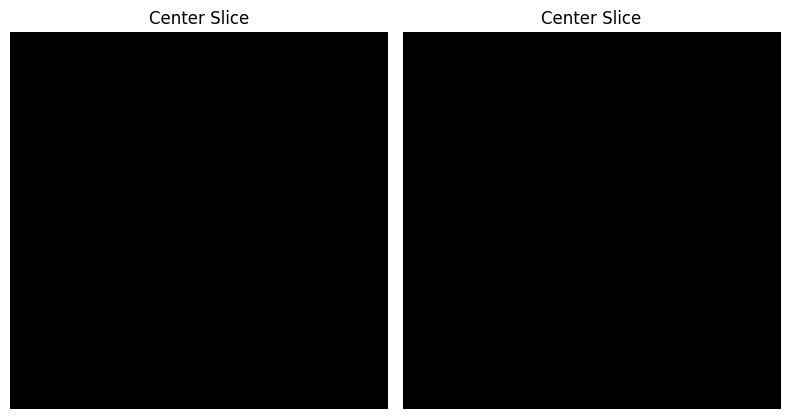

Sampling Steps:  80%|████████████████████████████████████████████████████████████████████████████████████████▊                      | 160/200 [01:37<00:26,  1.52it/s]

timestep:199
(2, 1, 32, 32, 32)


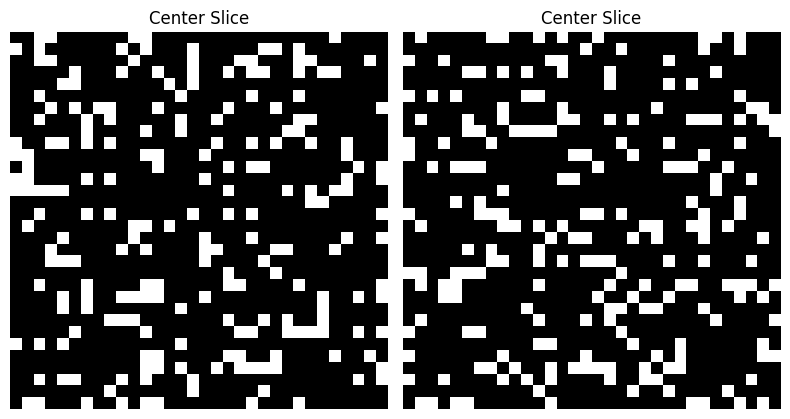

(2, 1, 32, 32, 32)


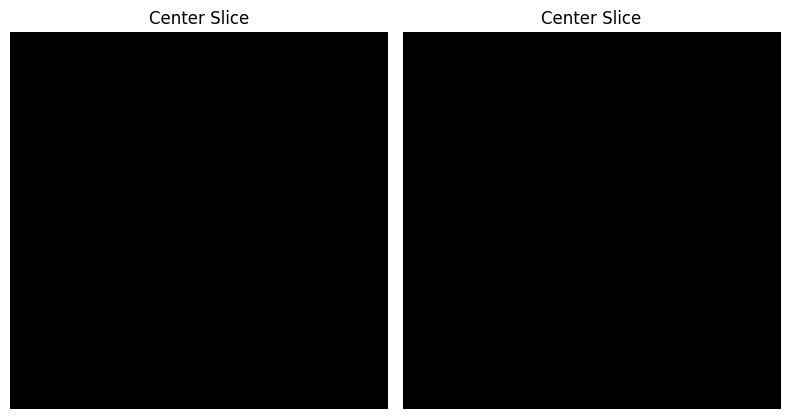

Sampling Steps:  80%|█████████████████████████████████████████████████████████████████████████████████████████▎                     | 161/200 [01:37<00:24,  1.57it/s]

timestep:194
(2, 1, 32, 32, 32)


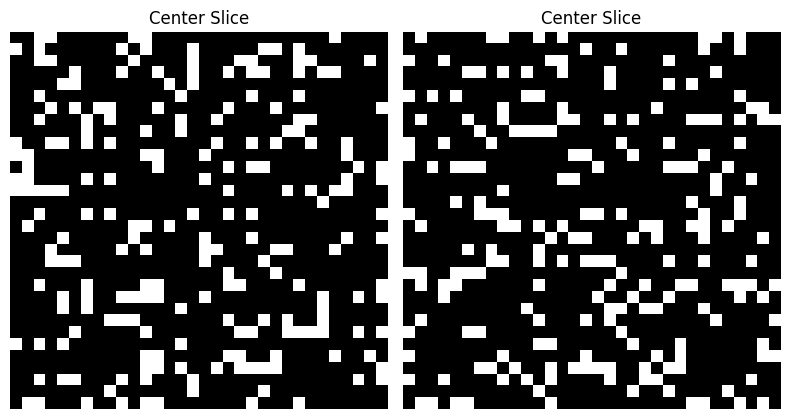

(2, 1, 32, 32, 32)


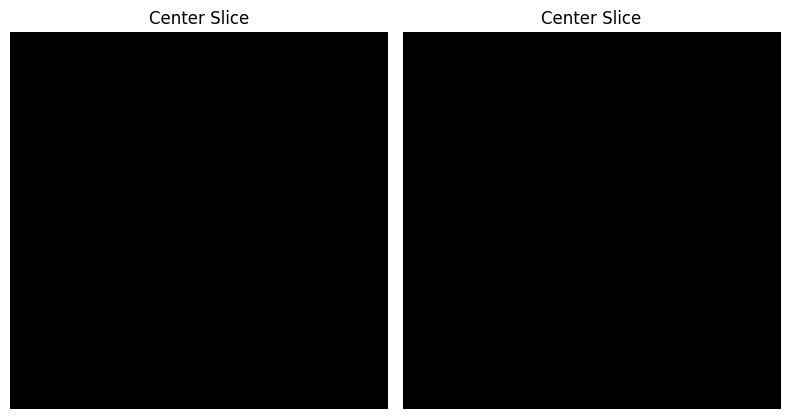

Sampling Steps:  81%|█████████████████████████████████████████████████████████████████████████████████████████▉                     | 162/200 [01:38<00:23,  1.61it/s]

timestep:189
(2, 1, 32, 32, 32)


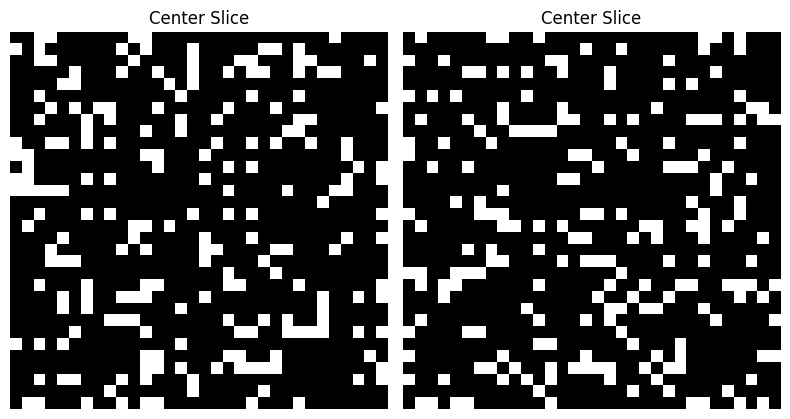

(2, 1, 32, 32, 32)


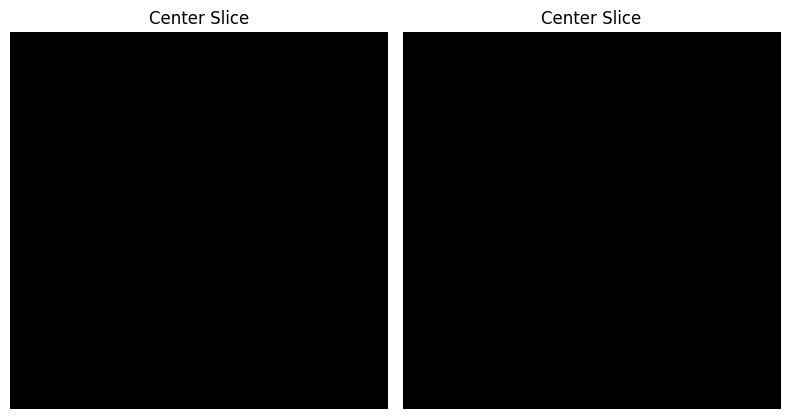

Sampling Steps:  82%|██████████████████████████████████████████████████████████████████████████████████████████▍                    | 163/200 [01:38<00:22,  1.63it/s]

timestep:184
(2, 1, 32, 32, 32)


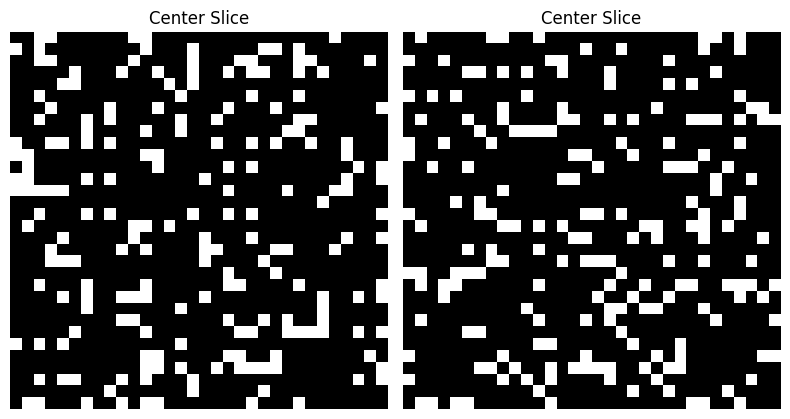

(2, 1, 32, 32, 32)


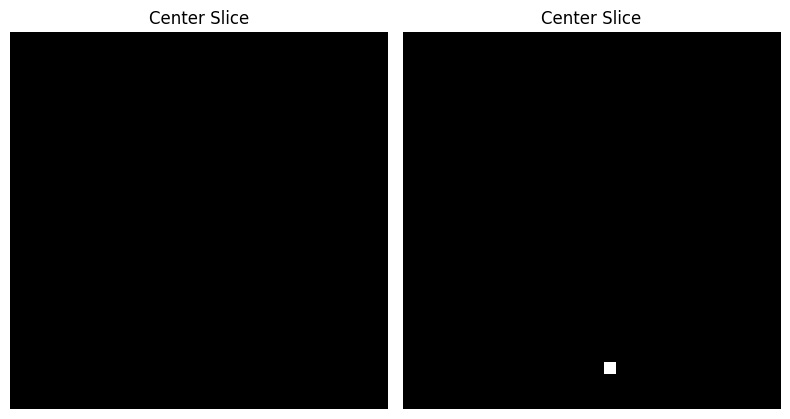

Sampling Steps:  82%|███████████████████████████████████████████████████████████████████████████████████████████                    | 164/200 [01:39<00:21,  1.65it/s]

timestep:179
(2, 1, 32, 32, 32)


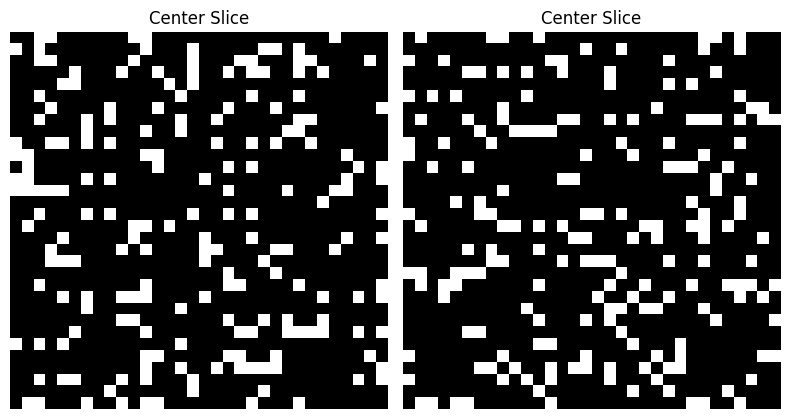

(2, 1, 32, 32, 32)


Sampling Steps:  82%|███████████████████████████████████████████████████████████████████████████████████████████                    | 164/200 [01:40<00:21,  1.64it/s]

KeyboardInterrupt



In [27]:
from inference import DiffusionInference3D
from diffusers import DDIMScheduler


diffusion_model = DiffusionModel3D(model, num_timesteps=1000)

diffusion_model.load_state_dict(torch.load("./best_model.pth"))

diffusion_model.to(device)

noise_scheduler = DDIMScheduler.from_config(diffusion_model.noise_scheduler.config, timestep_spacing="trailing")

inference = DiffusionInference3D(diffusion_model, noise_scheduler, device=device)
samples = inference.sample_ddim(num_samples=2, image_size=(32, 32, 32), num_inference_steps = 200, intermediate_visualisation=True)


#inference = DiffusionInference3D(diffusion_model, diffusion_model.noise_scheduler, device=device)
#samples = inference.sample(num_samples=2, image_size=(32, 32, 32), intermediate_visualisation=True)

inference.visualize_samples(samples, threshold=0.5)
